<a href="https://colab.research.google.com/github/ad597/BreastCancerDiagnostic/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 0.05
[1] 0.95
[1] 0.95
[1] 0.1
[1] 0.95
[1] 0.95
[1] 0.15
[1] 0.95
[1] 0.95
[1] 0.2
[1] 0.95
[1] 0.95
[1] 0.25
[1] 0.95
[1] 0.95
[1] 0.3
[1] 0.95
[1] 0.95
[1] 0.35
[1] 0.95
[1] 0.95
[1] 0.4
[1] 0.95
[1] 0.95
[1] 0.45
[1] 0.95
[1] 0.95
[1] 0.5
[1] 0.95
[1] 0.95
[1] 0.55
[1] 0.95
[1] 0.95
[1] 0.6
[1] 0.95
[1] 0.95
[1] 0.65
[1] 0.95
[1] 0.95
[1] 0.7
[1] 0.95
[1] 0.95
[1] 0.75
[1] 0.95
[1] 0.95
[1] 0.8
[1] 0.95
[1] 0.95
[1] 0.85
[1] 0.95
[1] 0.95
[1] 0.9
[1] 0.95
[1] 0.95
[1] 0.95
[1] 0.95
[1] 0.95


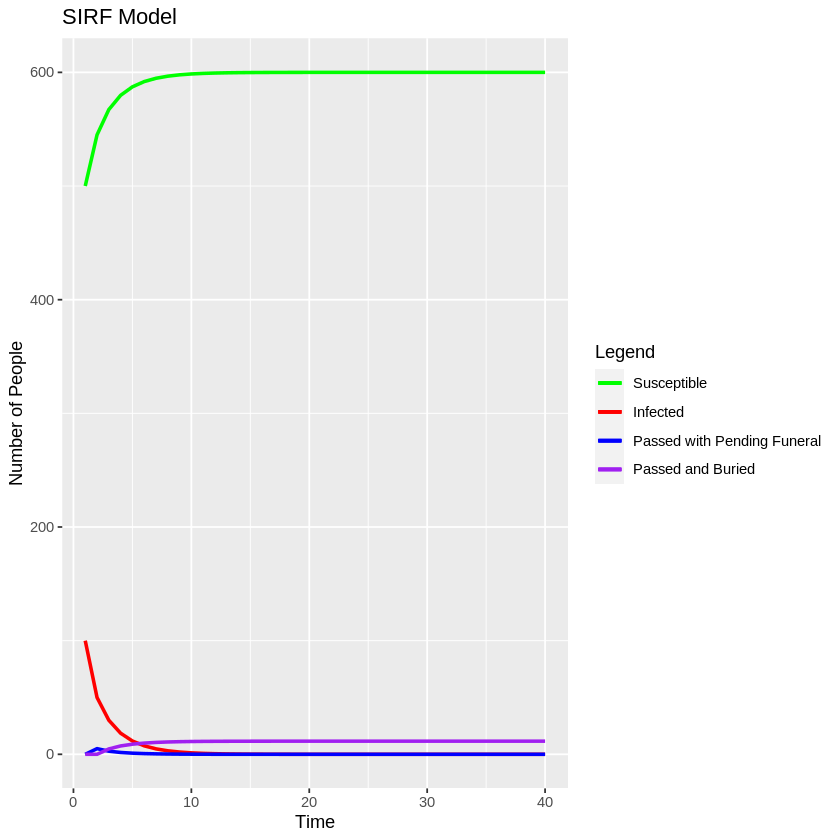

Warning message:
“Removed 38 row(s) containing missing values (geom_path).”
Warning message:
“Removed 37 row(s) containing missing values (geom_path).”
Warning message:
“Removed 36 row(s) containing missing values (geom_path).”
Warning message:
“Removed 35 row(s) containing missing values (geom_path).”


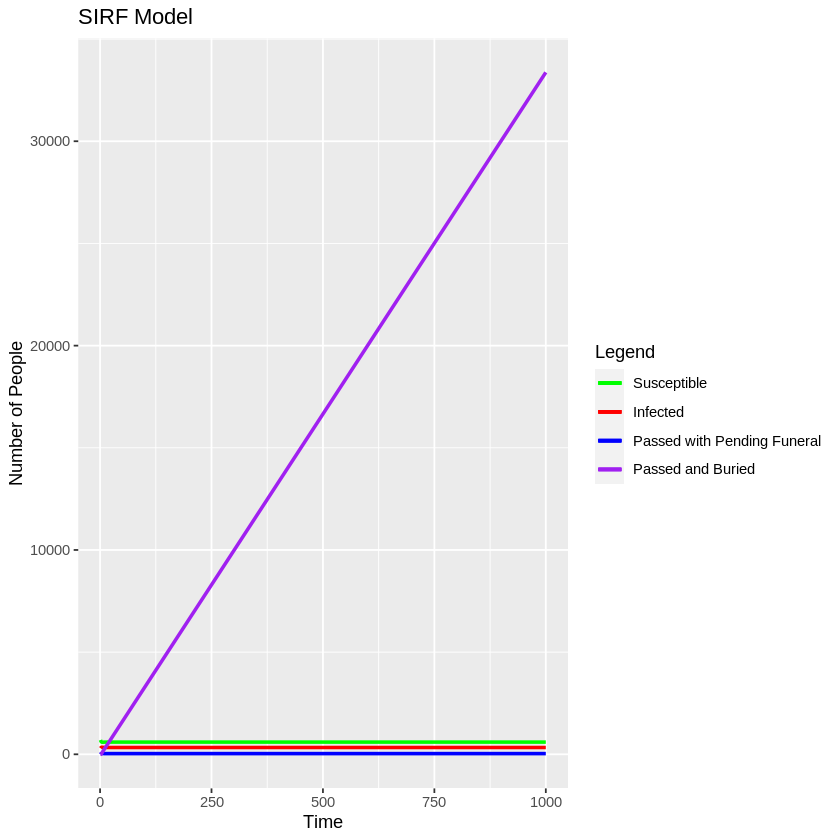

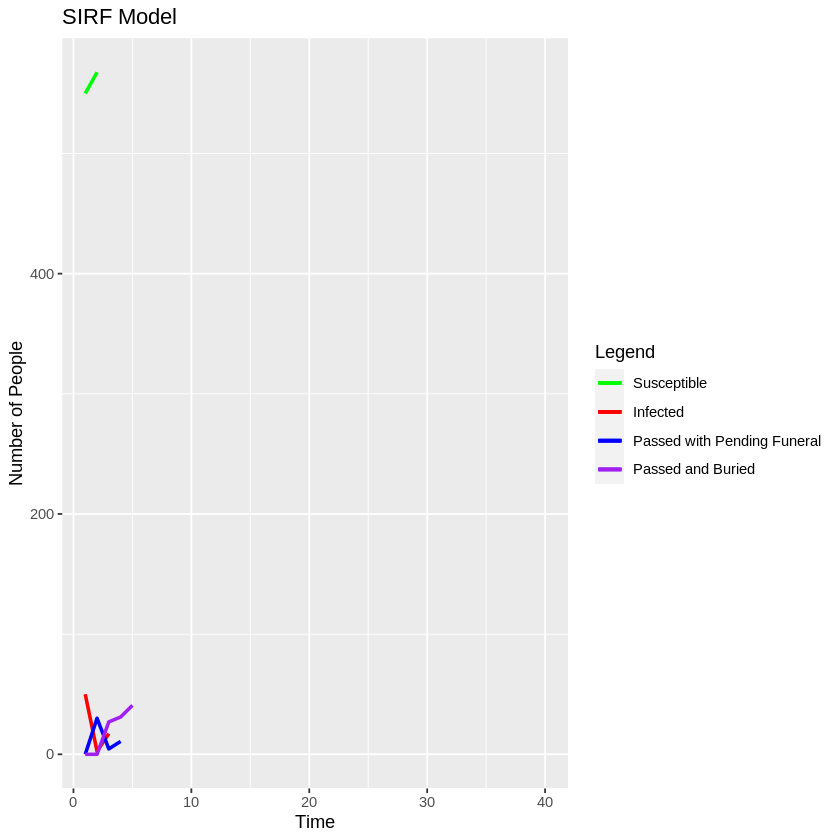

In [ ]:
t_vals <- seq(0, 40)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 800 # inital susceptible
I[1] <- 200 # initial infected
F1[1] <- 0
R[1] <- 0
N <- 1000 # population size
b = 0.001
bf = 0.001
for (m in seq(0.05, 0.95, by = 0.05)) {
    for (g in seq(0.05, 0.95, by = 0.05)){
        for (s in seq(0.05, 0.95, by = 0.05)){
          S <- rep(NA, length(t_vals))
          I <- rep(NA, length(t_vals))
          F1 <- rep(NA, length(t_vals))
          R <- rep(NA, length(t_vals))
          S[1] <- 800 # initial susceptible
          I[1] <- 200 # initial infected
          F1[1] <- 0
          R[1] <- 0
          for (i in 1:(length(t_vals) - 1)) {
            S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N - m*S[i]
            I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
            F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
            R[i + 1] <- R[i] + s*F1[i]
          }
        }
      }
  if (is.nan(S[40]) == FALSE) { # if the 20th entry of S in not NaN, print sigma
    print(m)
    print(g)
    print(s)
  }
}

library(ggplot2)

t_vals <- seq(40)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 500 # initial susceptible
I[1] <- 100 # initial infected
F1[1] <- 0
R[1] <- 0
b <- 0.001 # beta
g <- 0.05 #gamma
bf <- 0.001 # beta_f
m <- 0.95 # mu
s <- 0.95 # sigma
N <- 600 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N - m*S[i]
  I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
  R[i + 1] <- R[i] + s*F1[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Passed and Buried" = "purple")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SIRF Model",
       colour = "Legend") +
  scale_colour_manual(values = colours)


t_vals <- seq(1000)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
b <- 0.001 # beta: increasing above 0.001 causes instability
g <- 0.1 #gamma
bf <- 0.00002 # beta_f: increasing above 0.001 causes instability
m <- 0.5 # mu
s <- 0.95 # sigma
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N - m*S[i]
  I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
  R[i + 1] <- R[i] + s*F1[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Passed and Buried" = "purple")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SIRF Model",
       colour = "Legend") +
  scale_colour_manual(values = colours)


## SHERIF Model


t_vals <- seq(40)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 550 # initial susceptible
I[1] <- 50 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.001 # beta
g <- 0.6 #gamma
bf <- 0.001 # beta_f
m <- 0.9 # mu
s <- 0.9 # sigma
bh <- 0.01 #beta_h
N <- 600 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + bh*S[i]*H[i] + m*N - m*S[i]
  E[i+1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i]
  I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
  R[i + 1] <- R[i] + s*F1[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Passed and Buried" = "purple")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SIRF Model",
       colour = "Legend") +
  scale_colour_manual(values = colours)






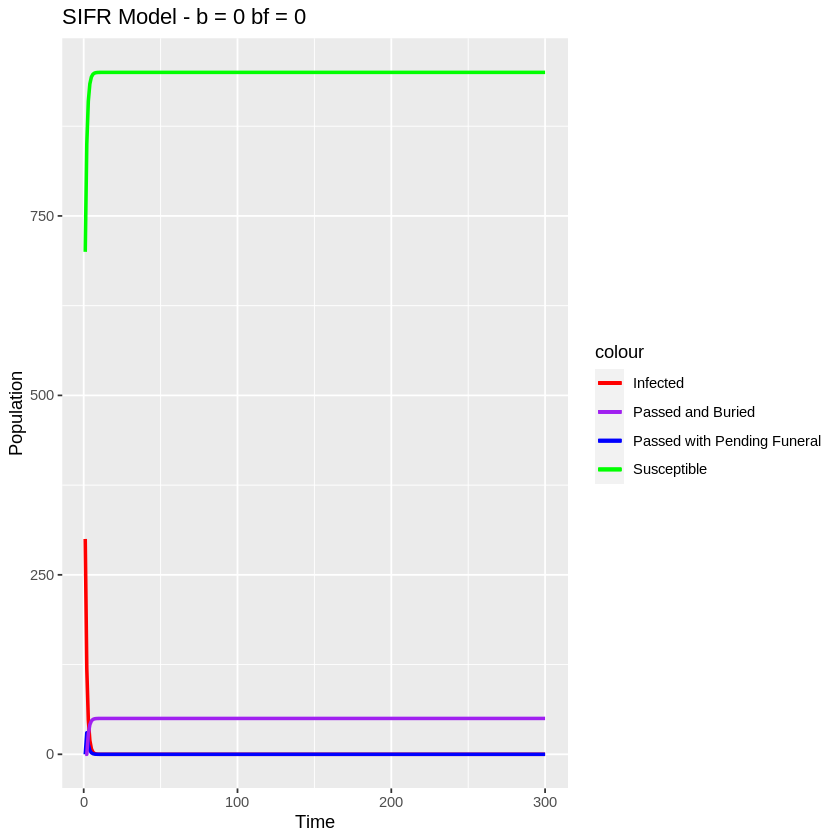

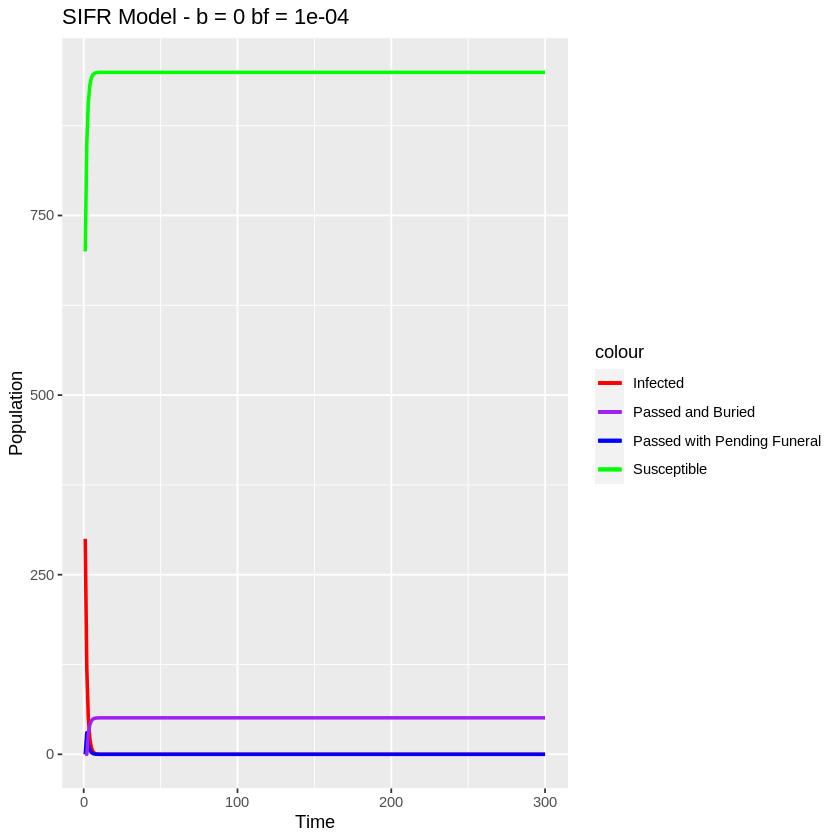

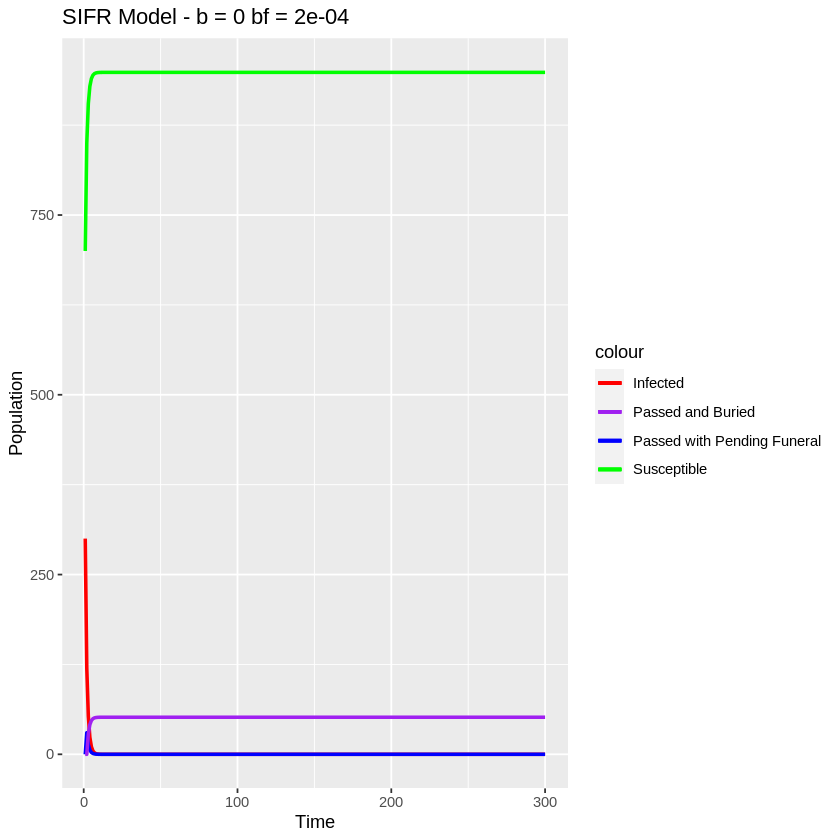

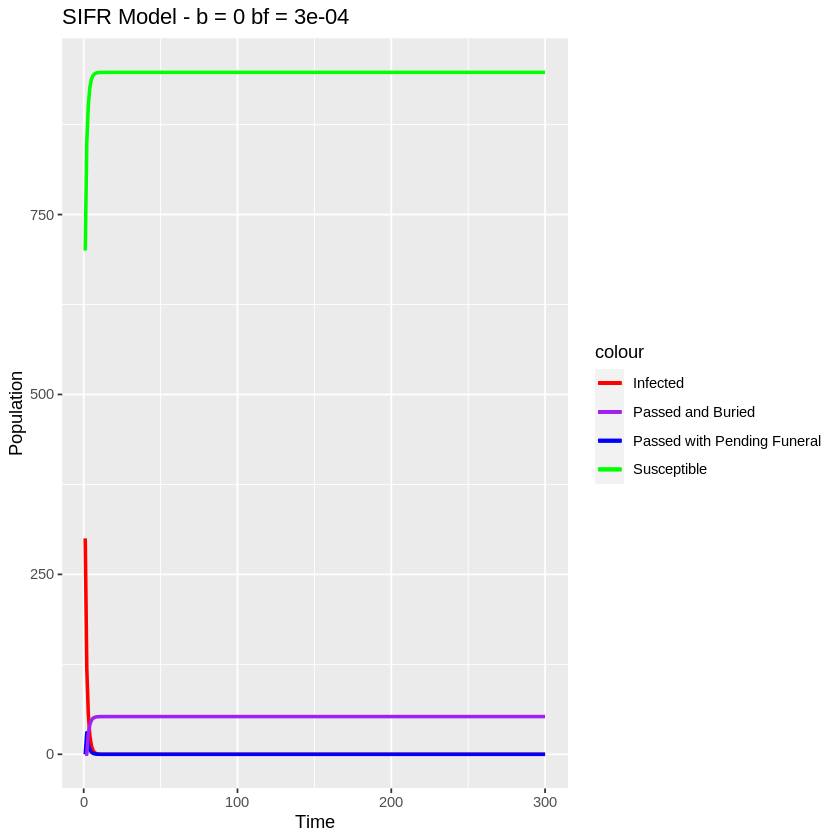

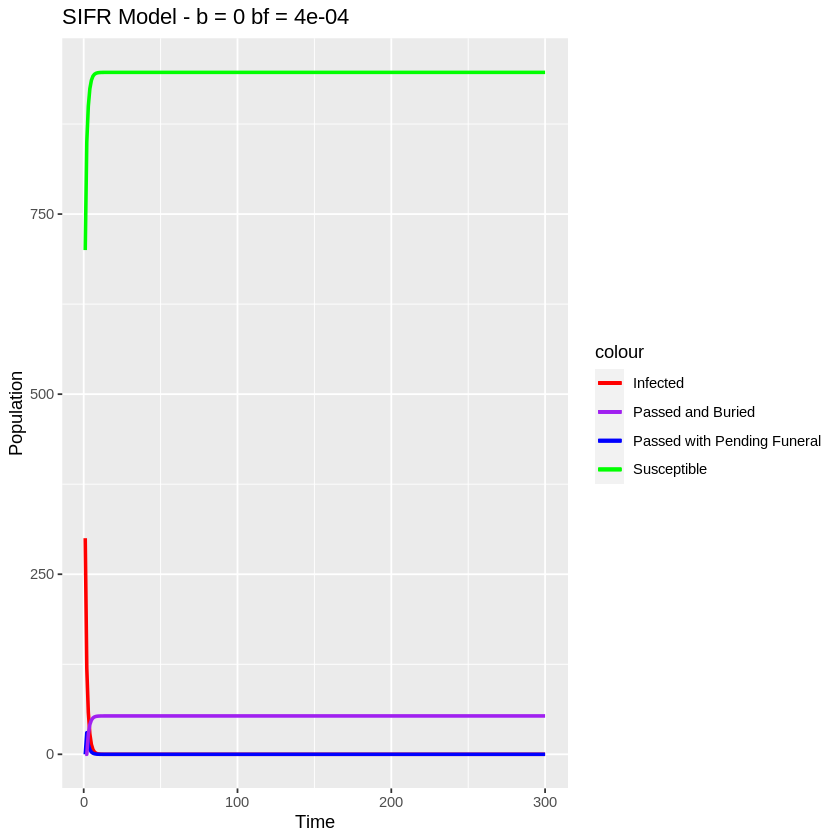

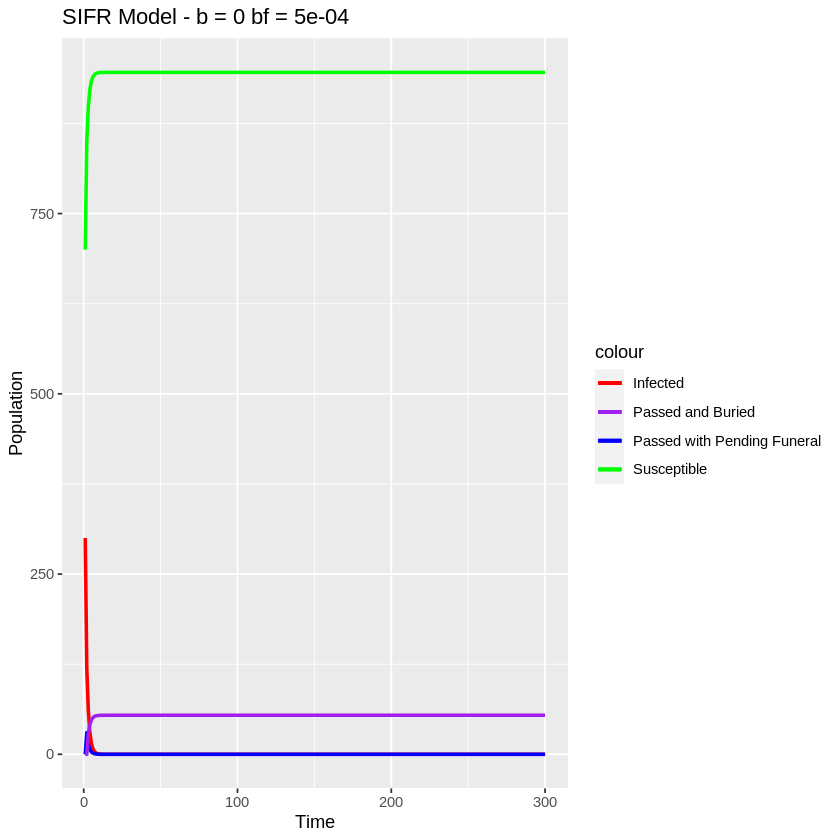

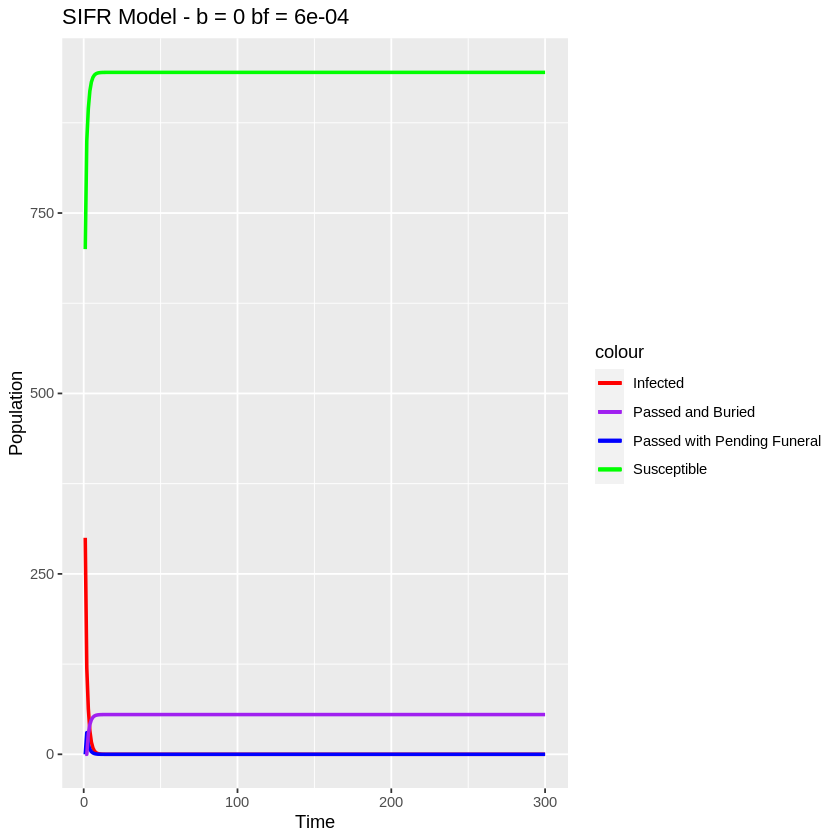

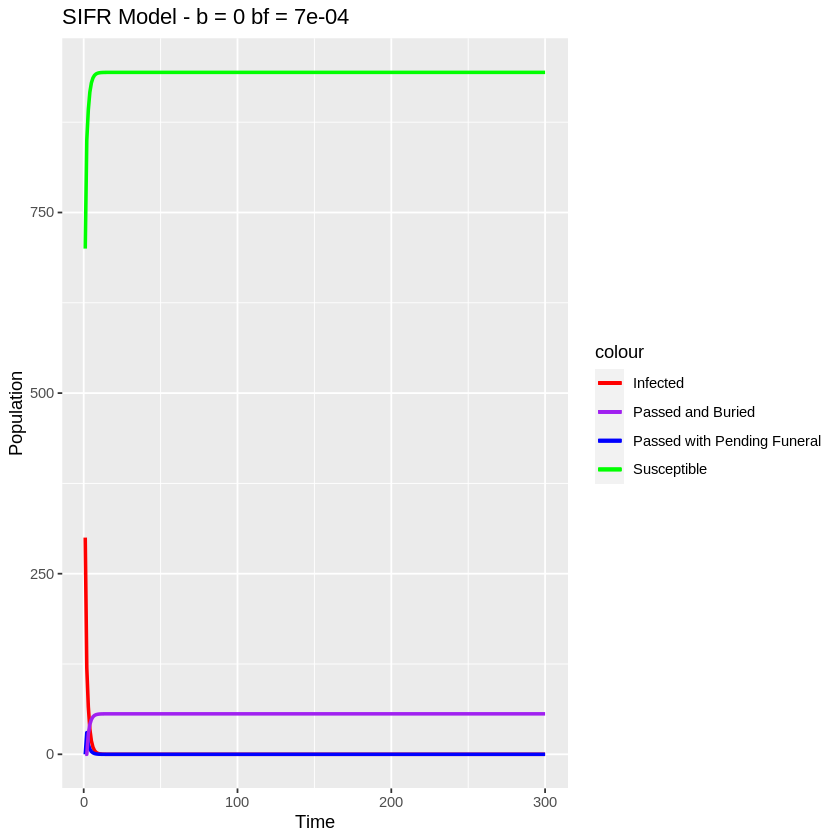

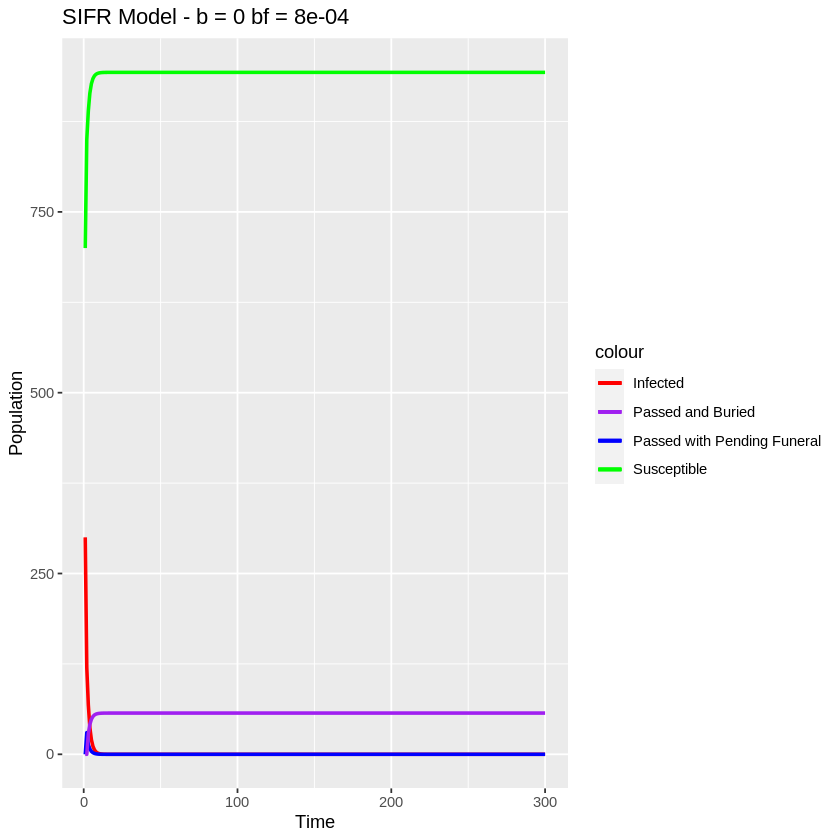

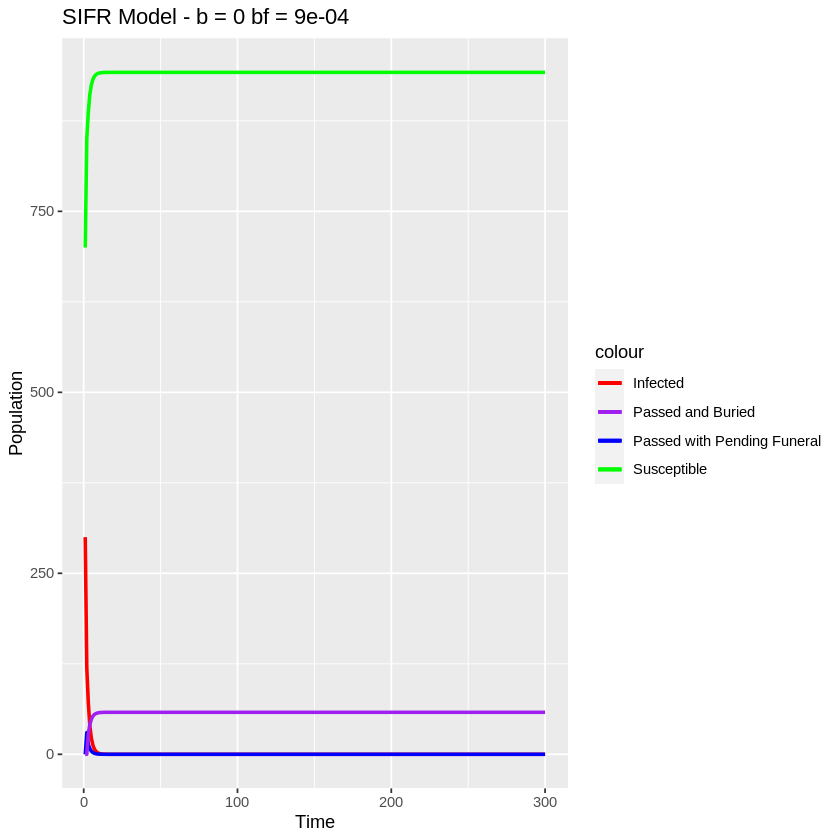

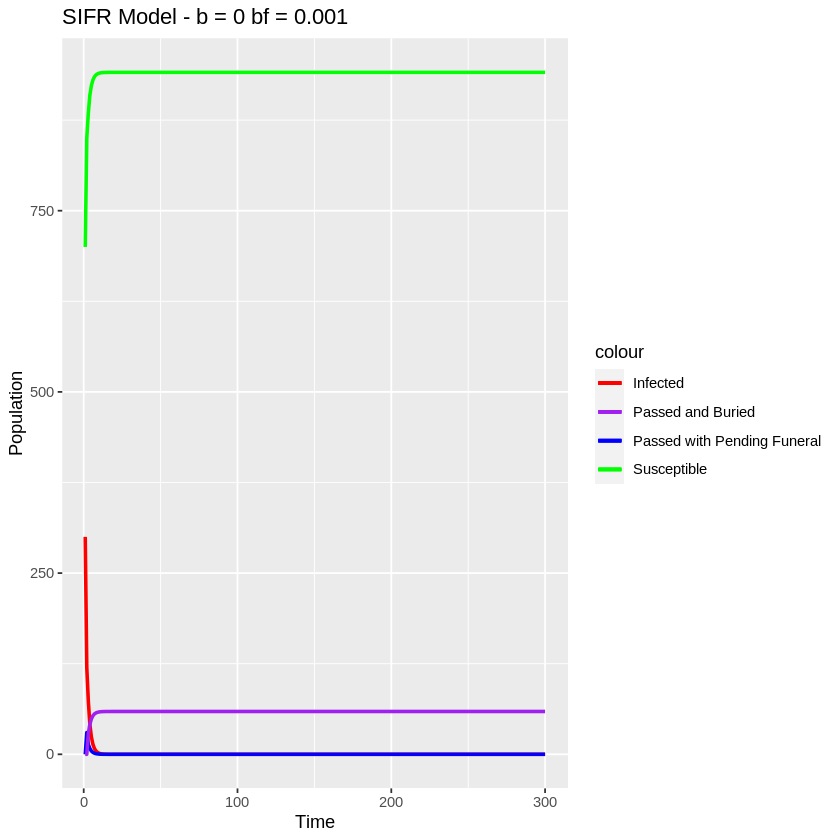

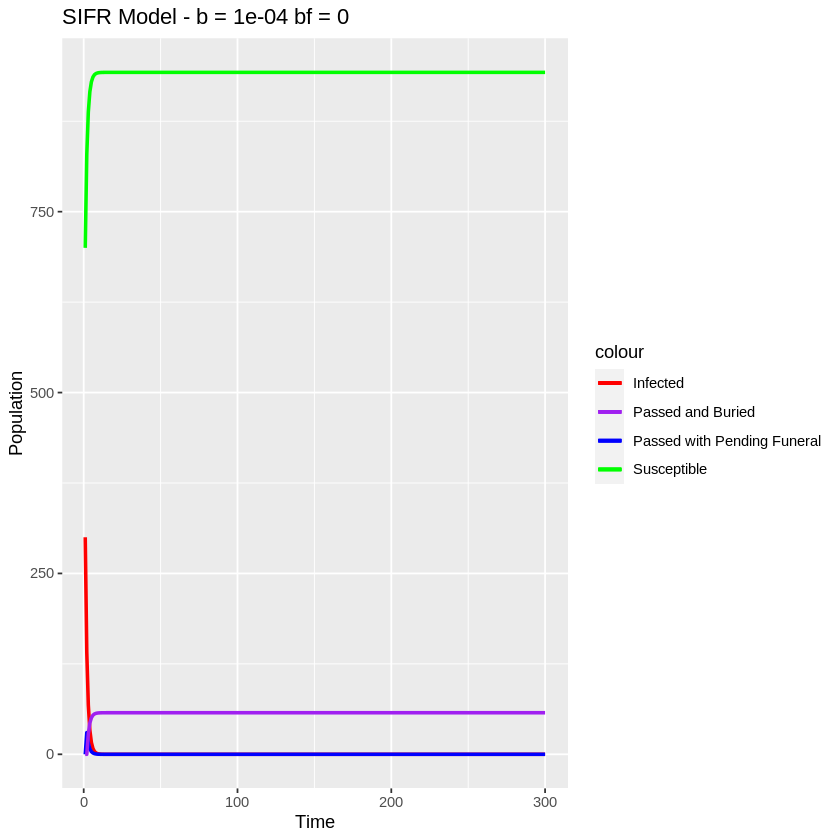

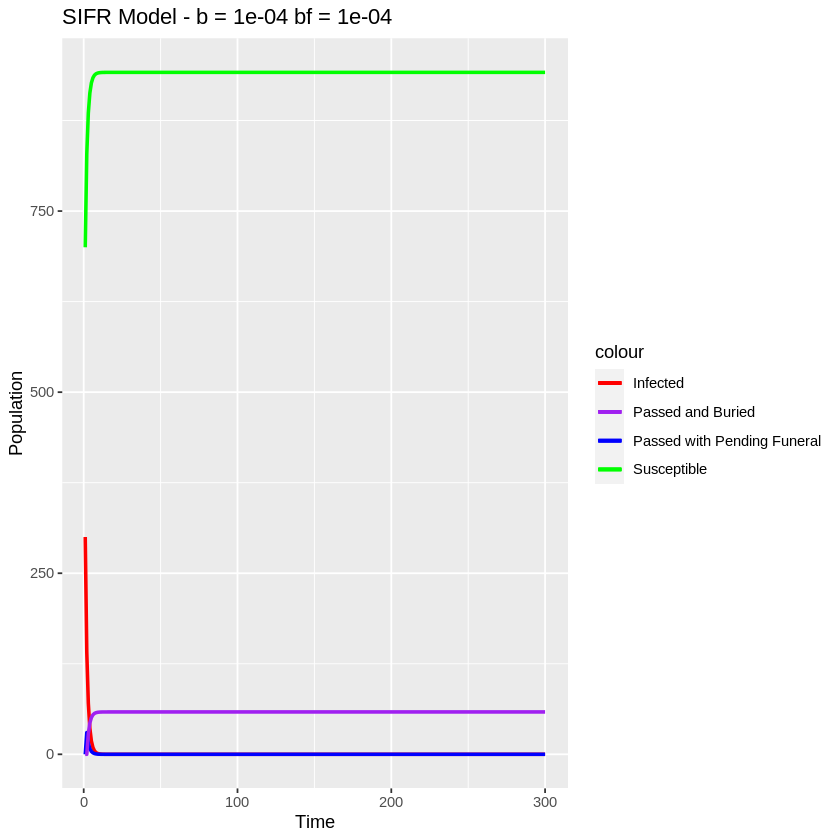

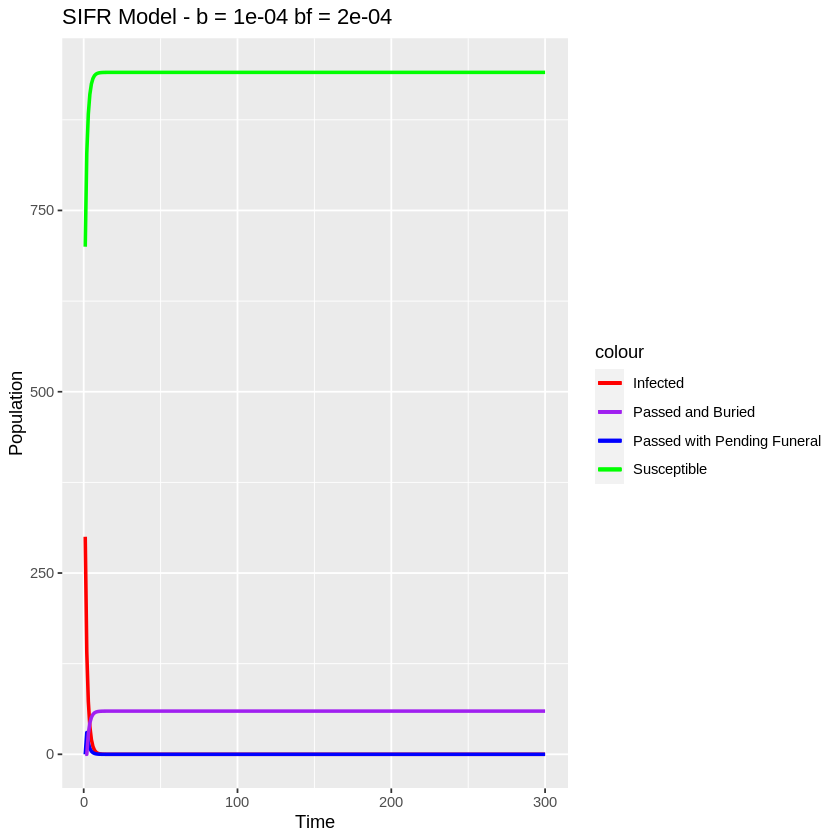

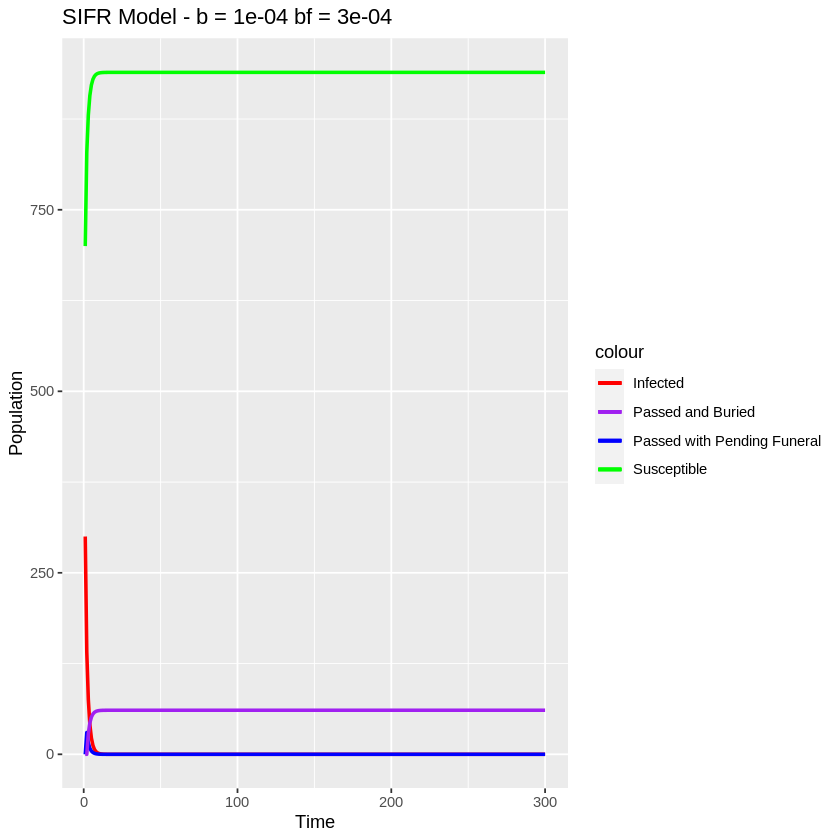

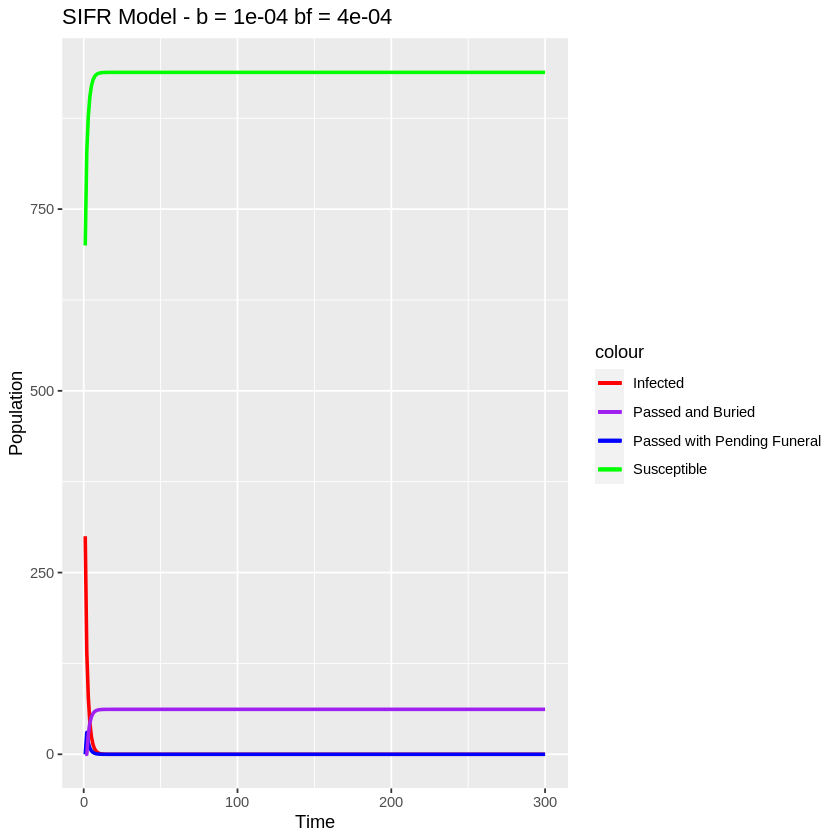

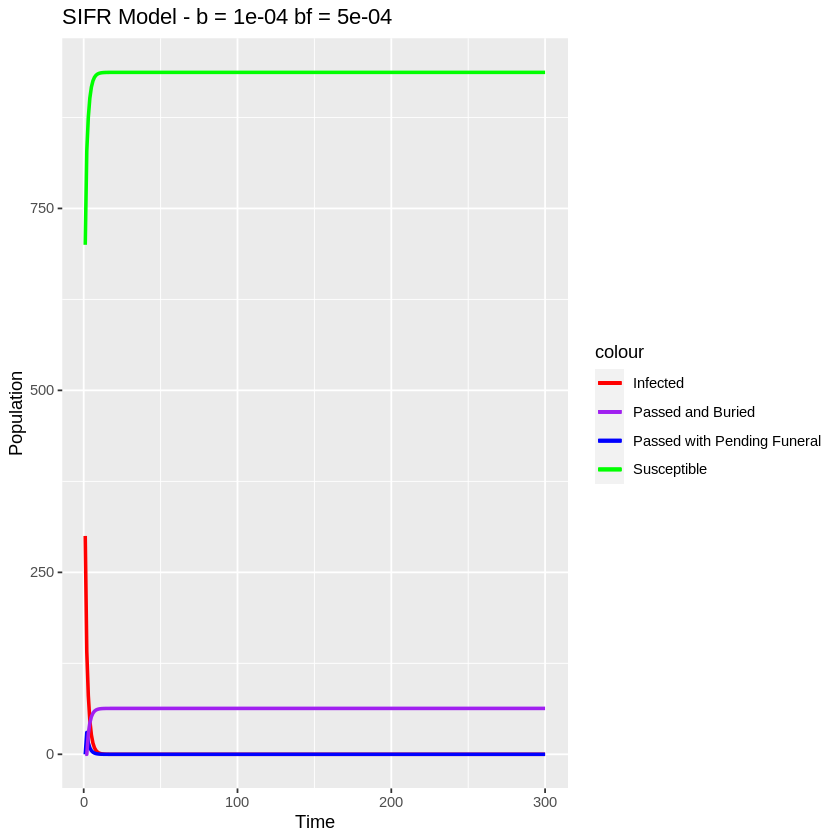

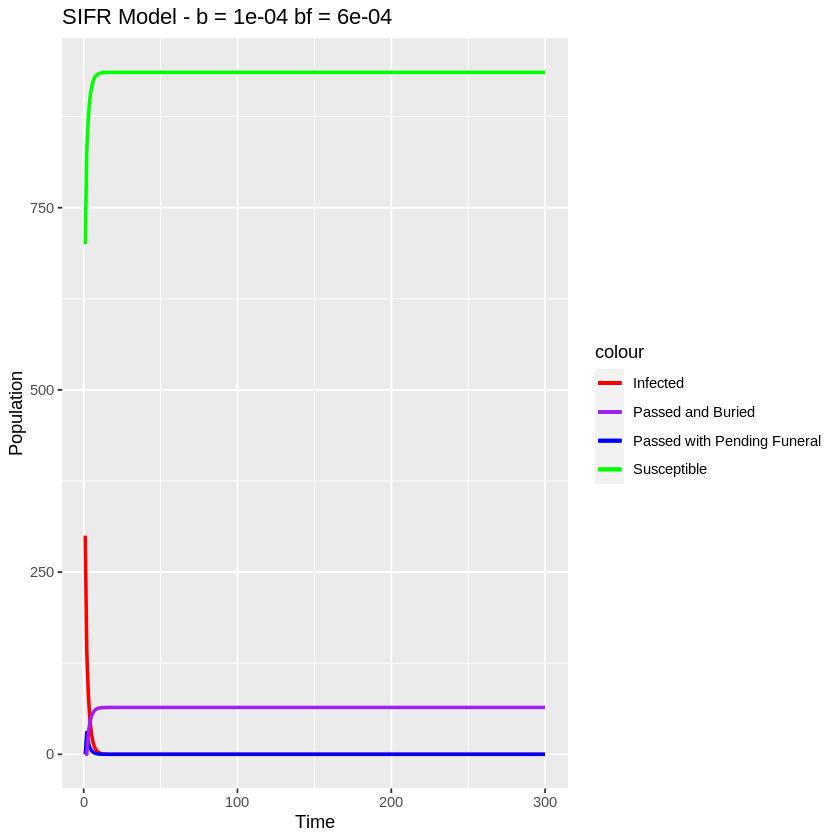

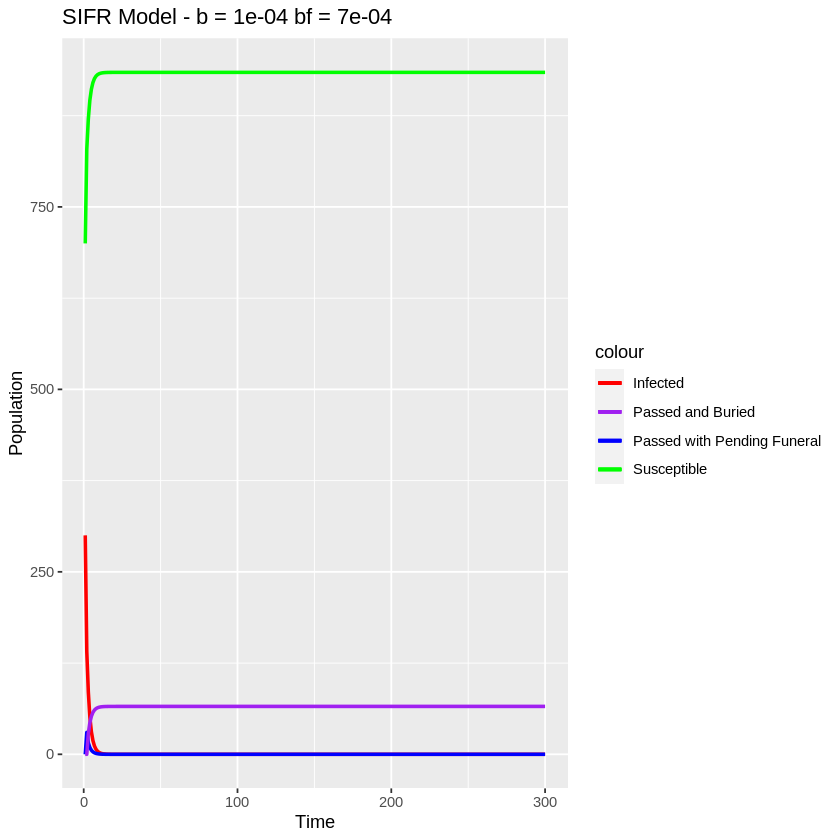

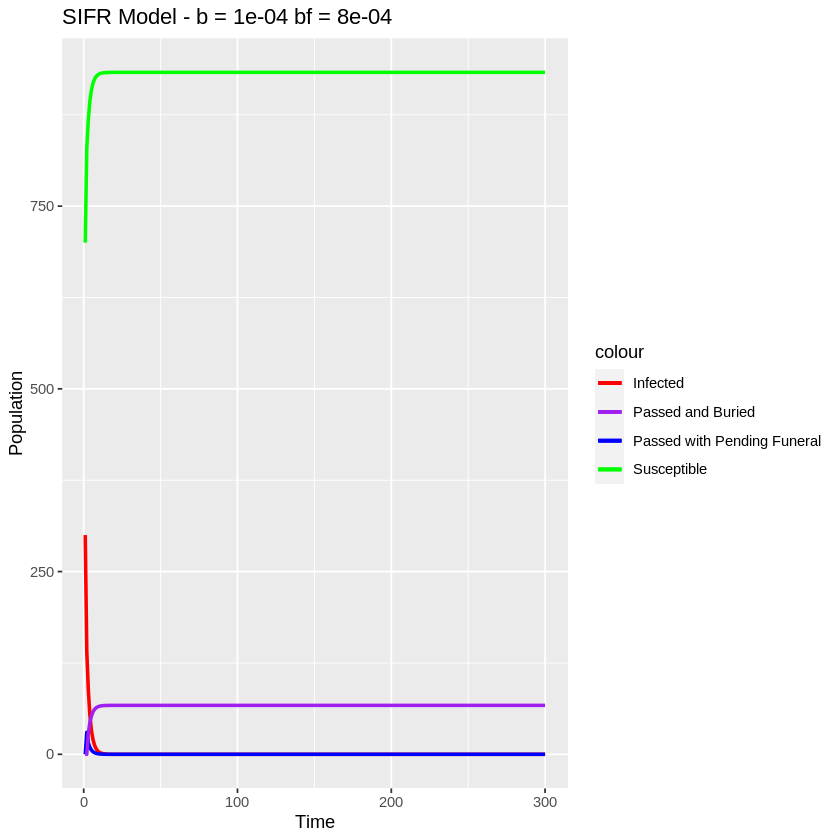

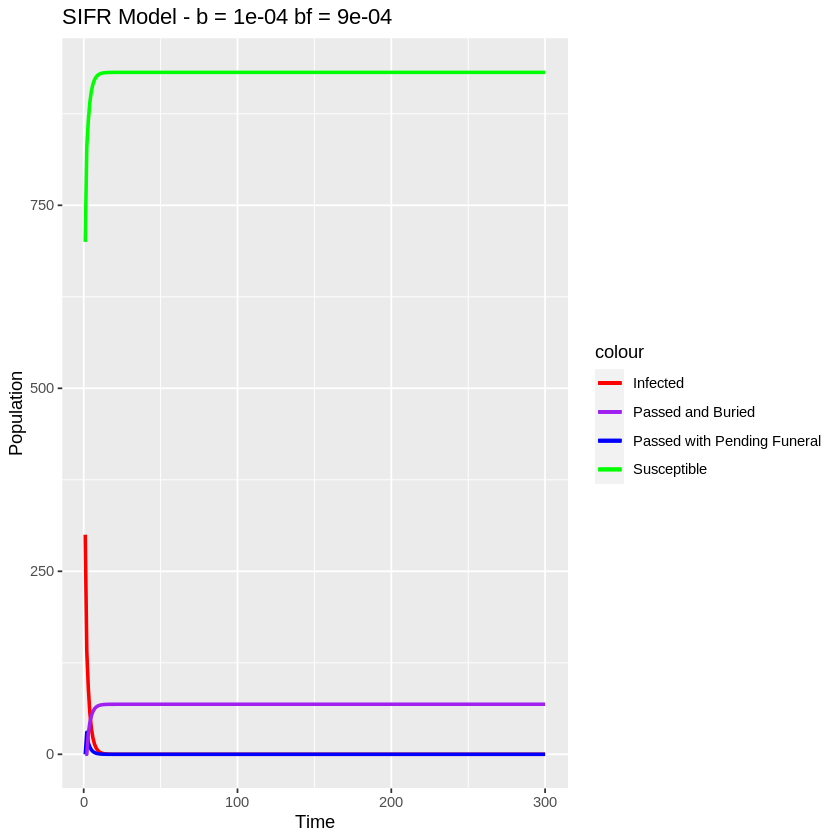

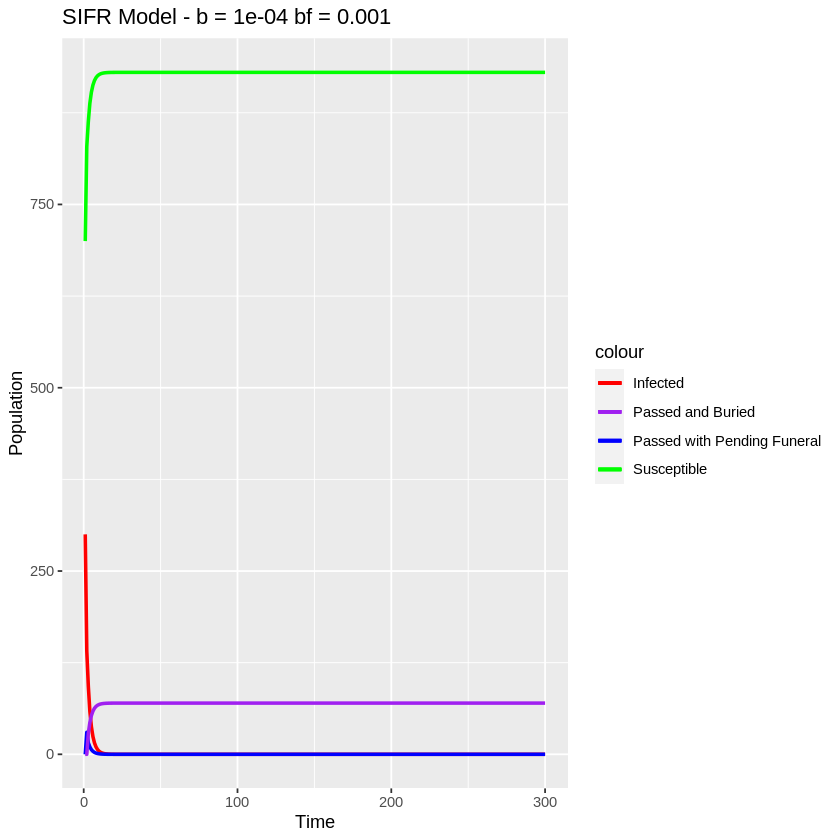

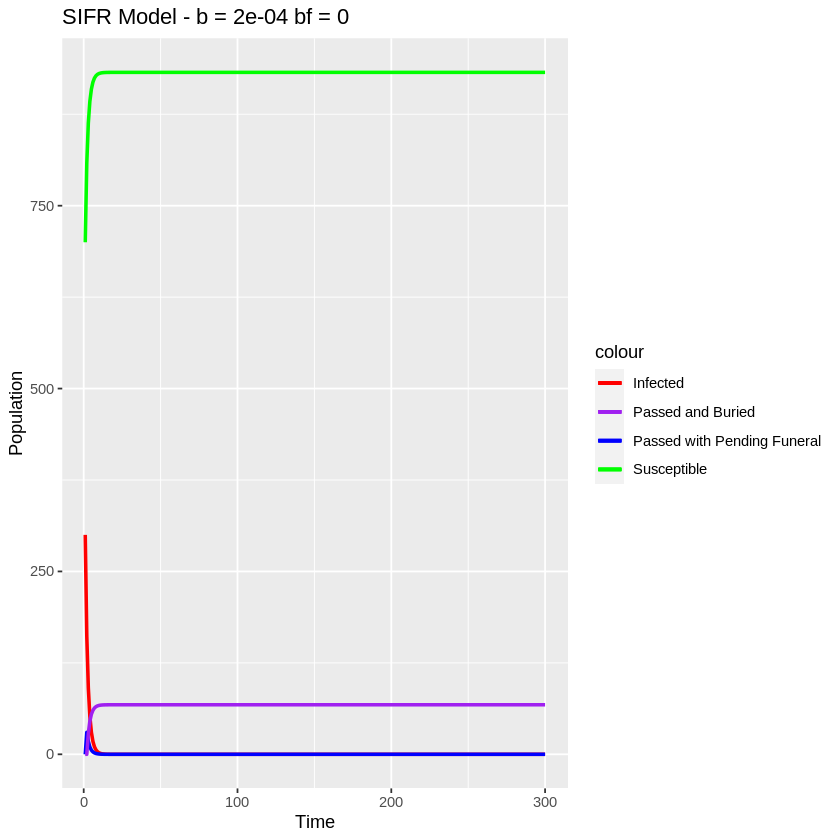

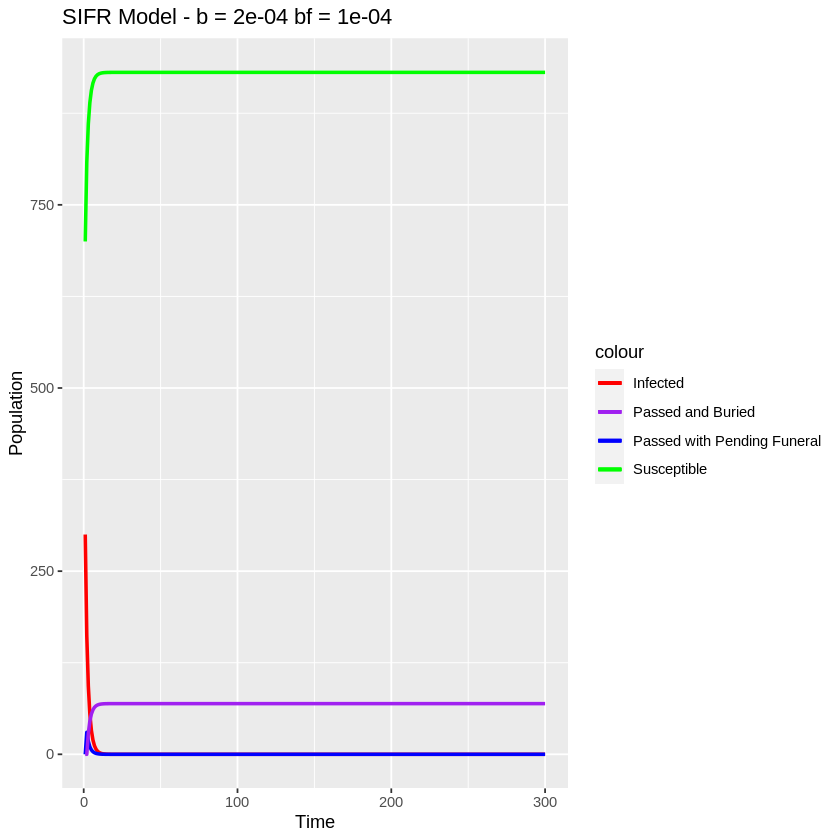

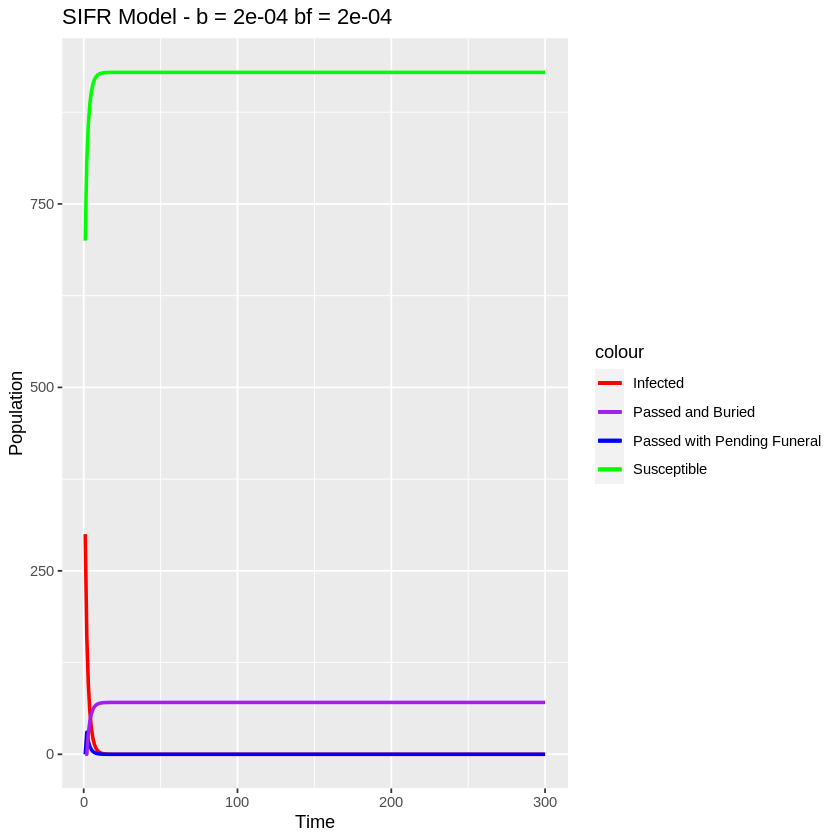

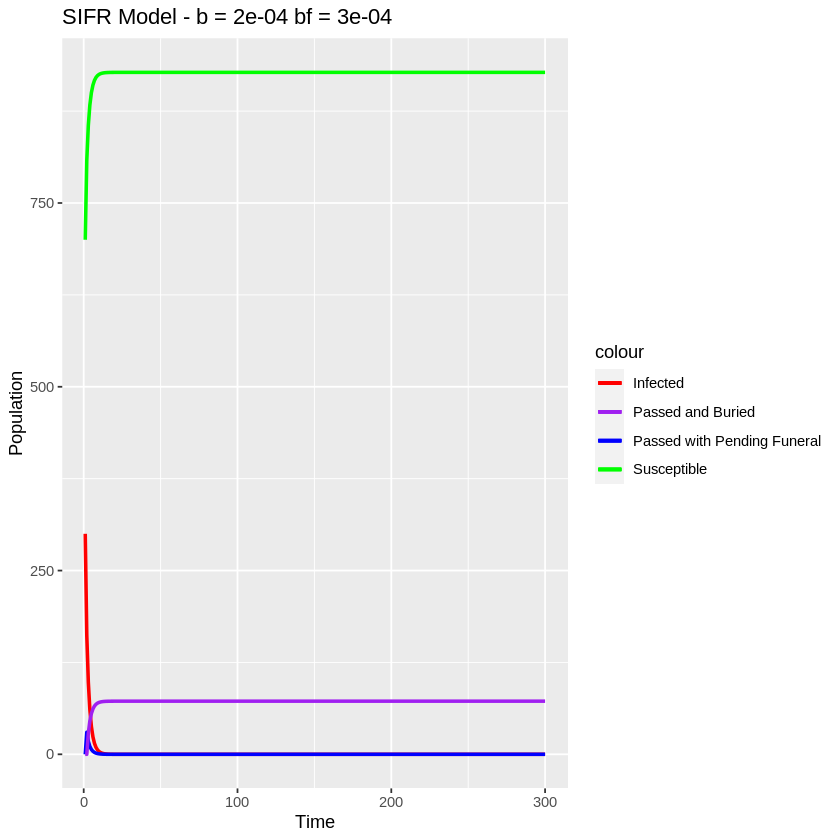

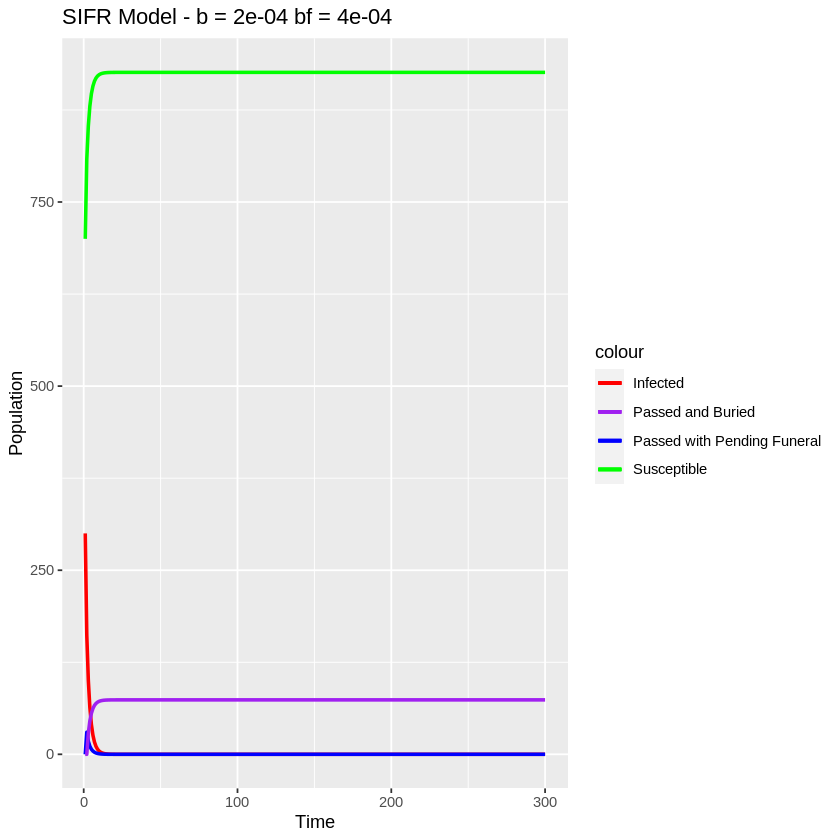

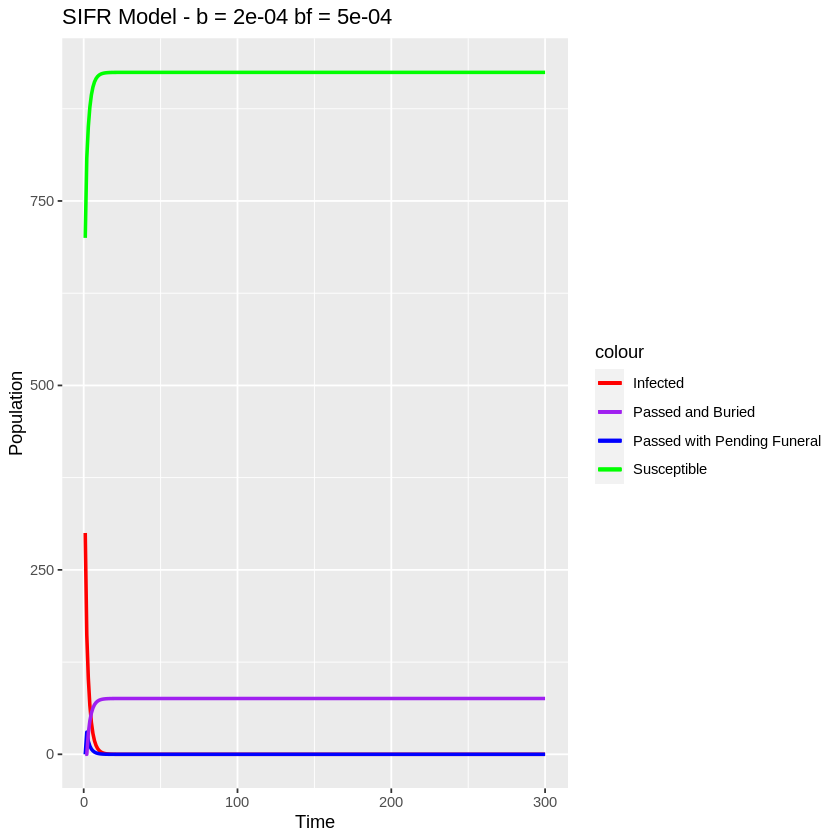

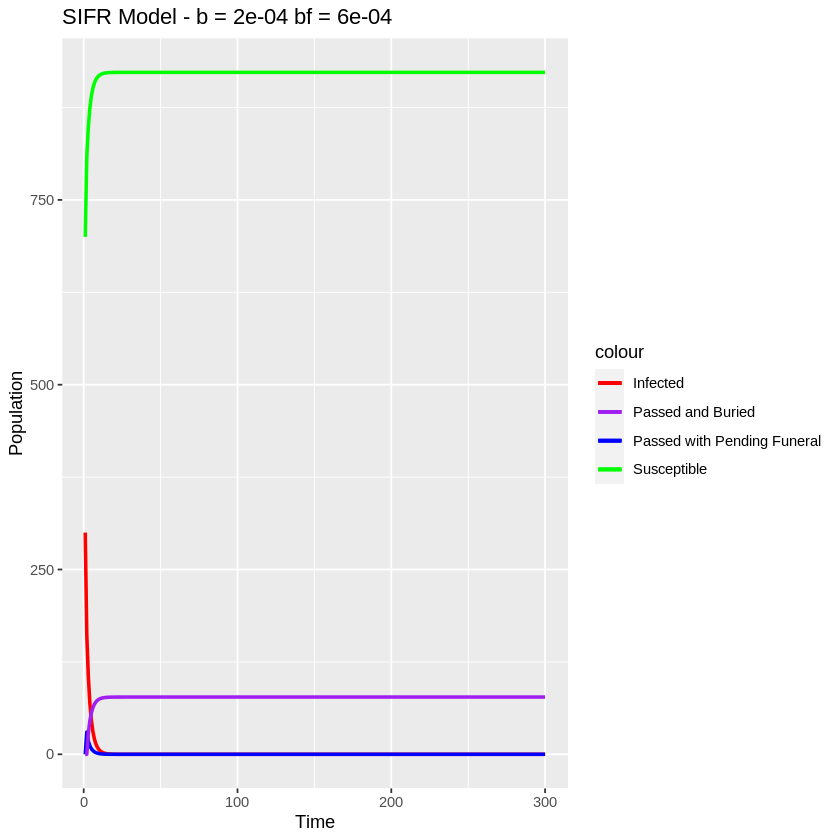

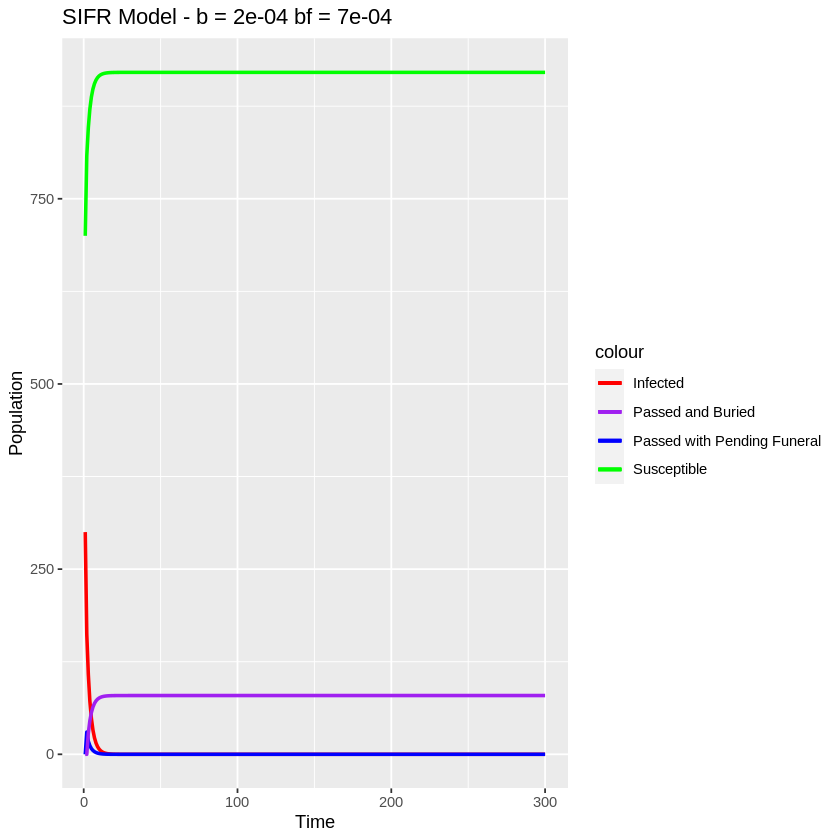

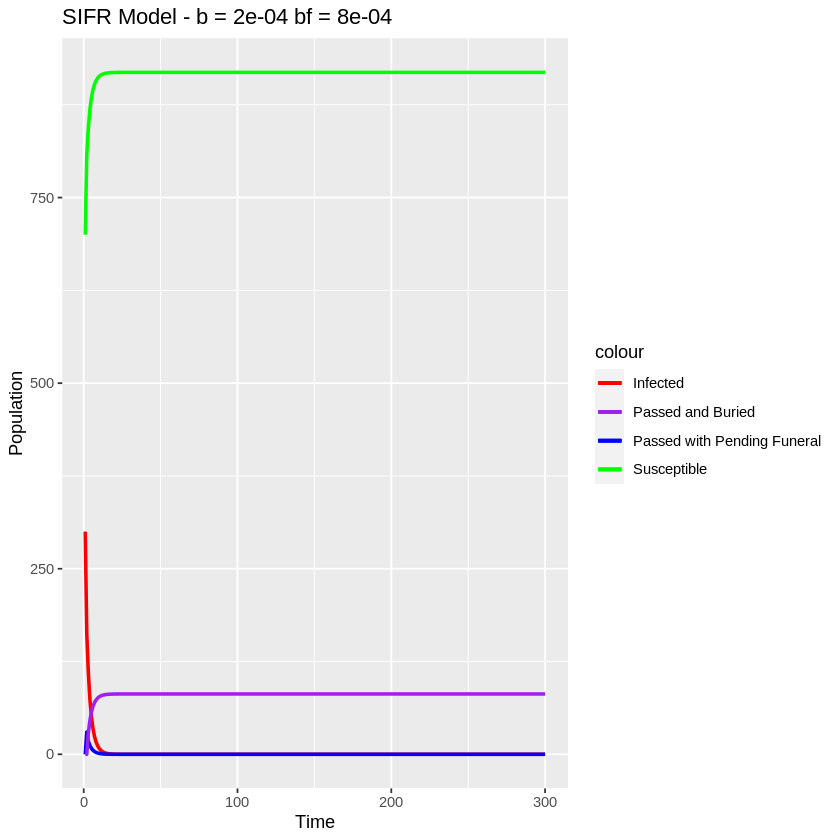

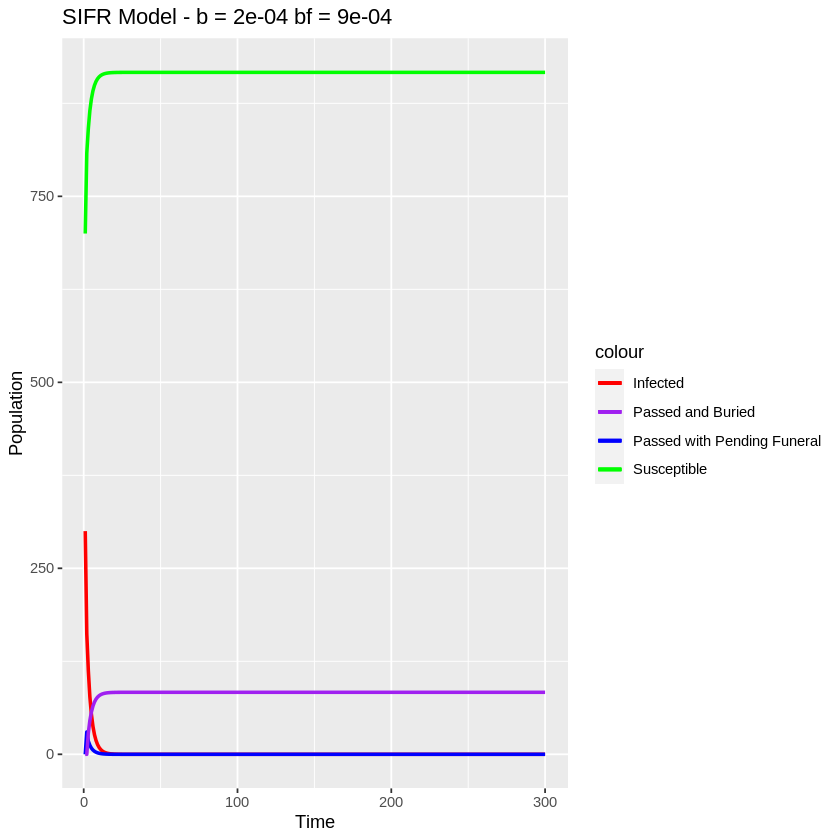

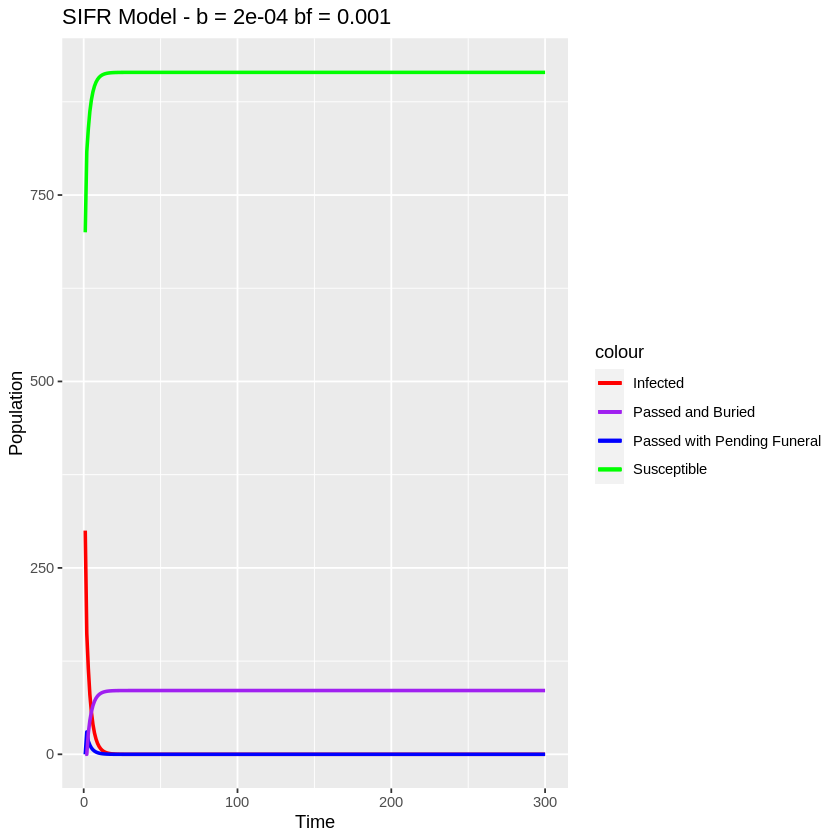

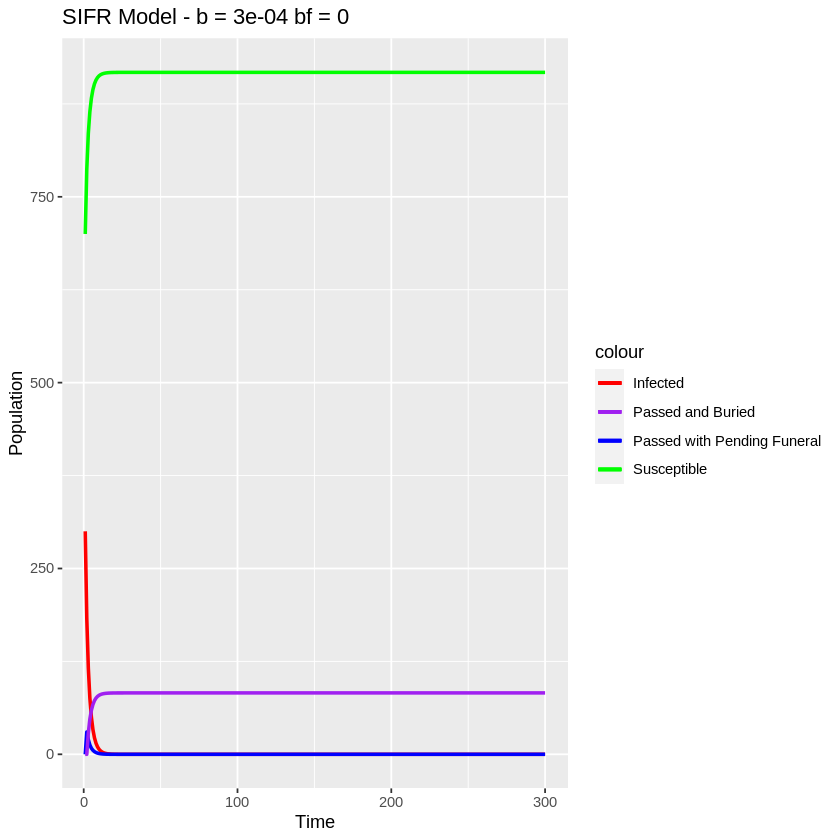

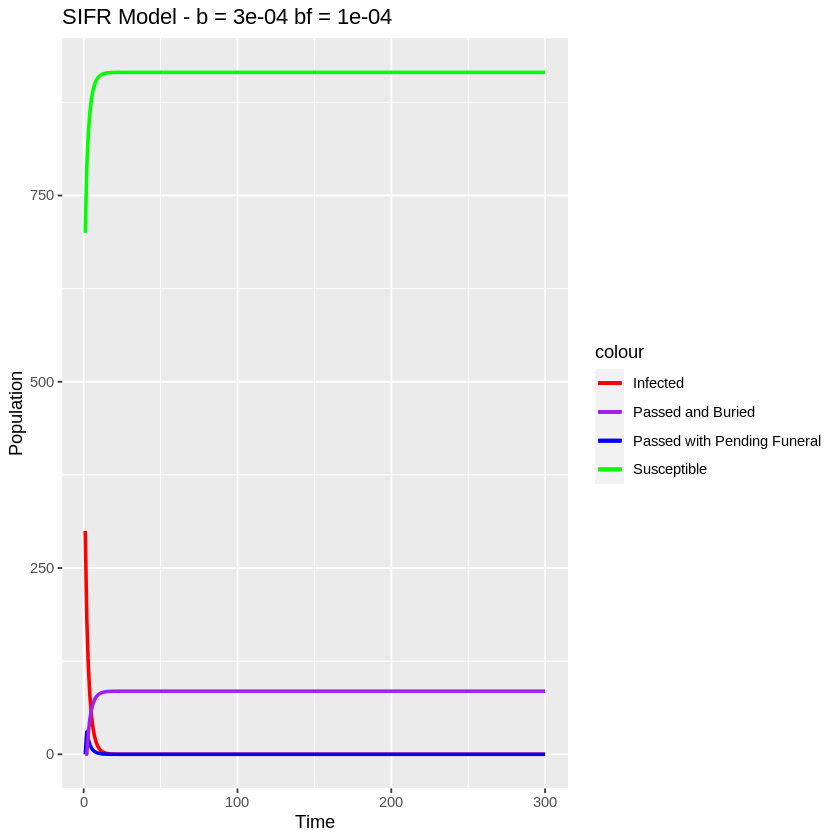

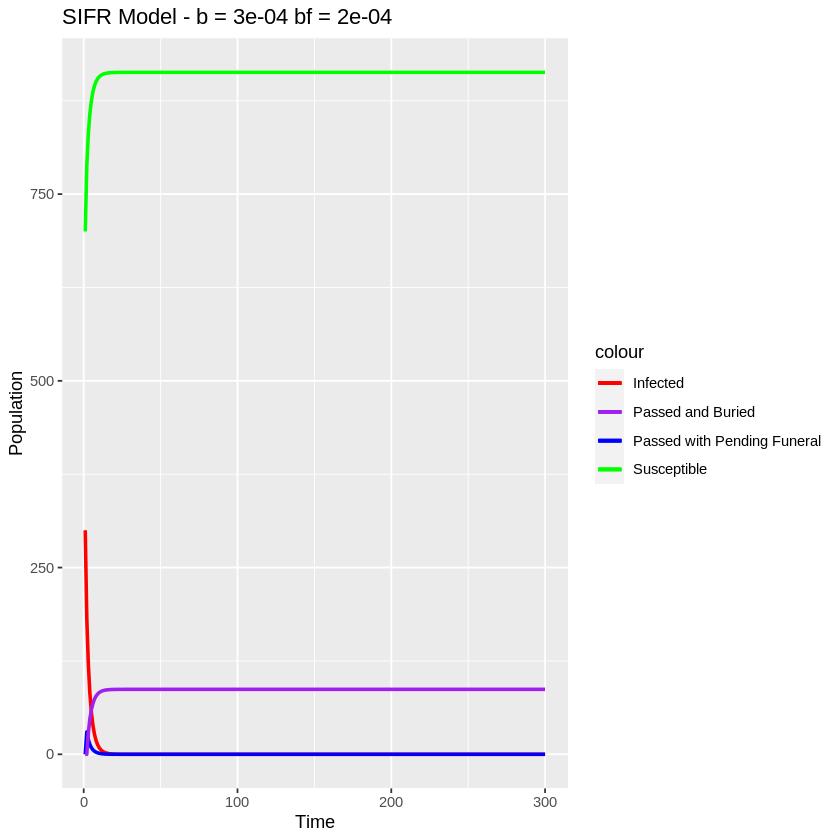

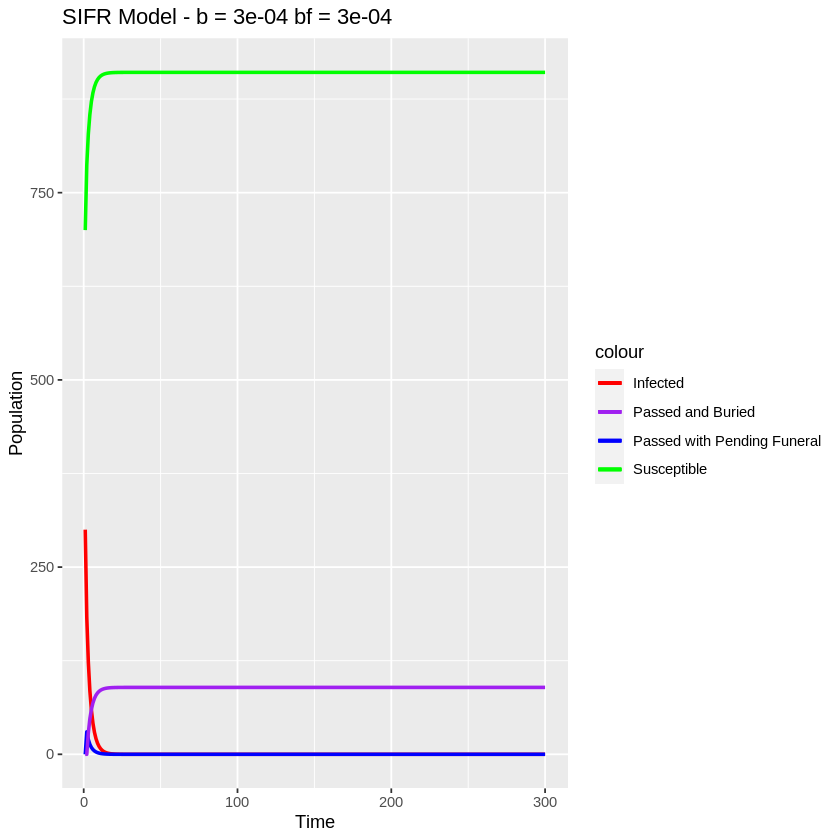

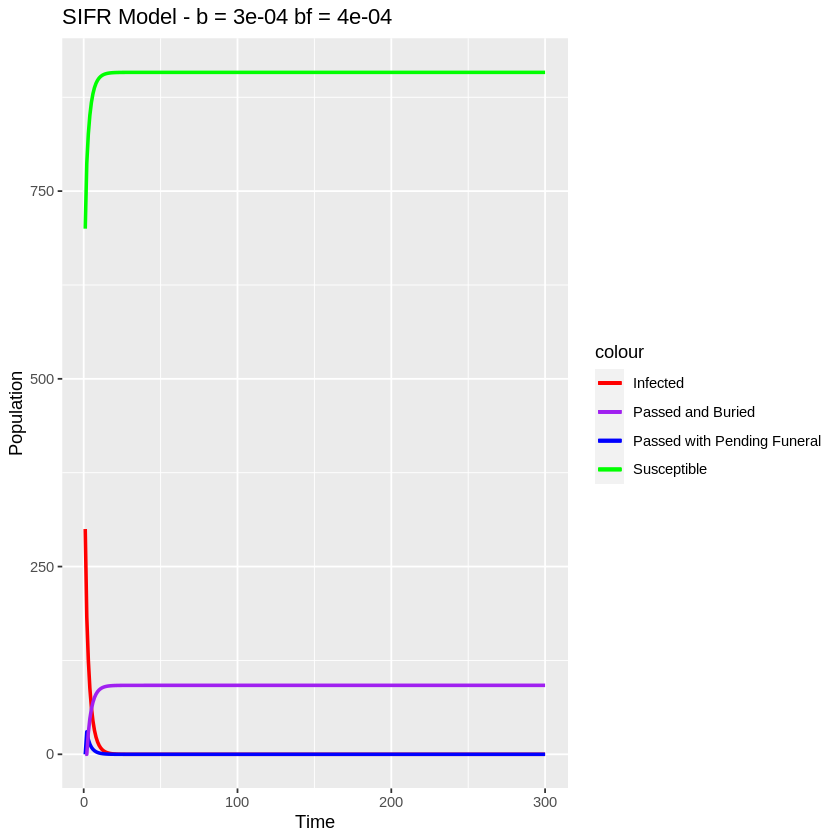

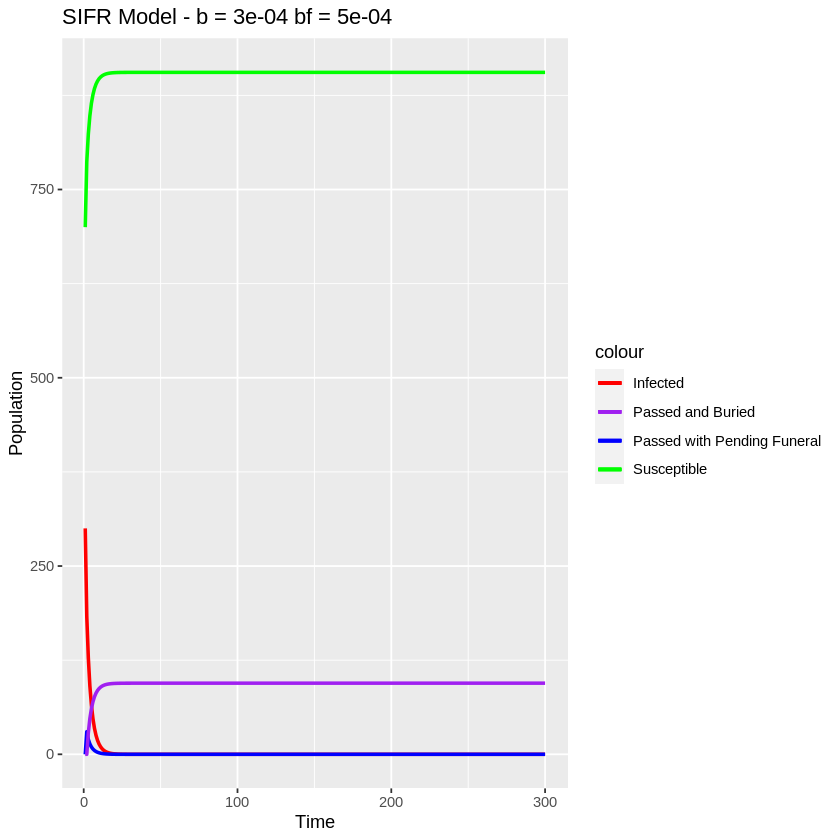

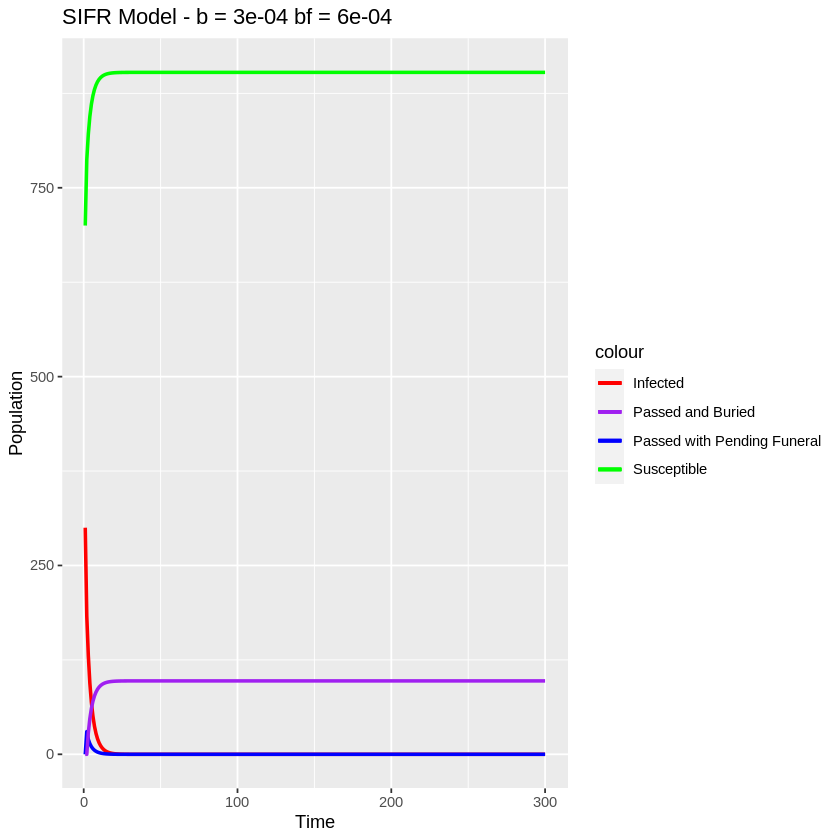

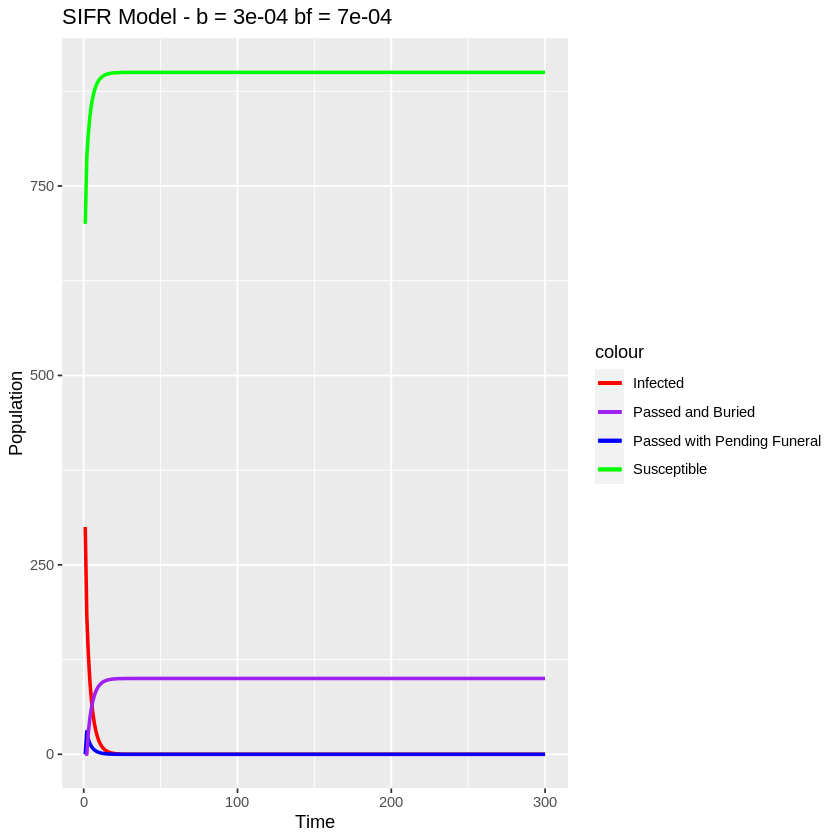

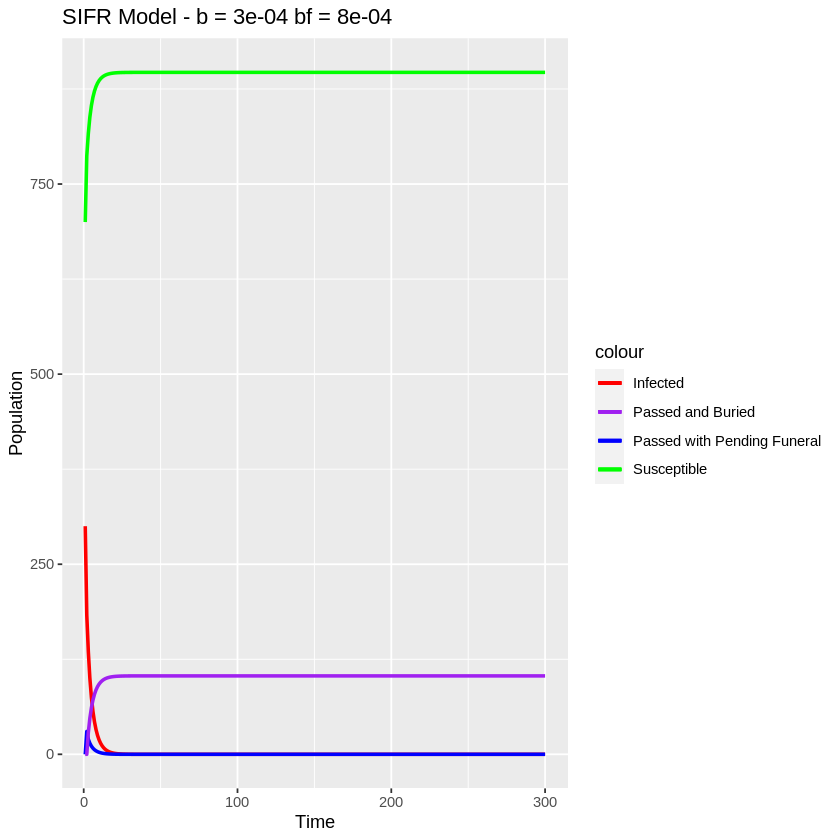

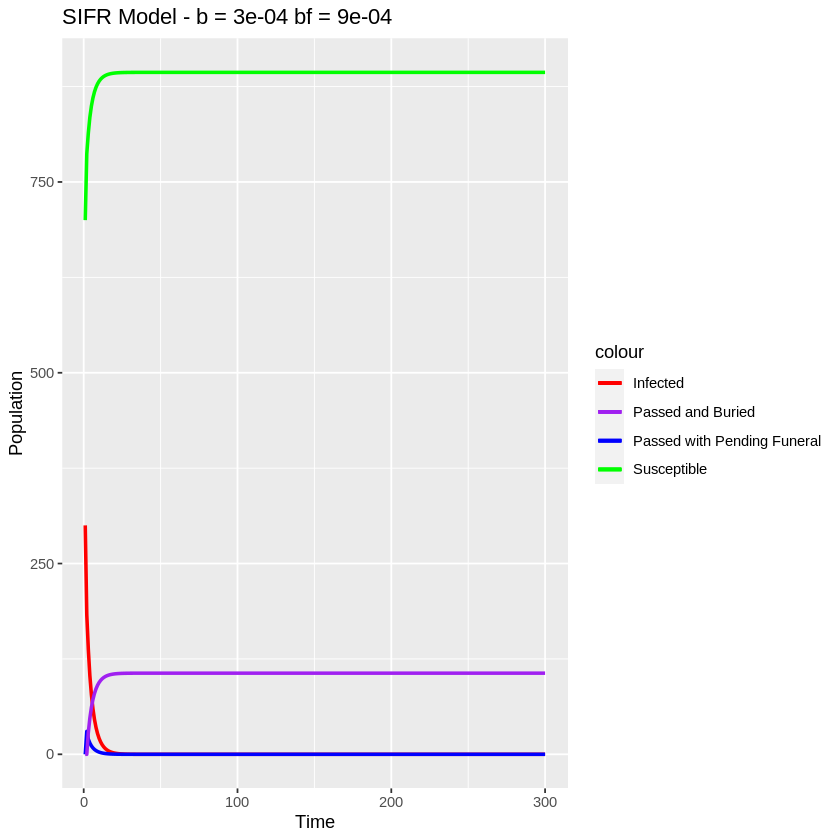

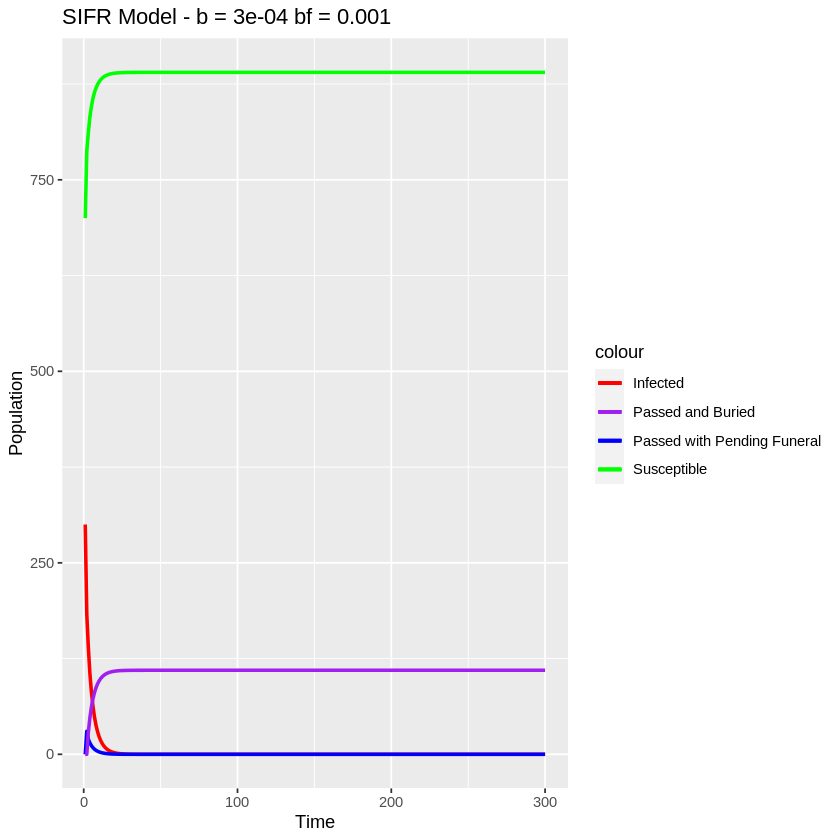

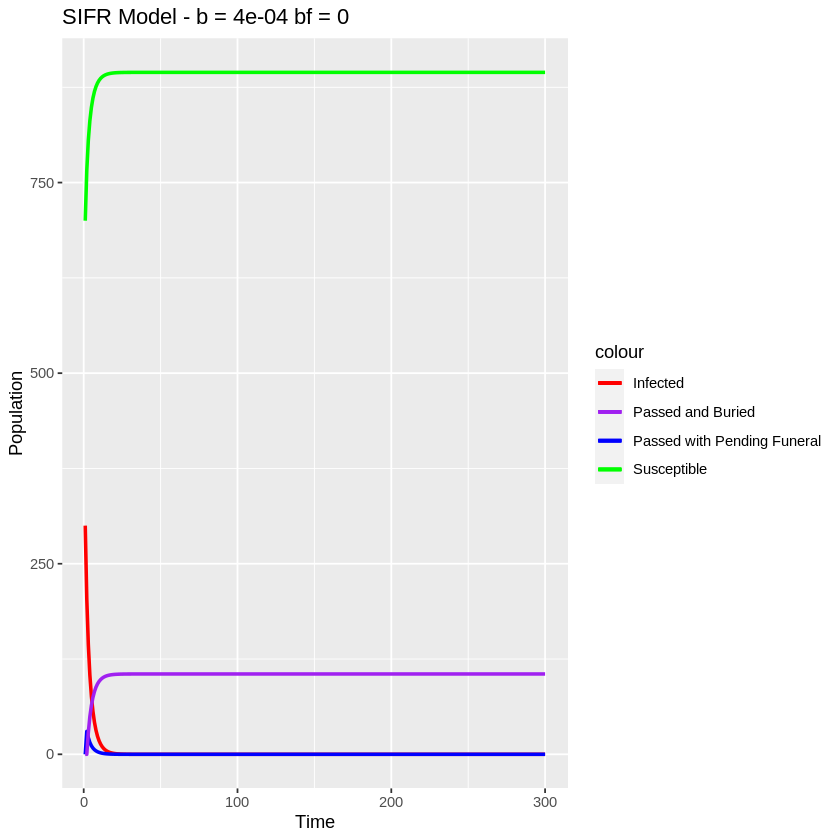

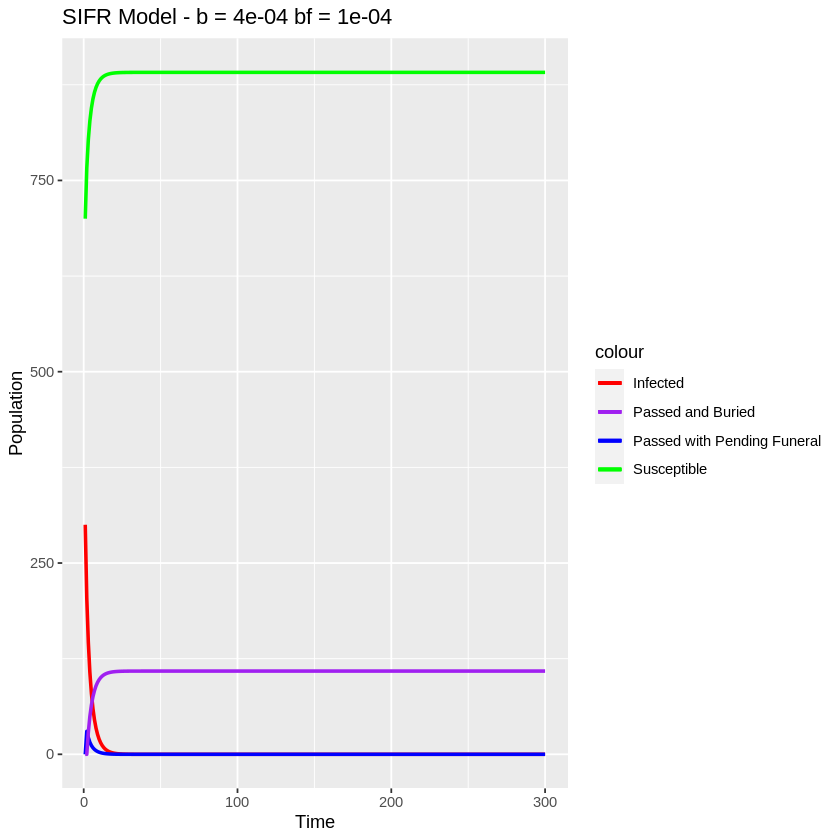

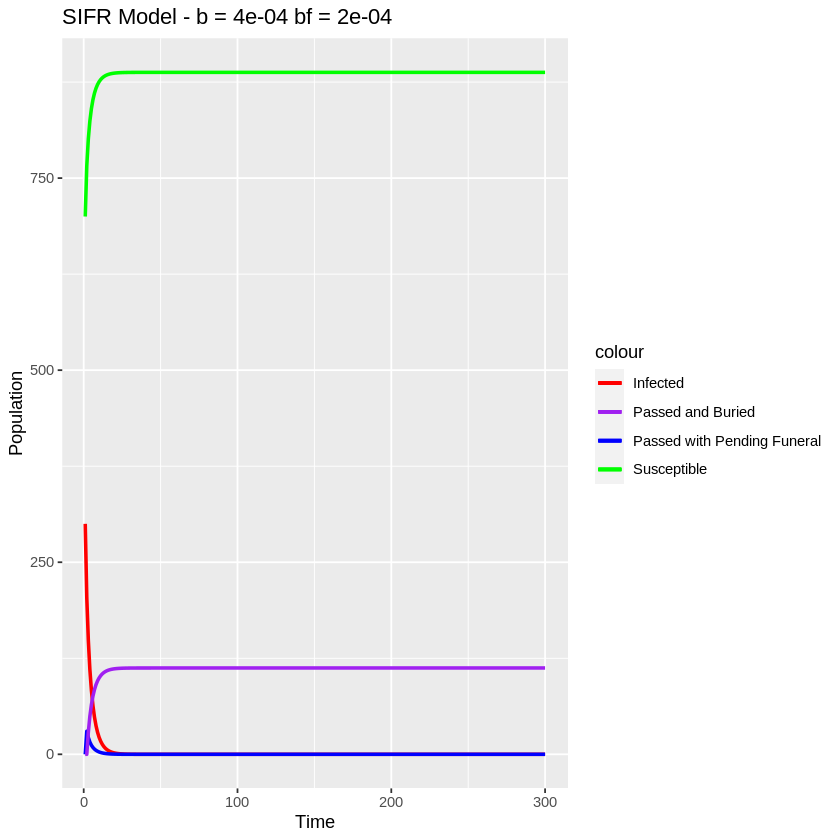

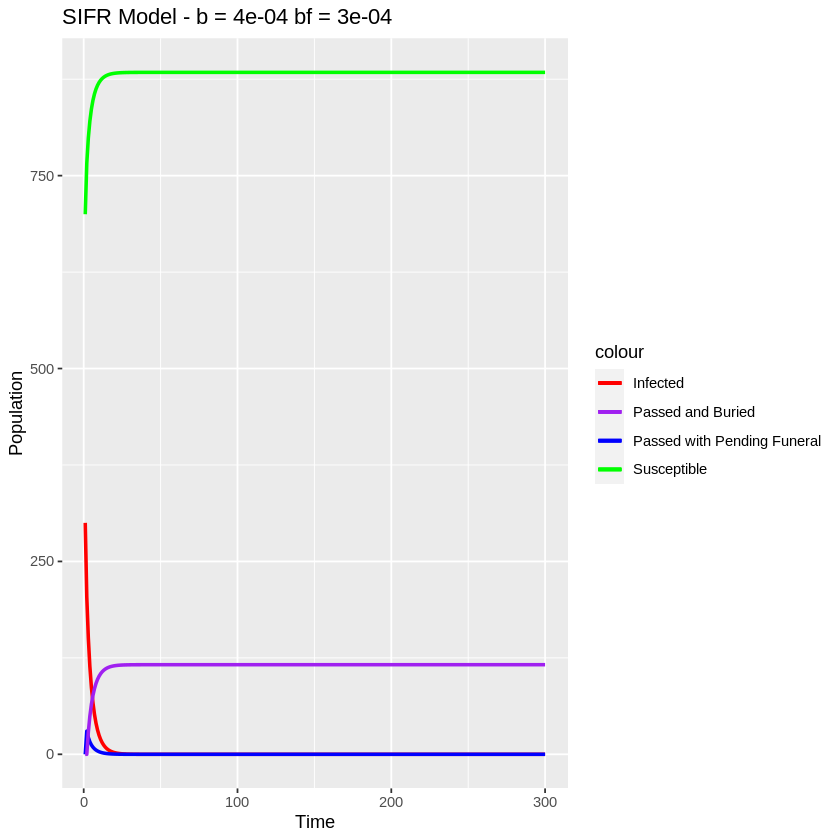

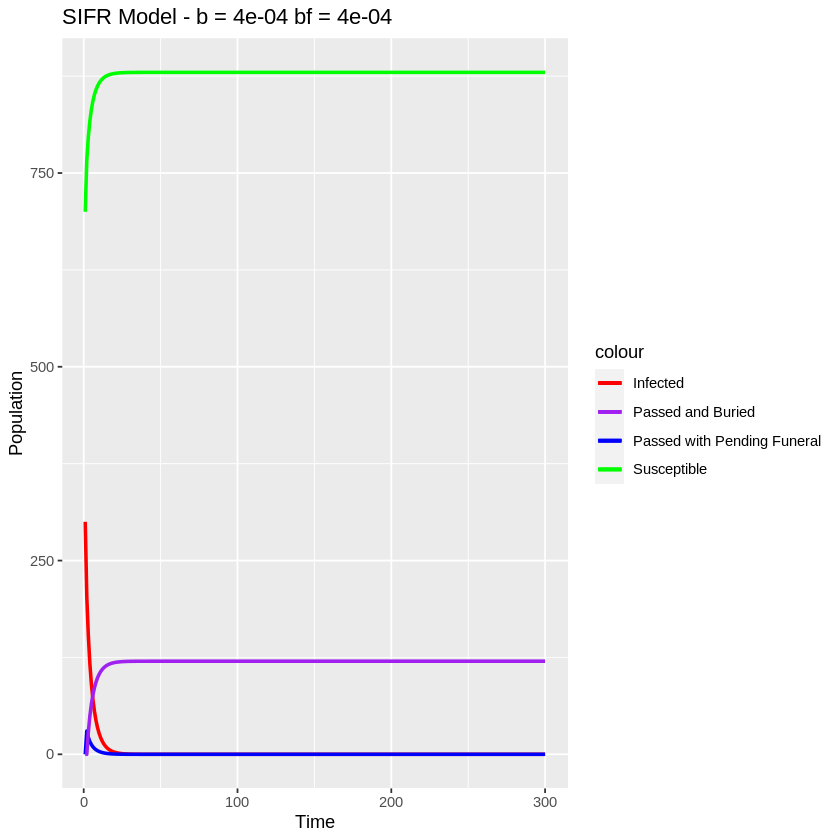

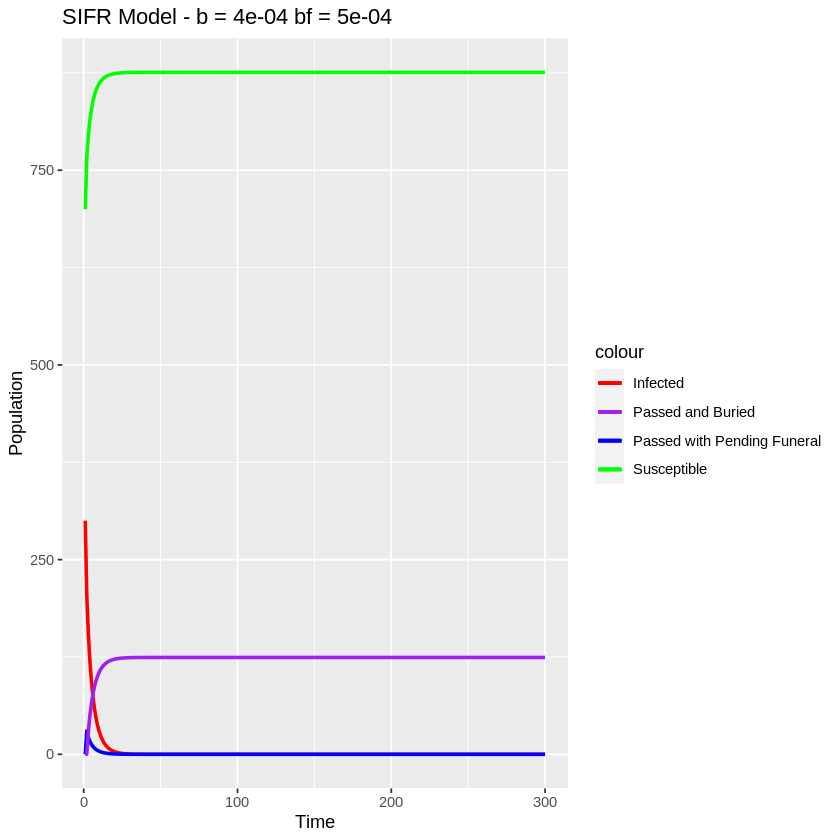

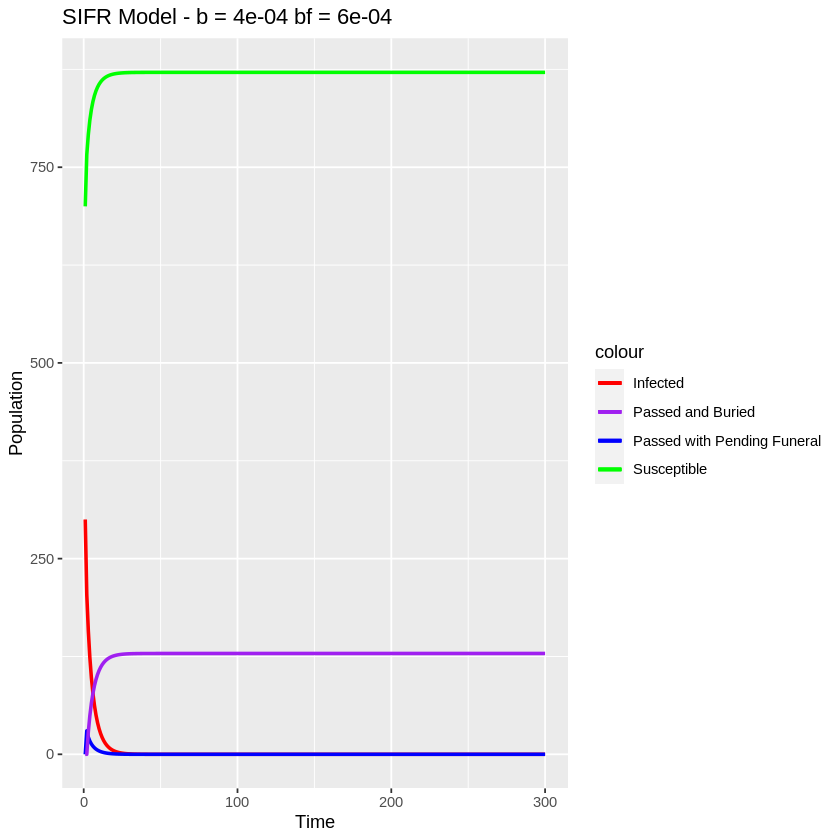

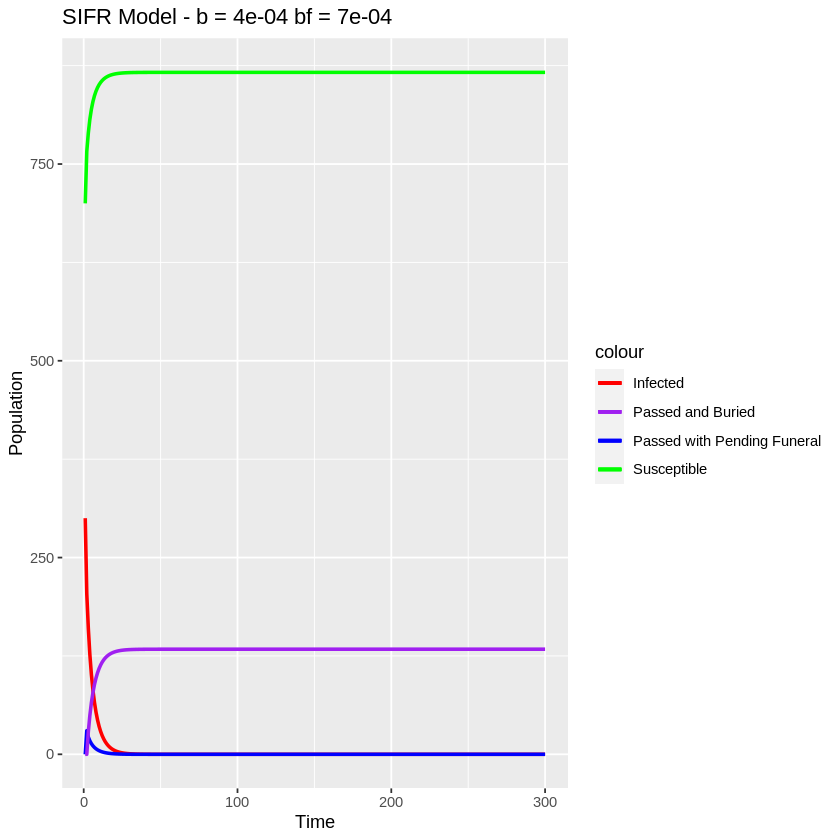

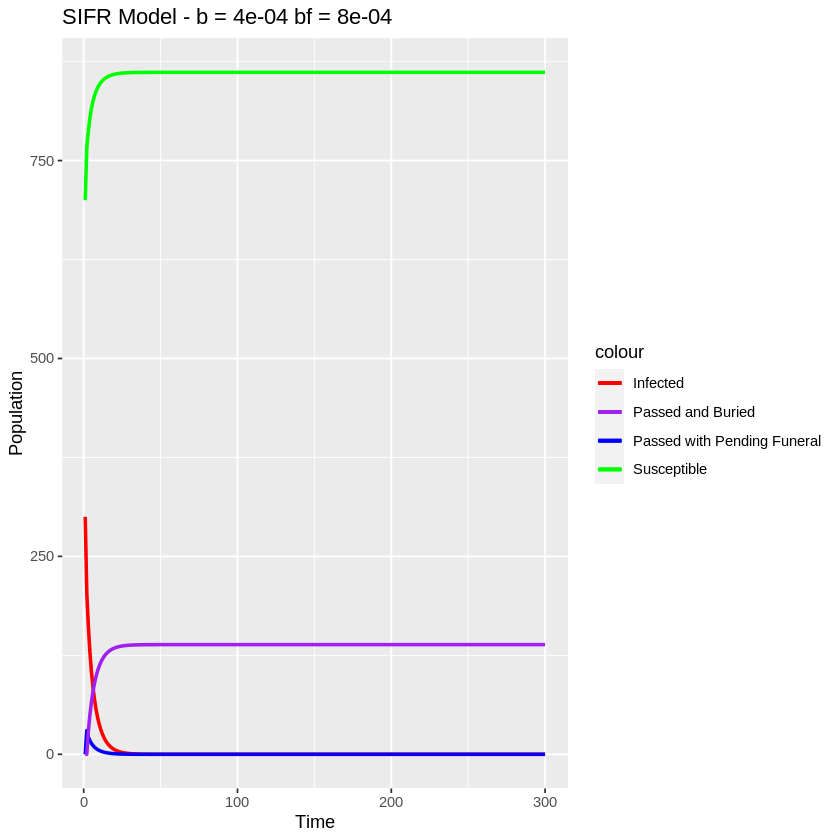

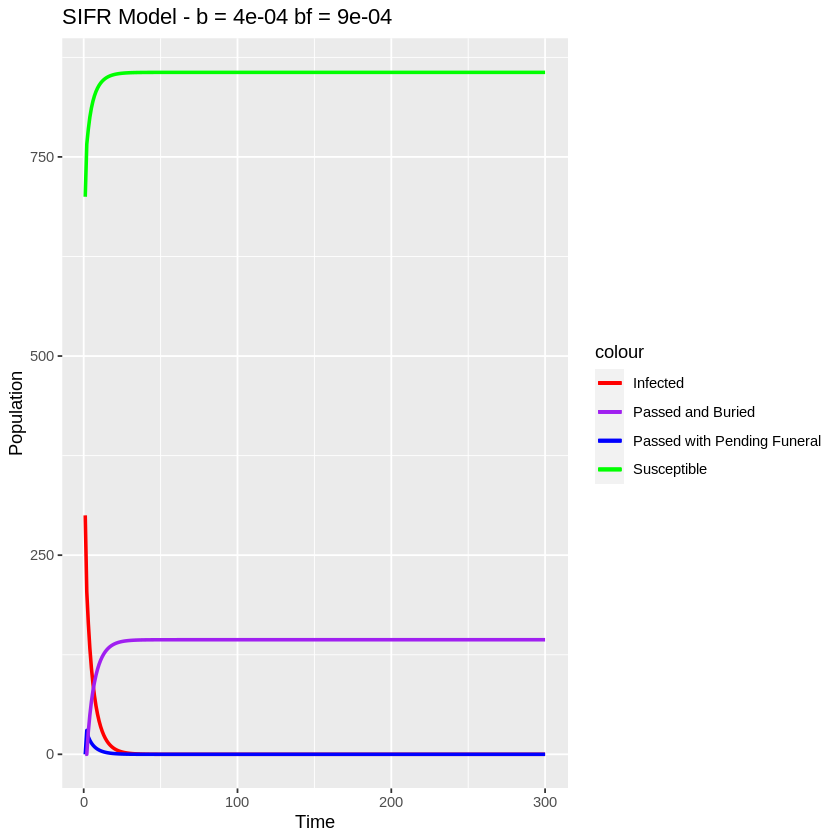

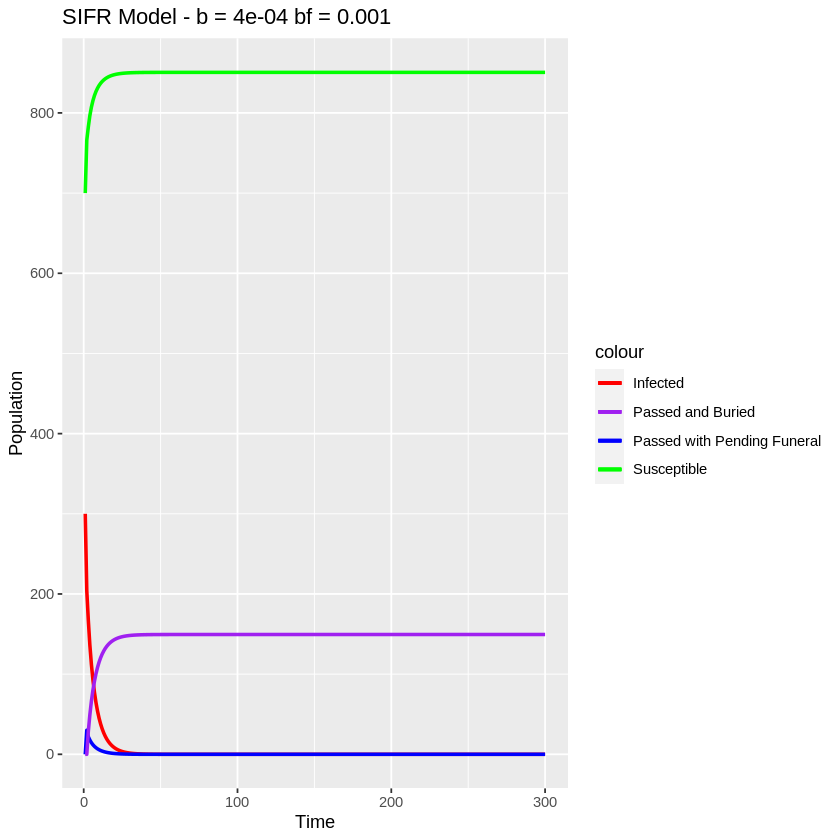

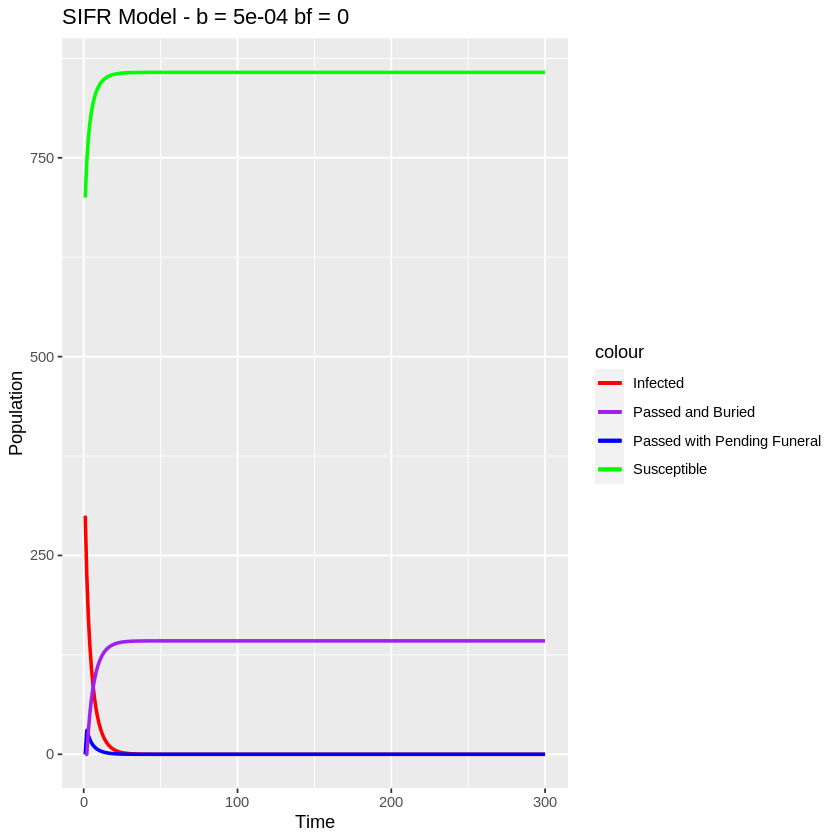

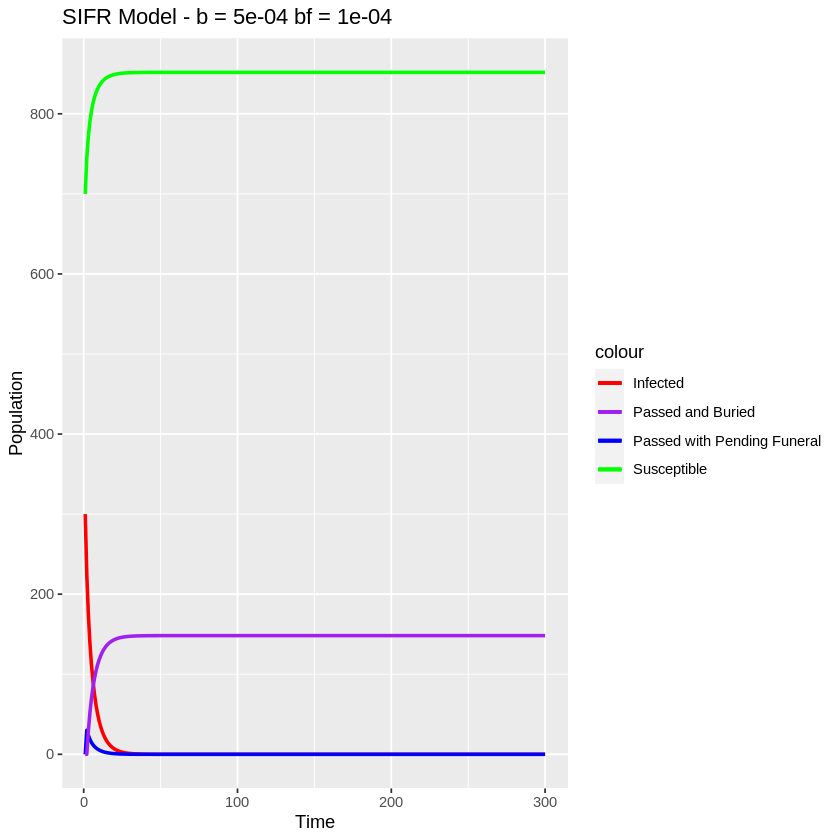

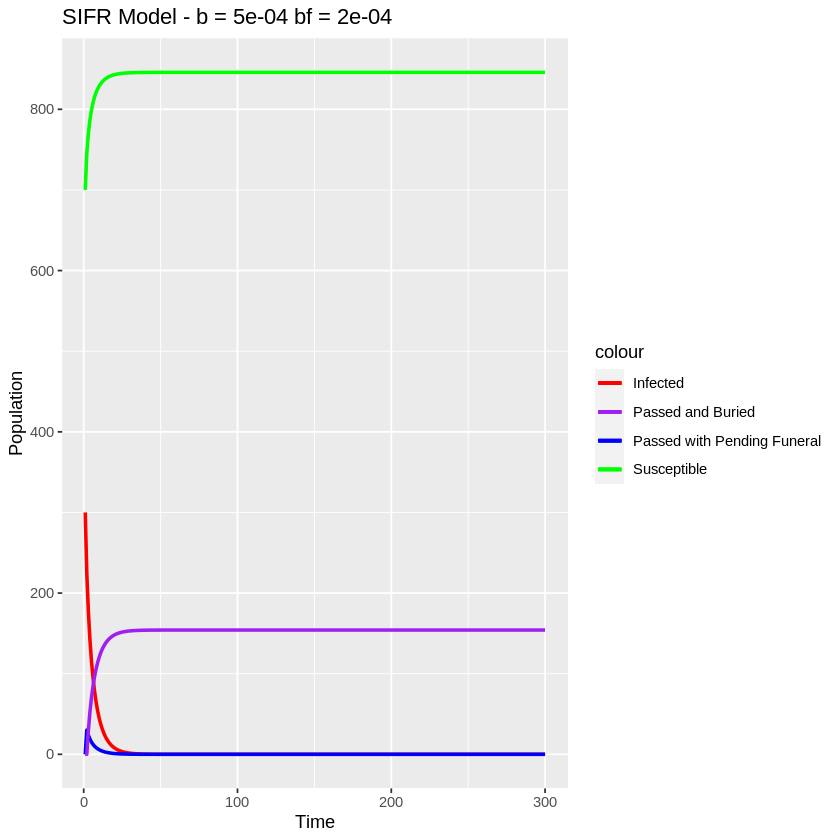

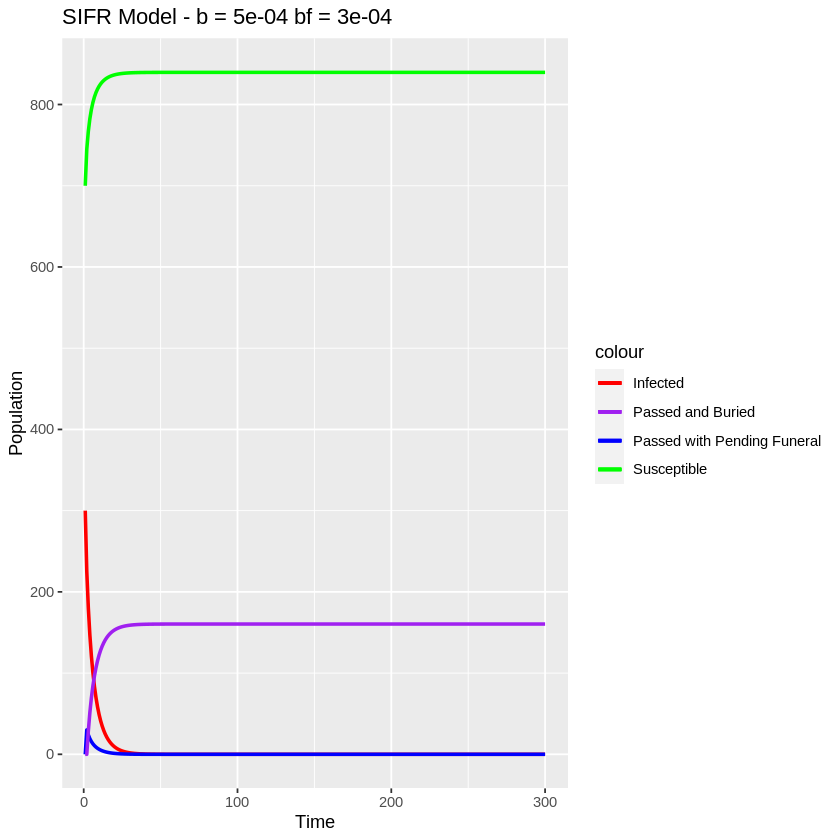

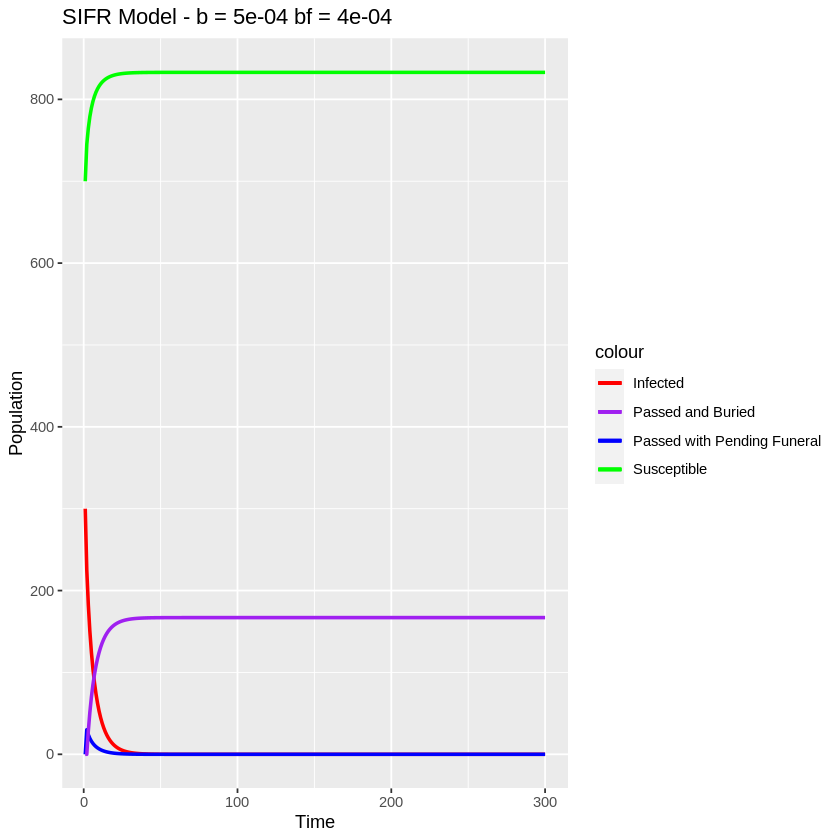

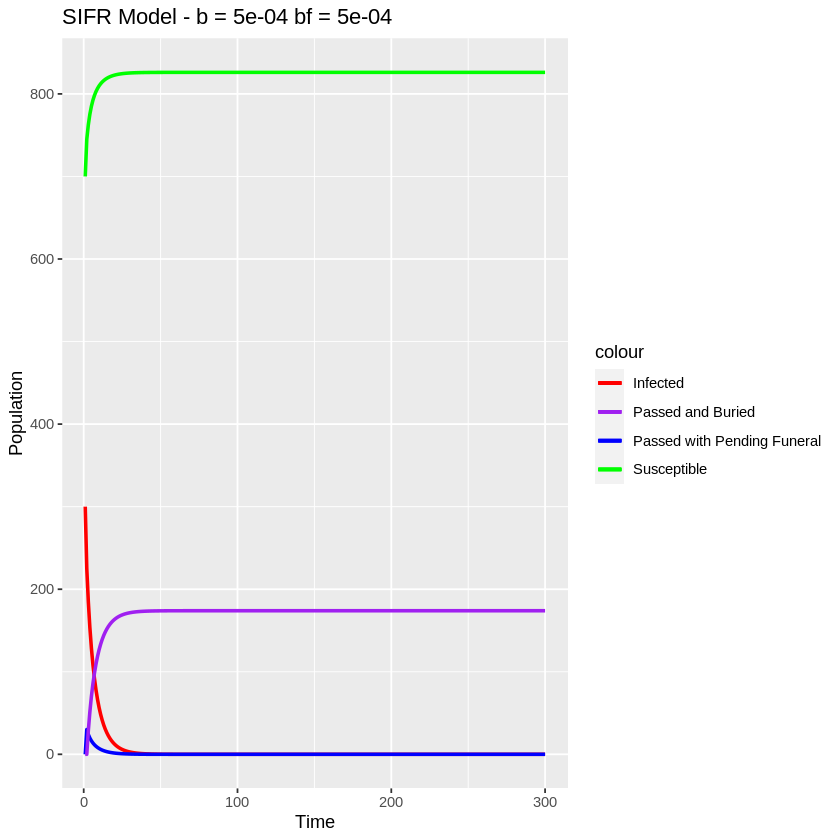

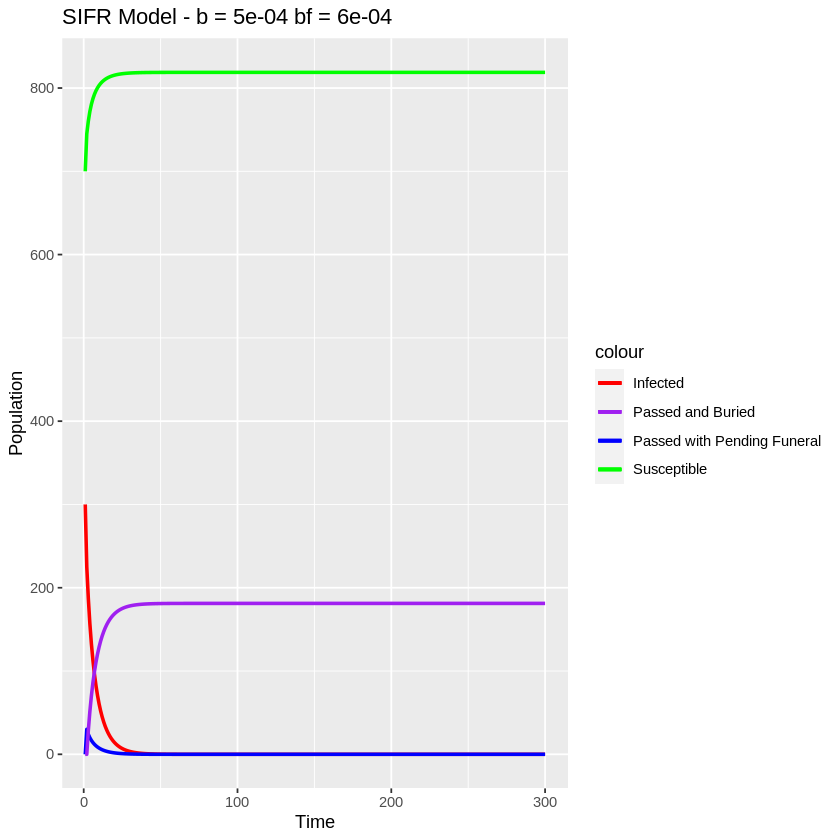

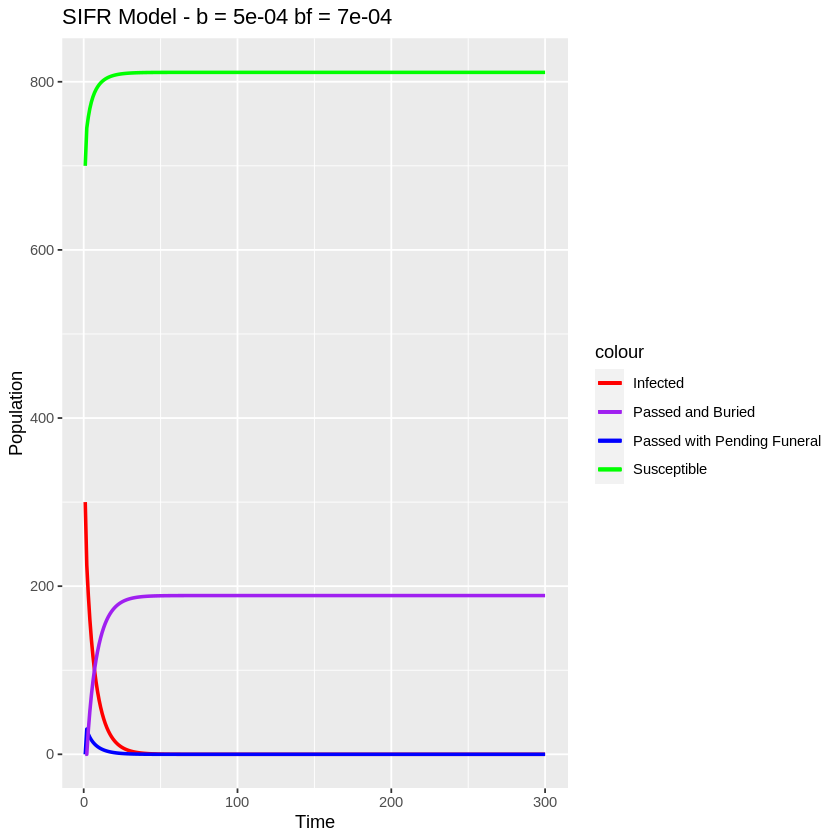

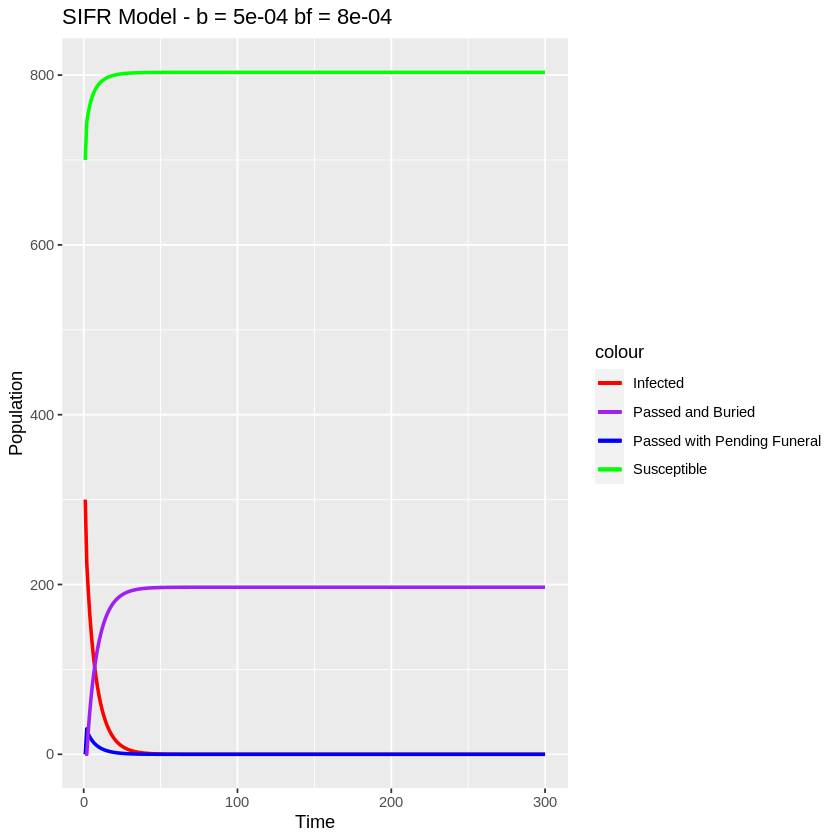

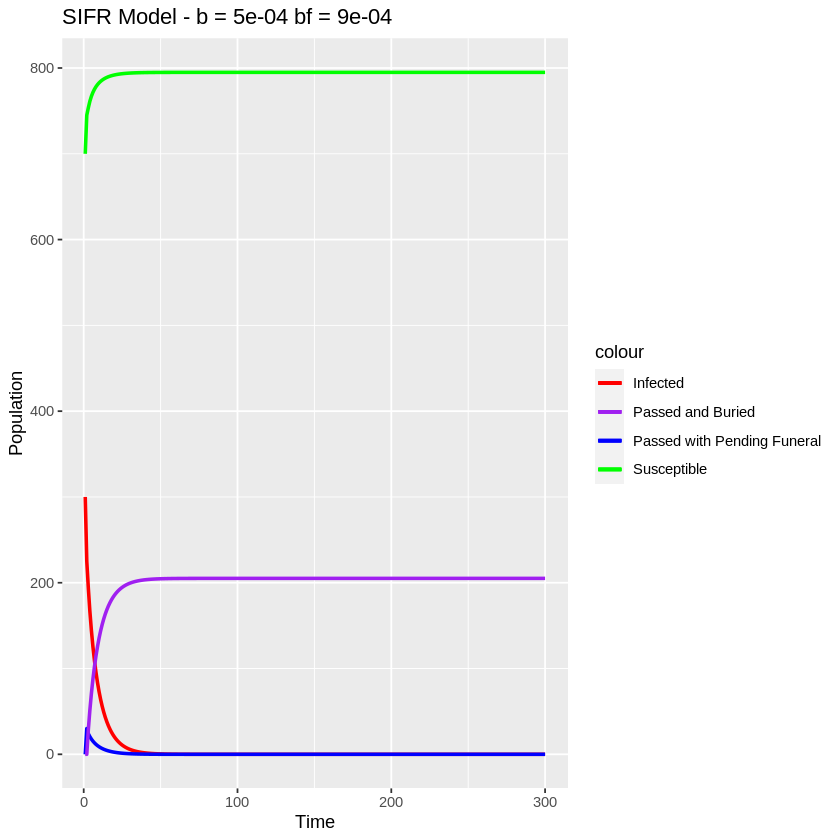

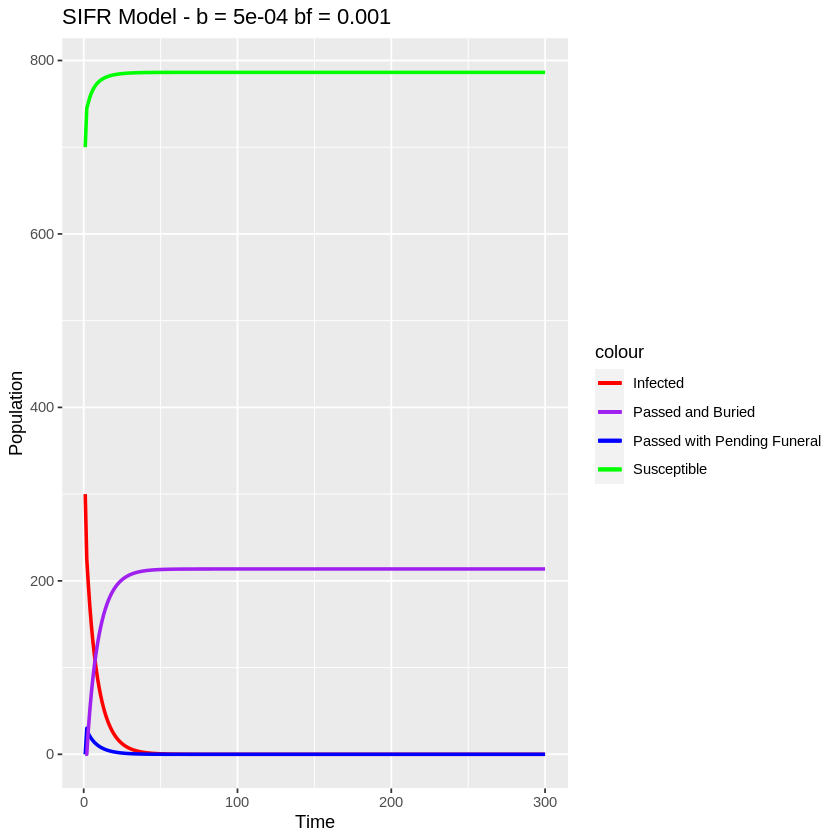

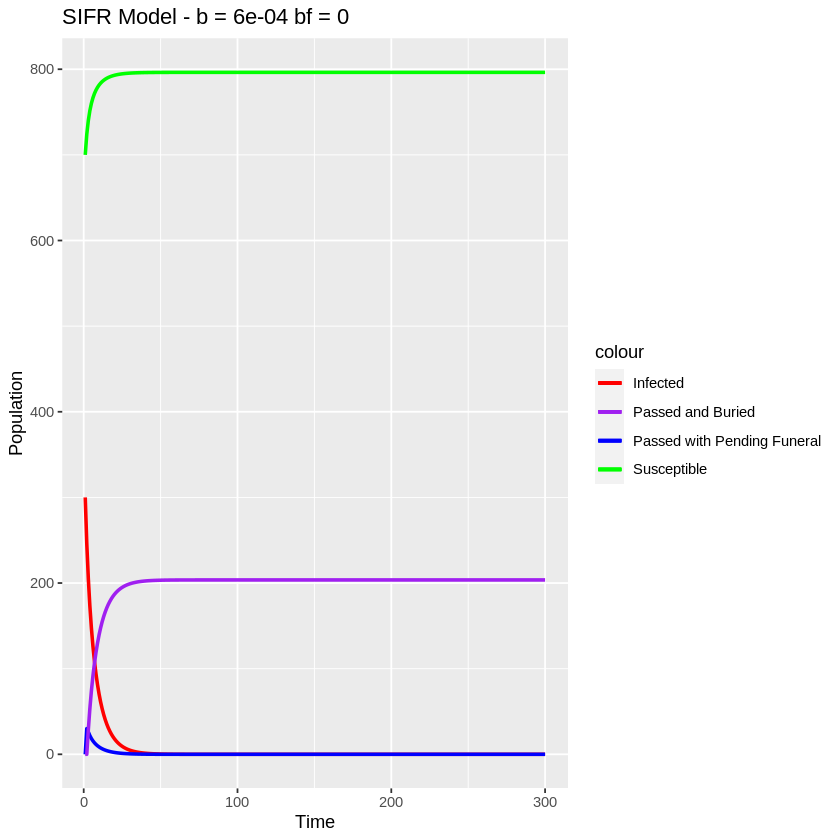

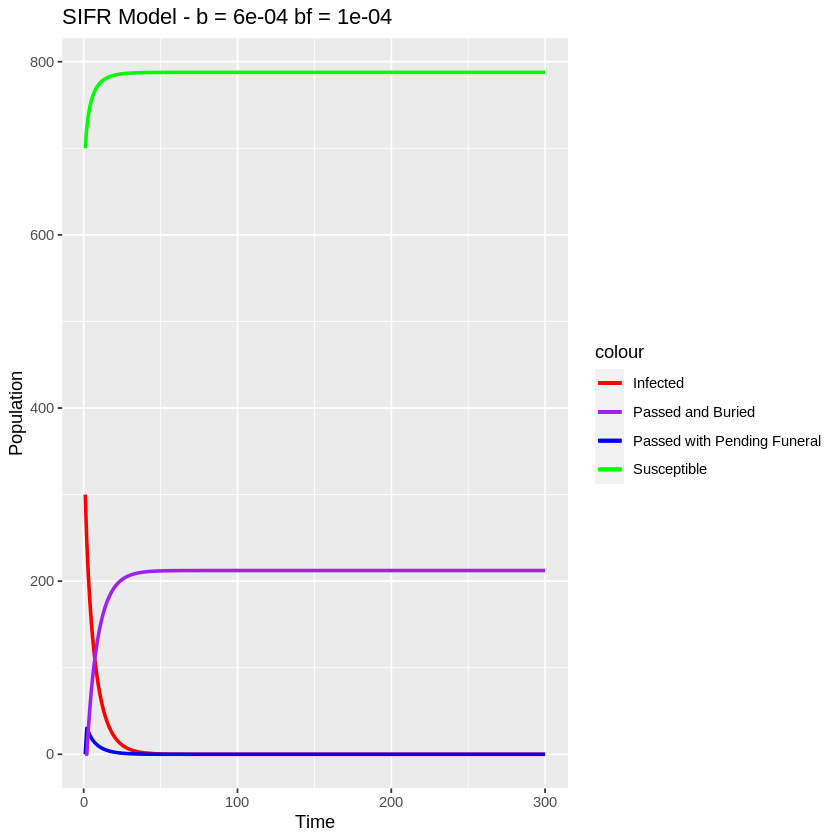

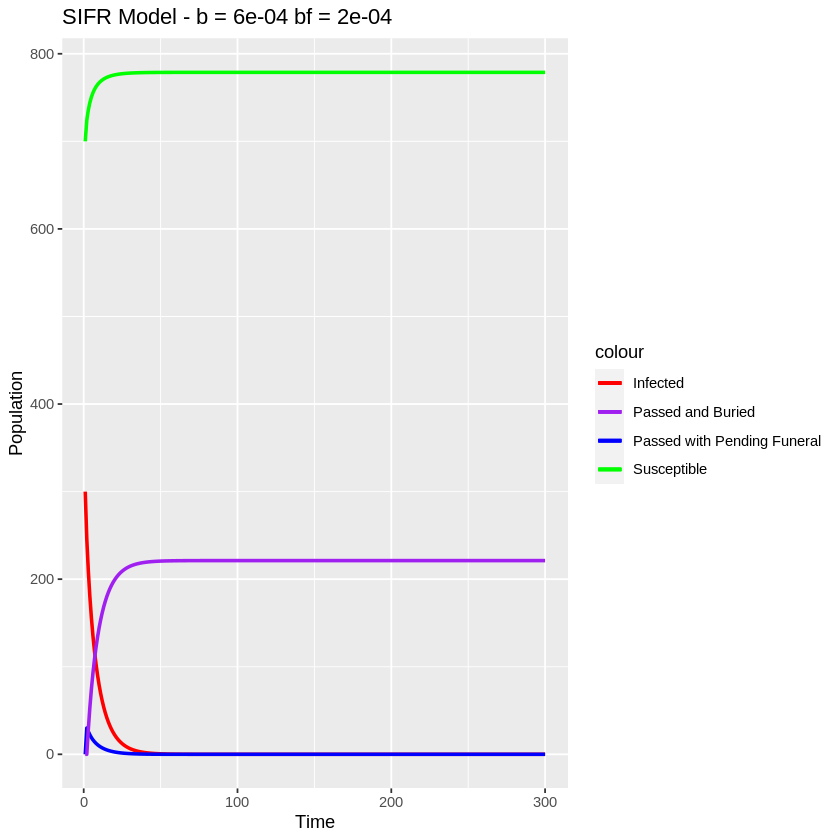

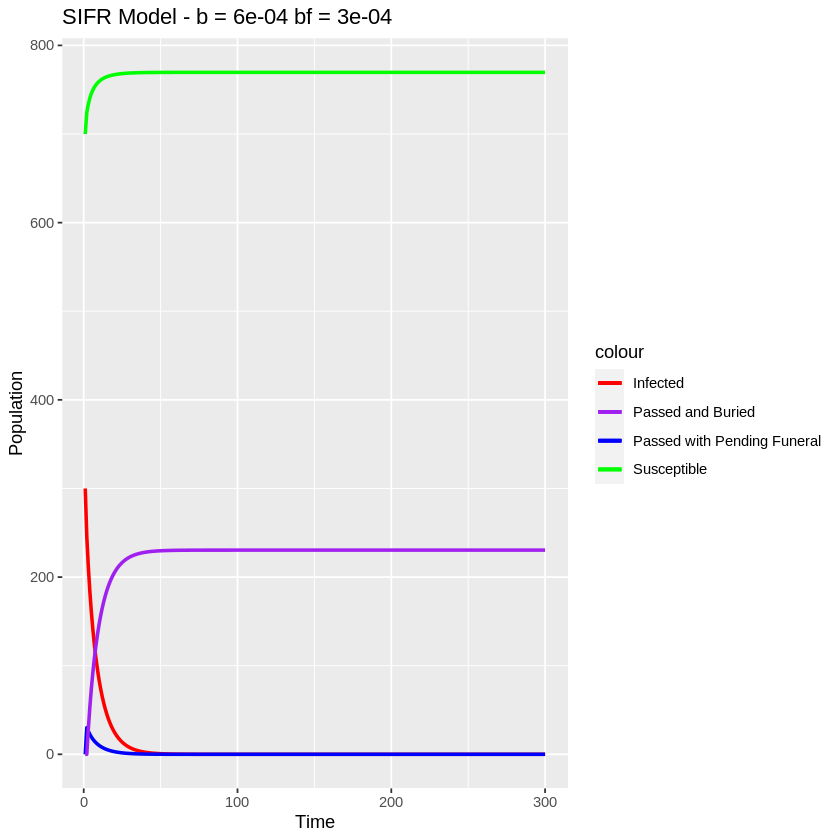

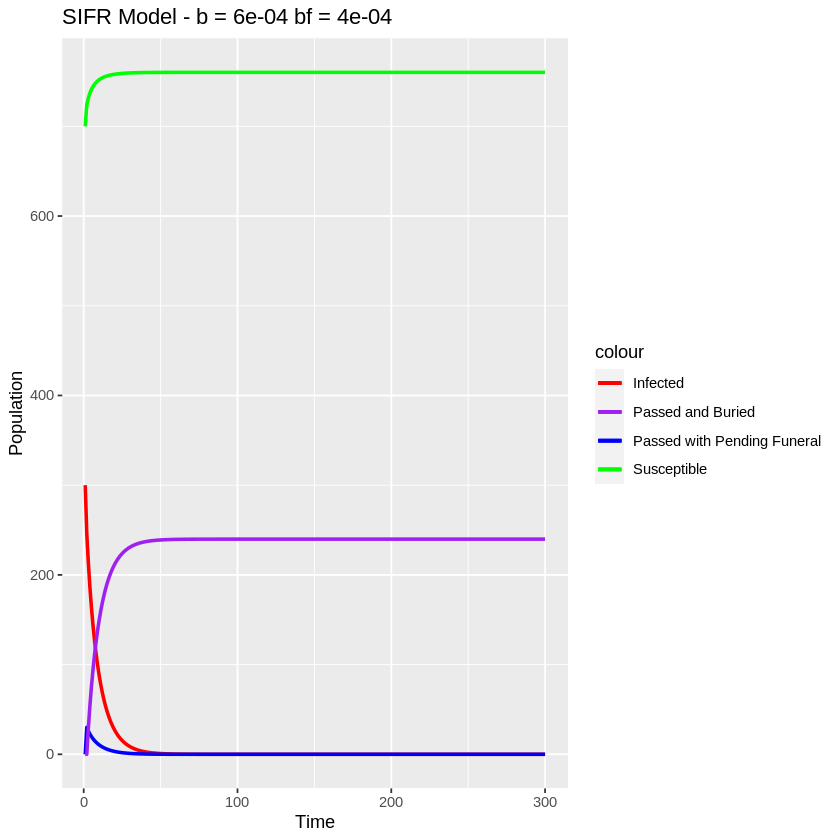

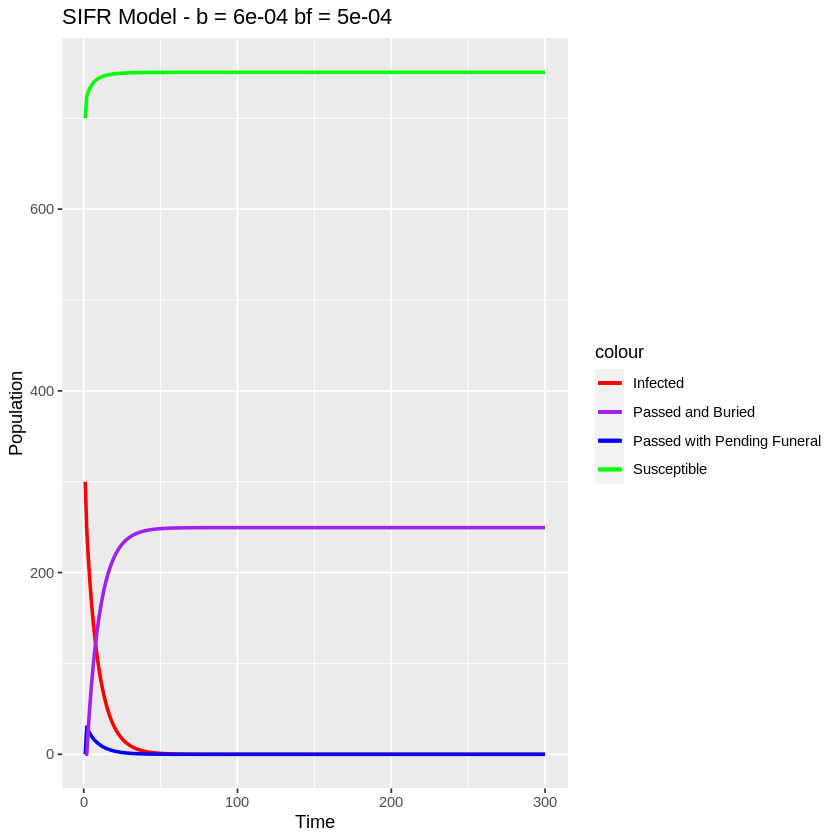

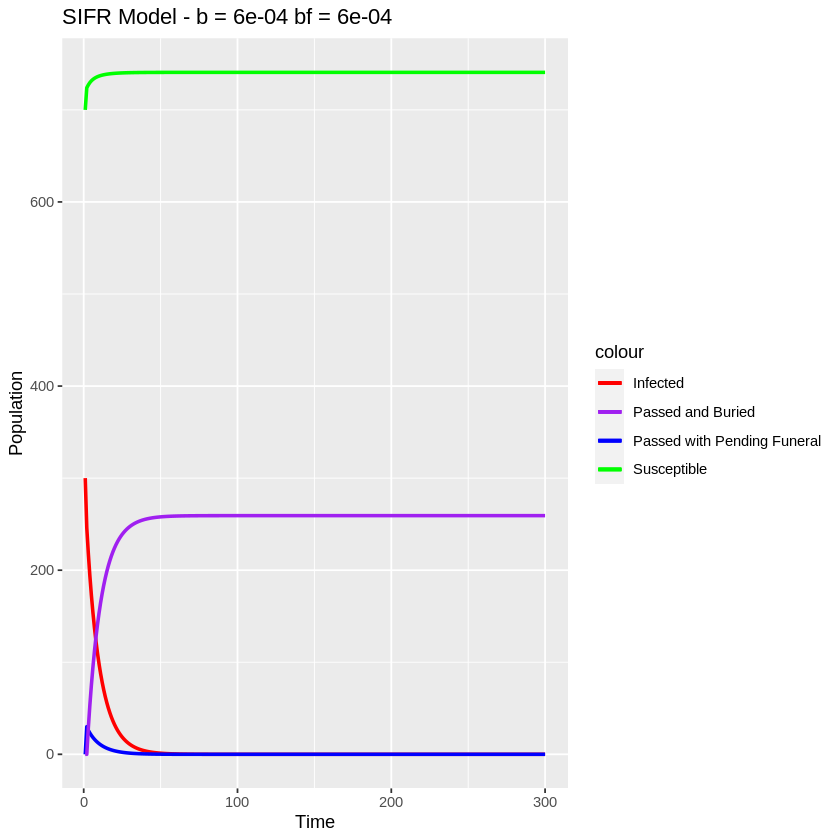

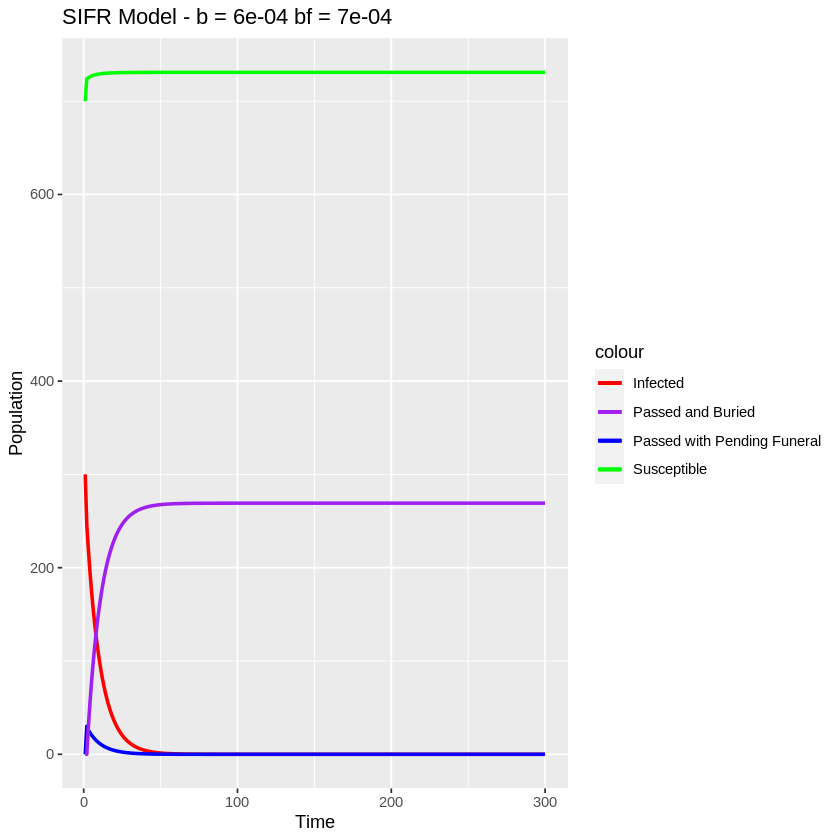

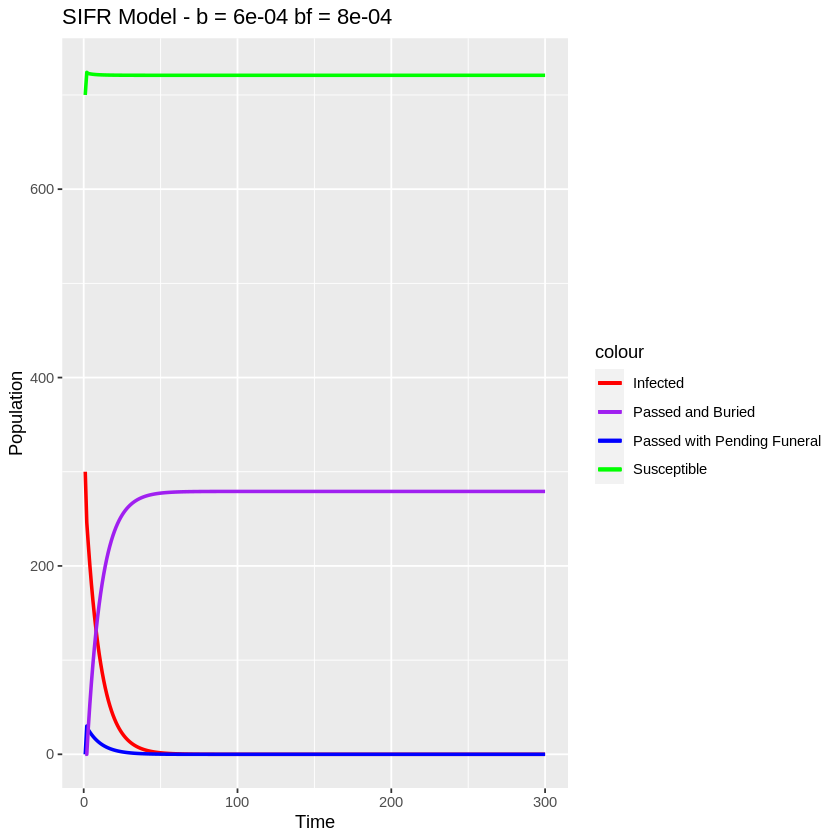

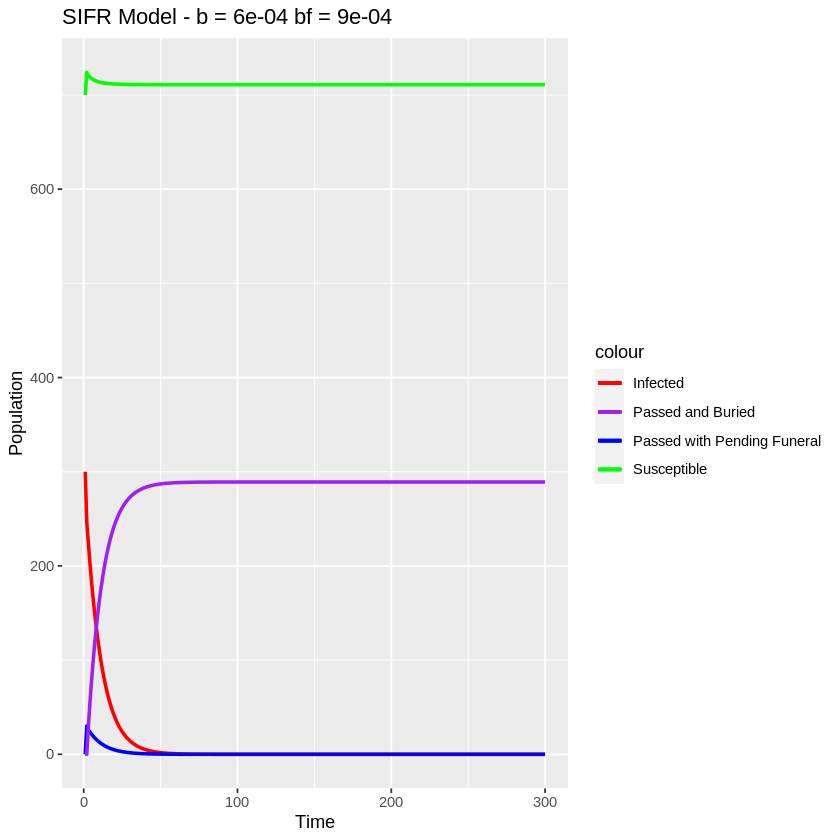

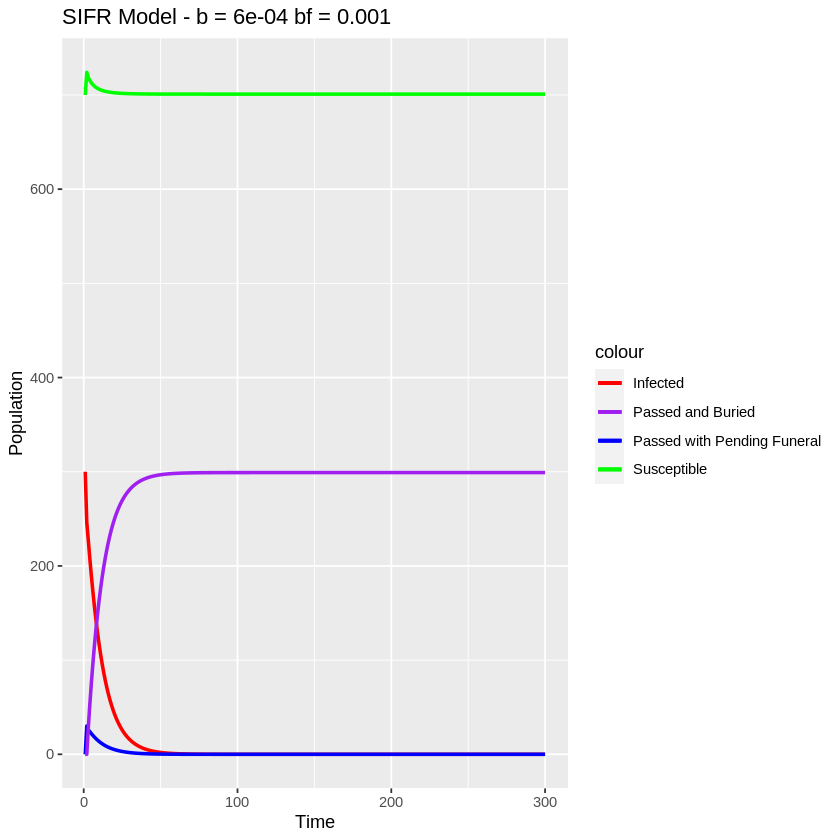

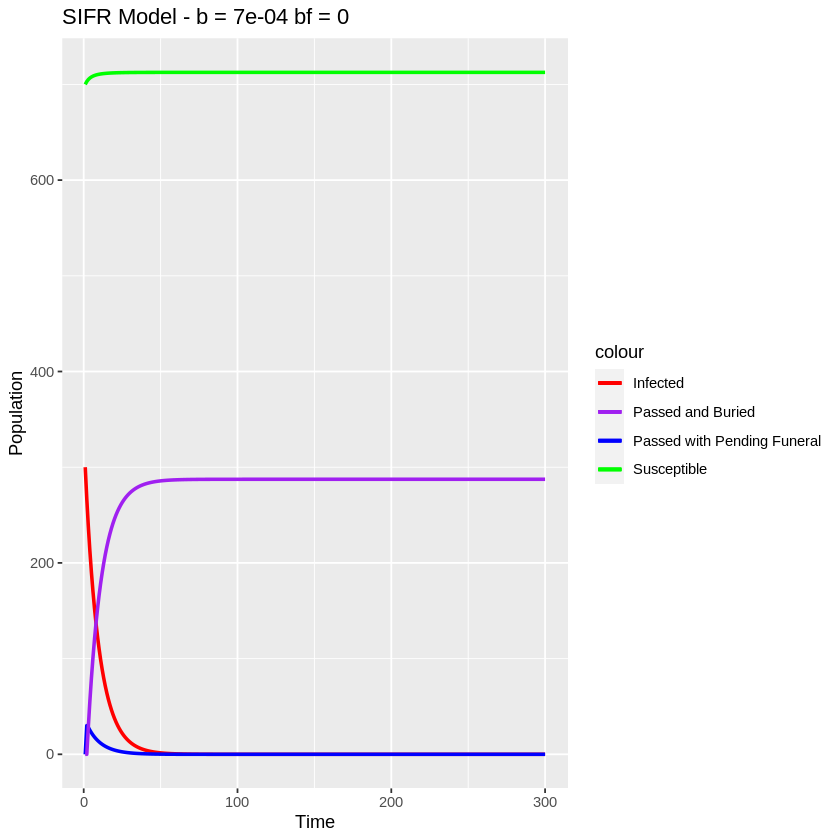

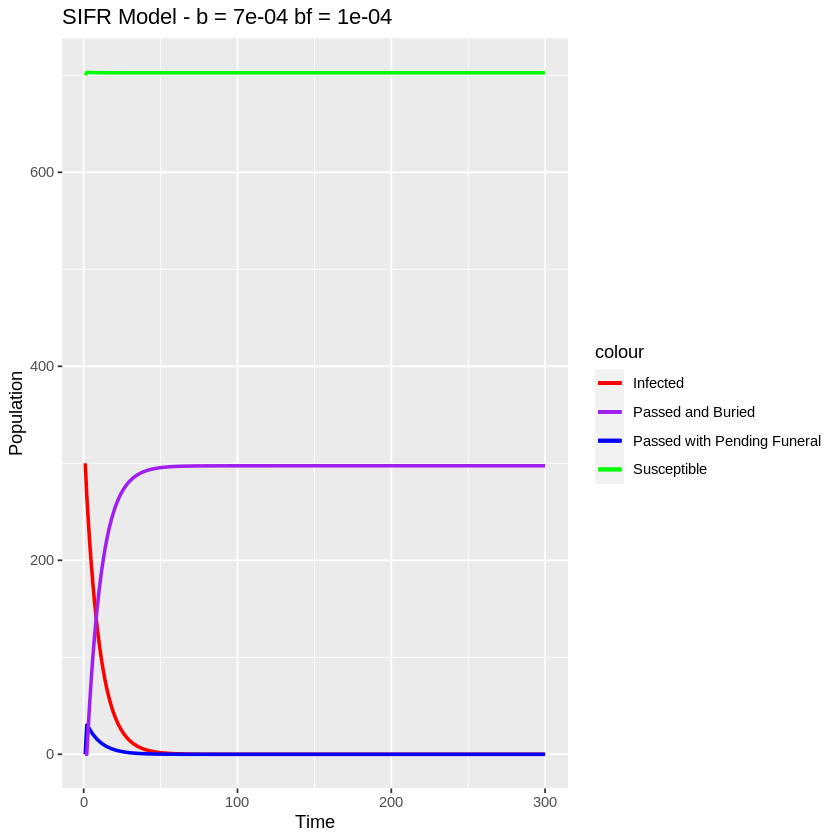

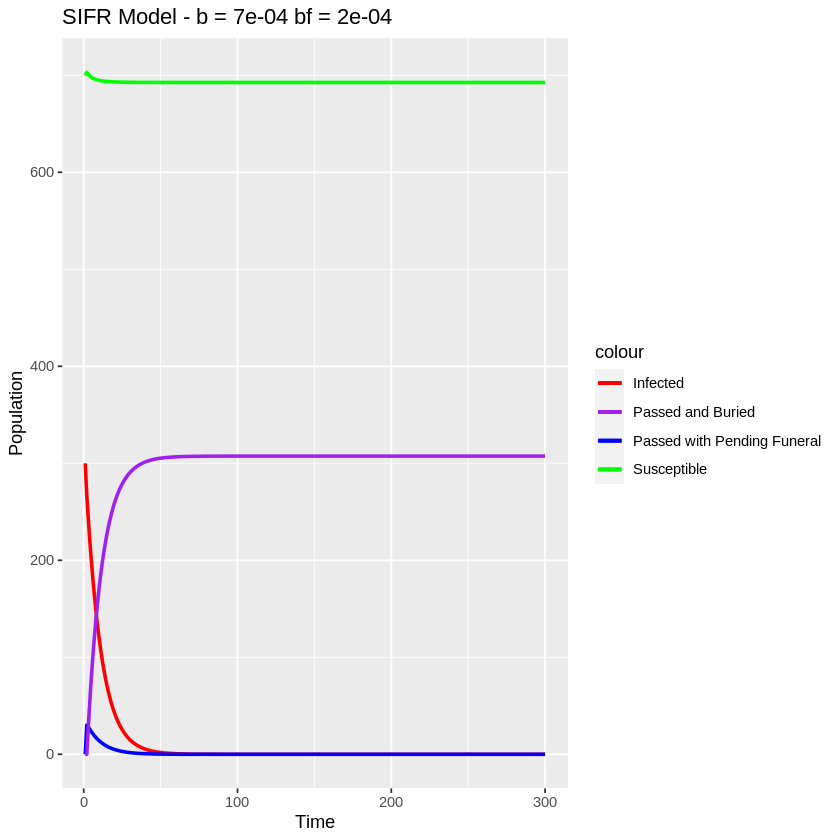

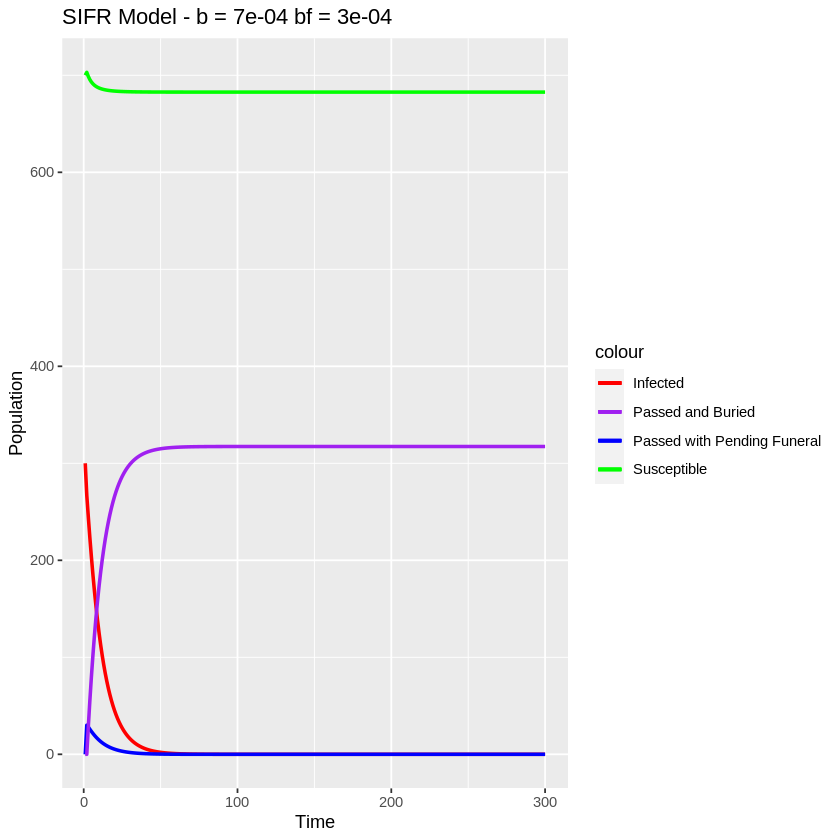

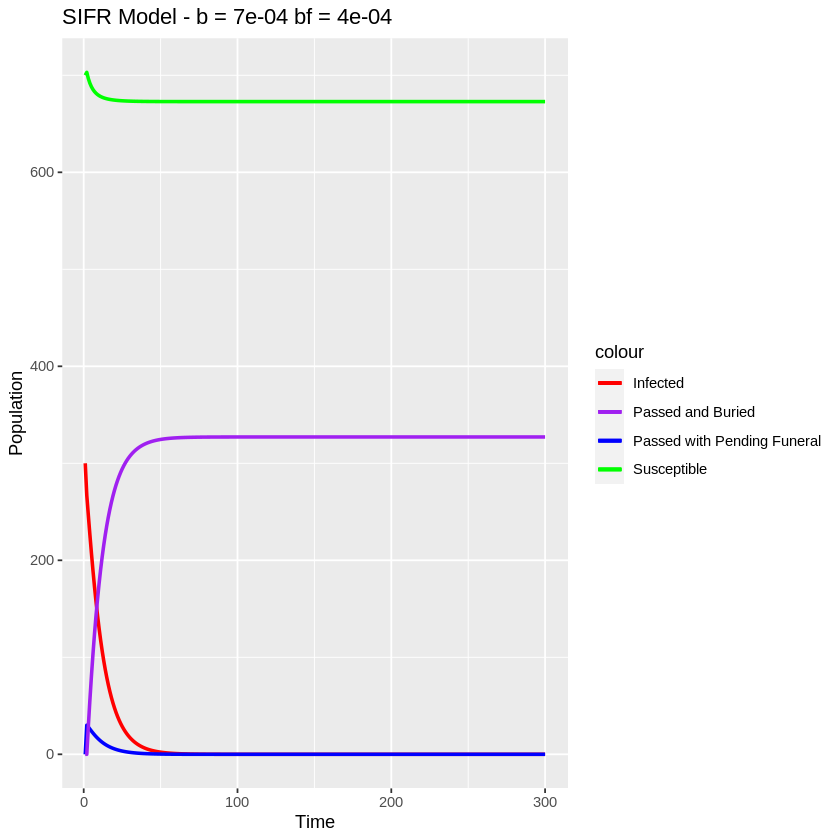

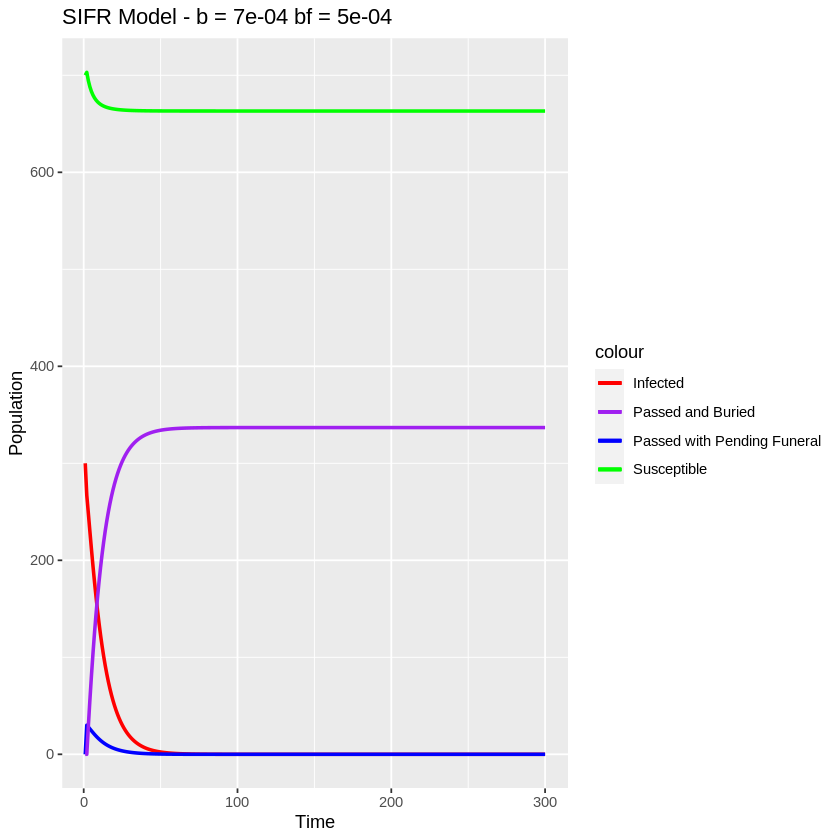

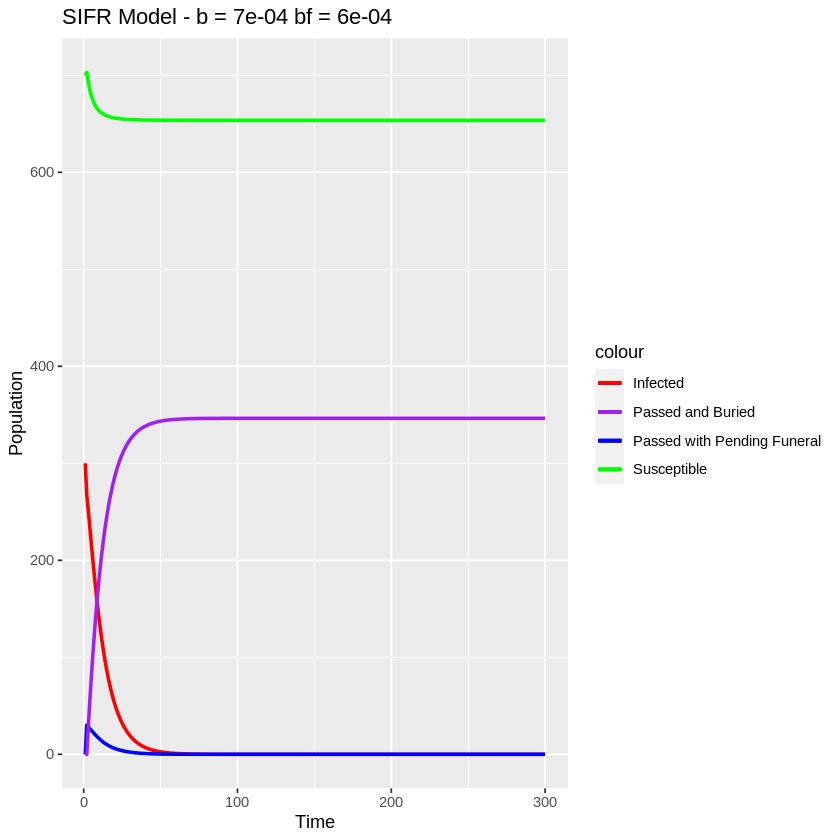

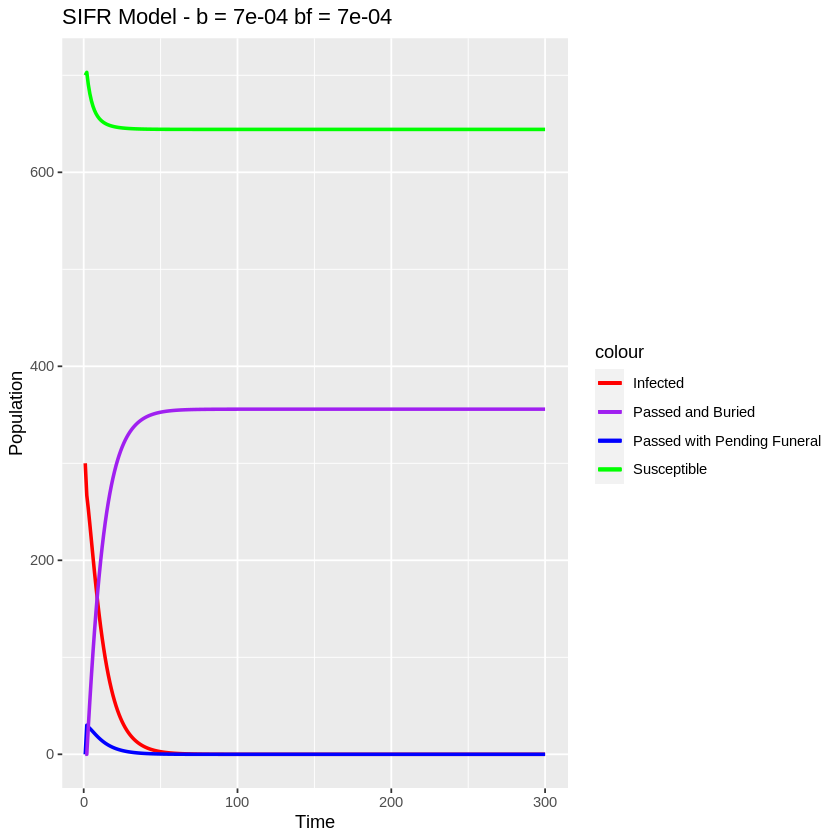

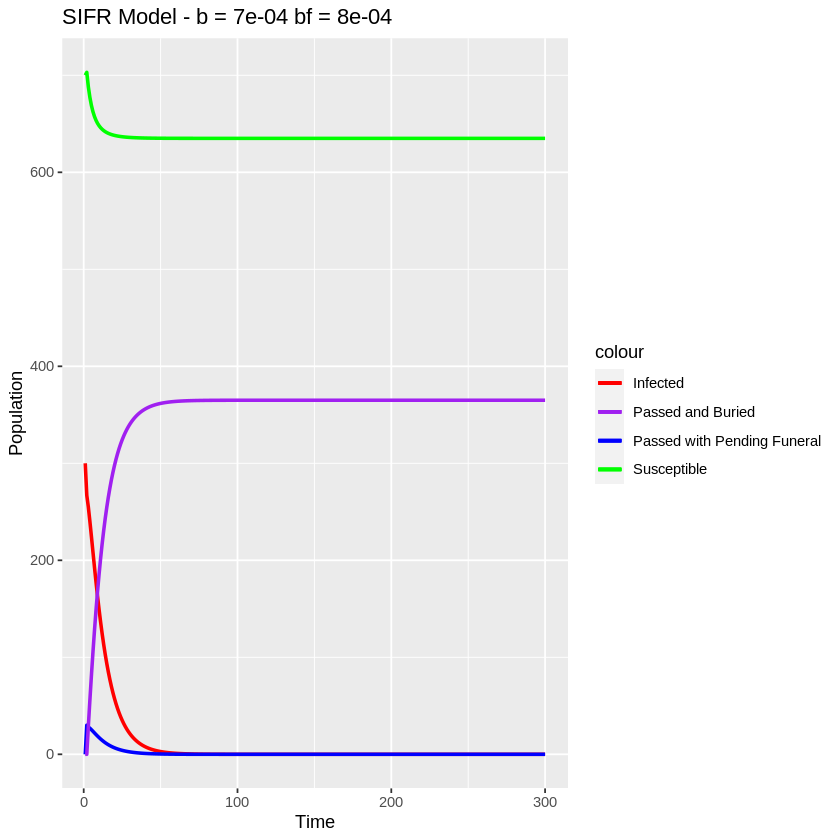

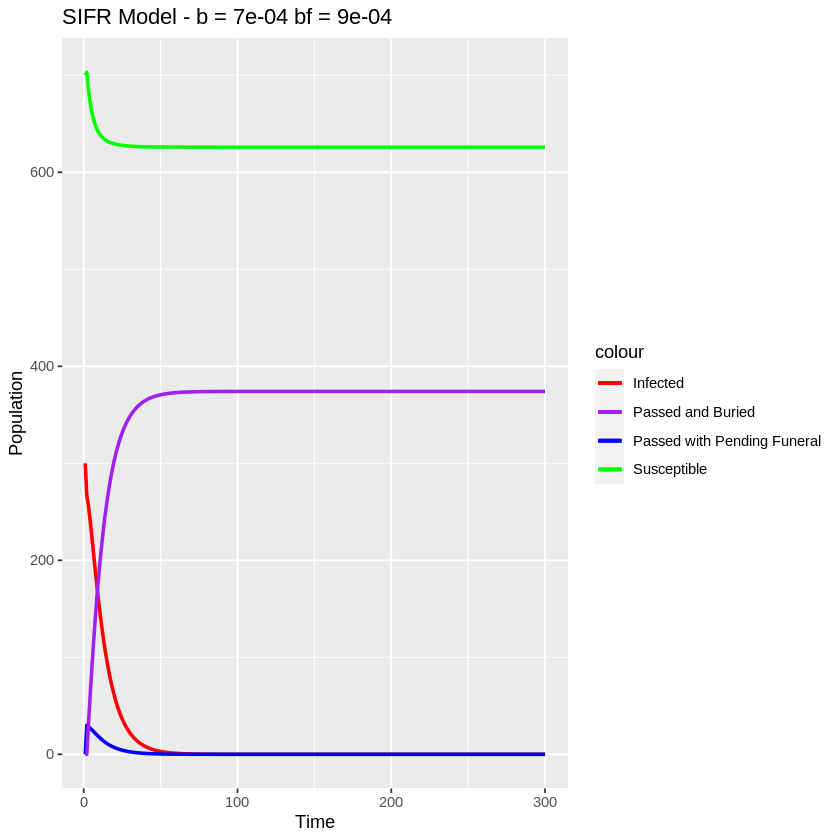

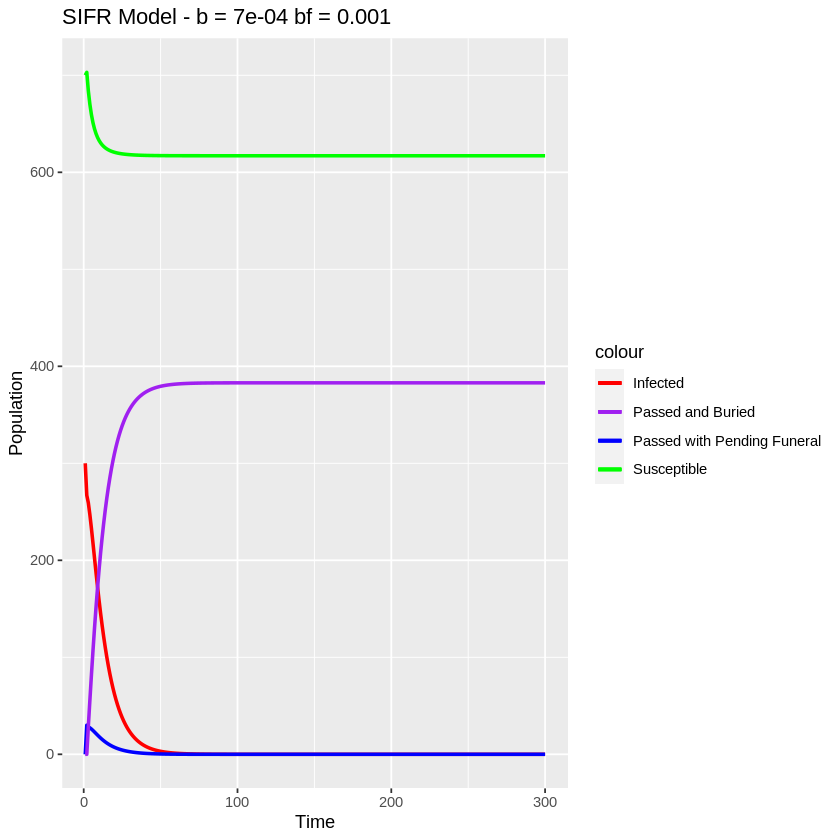

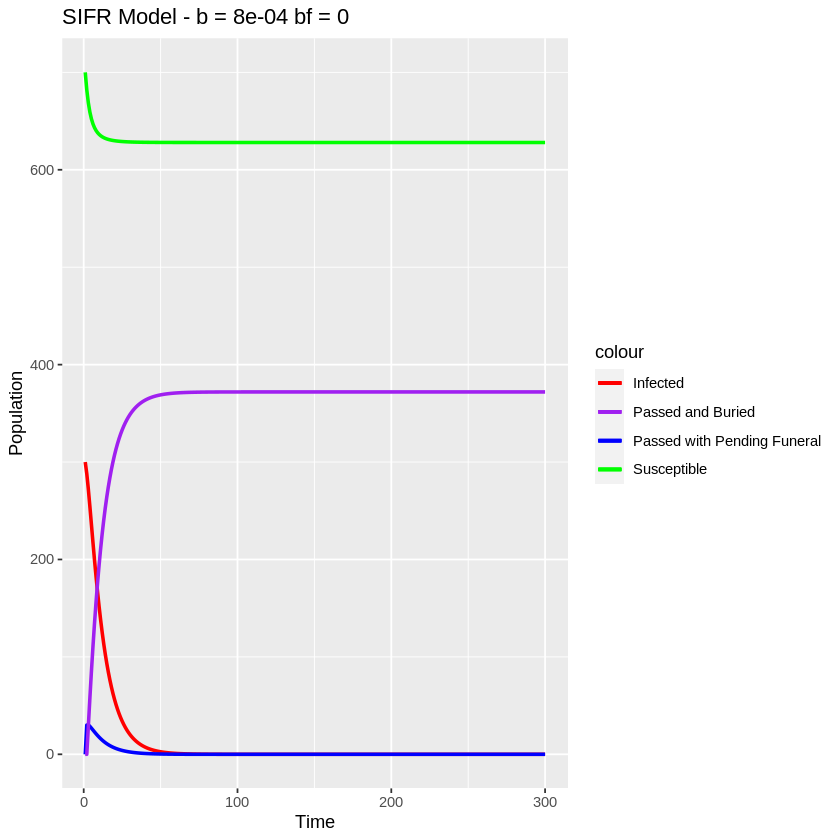

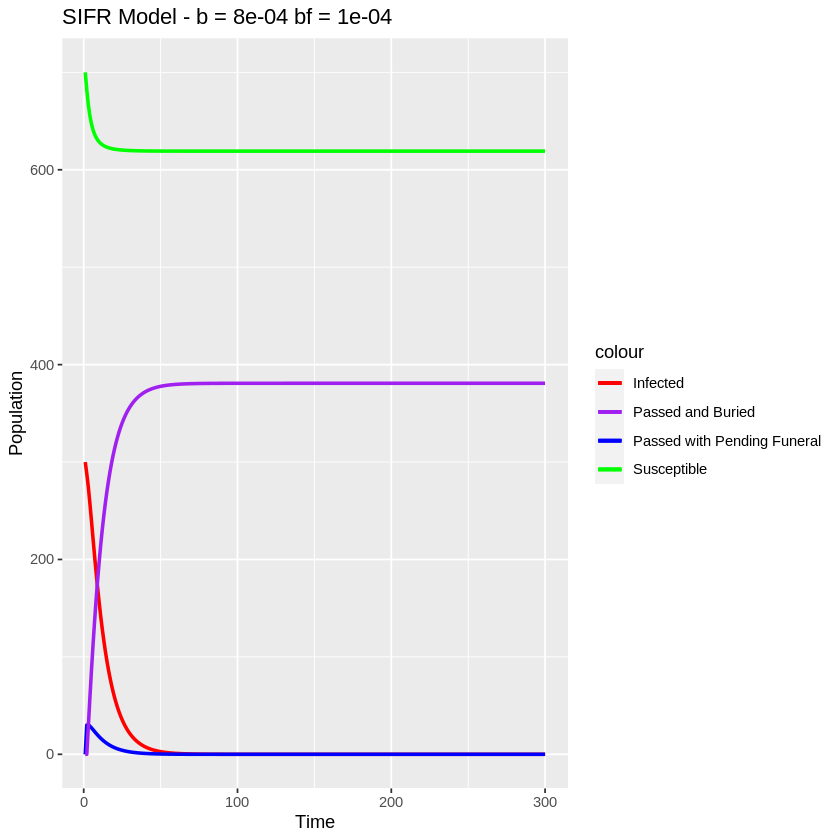

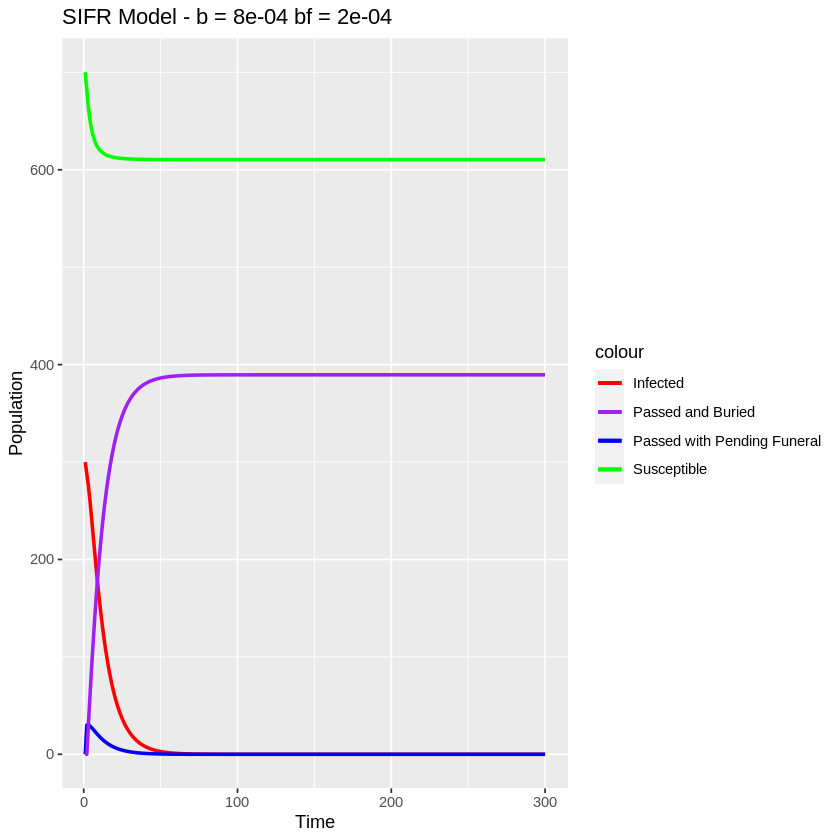

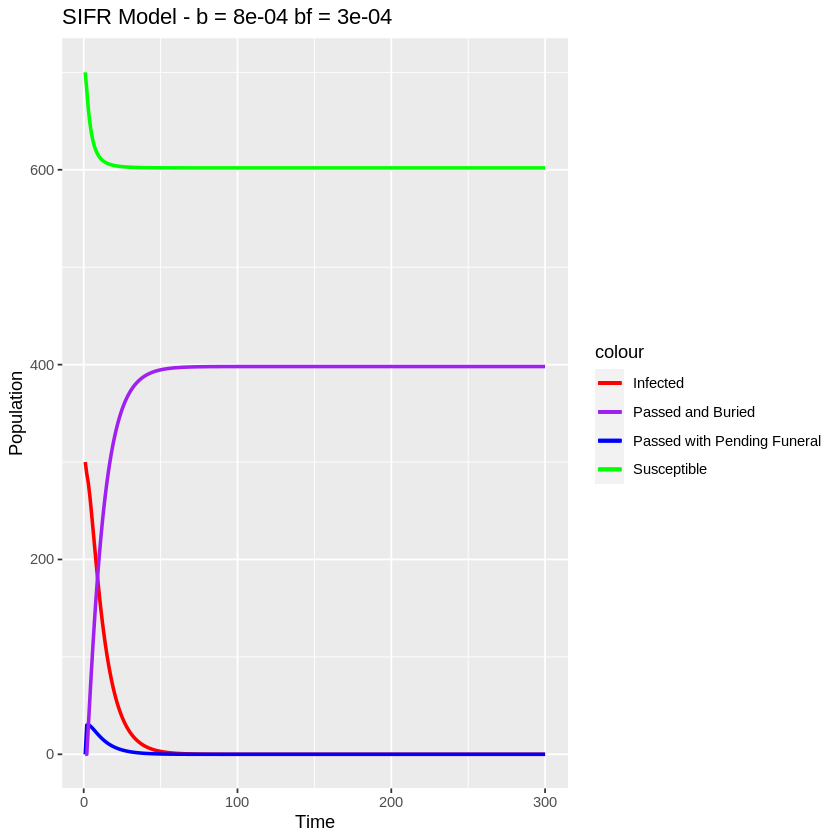

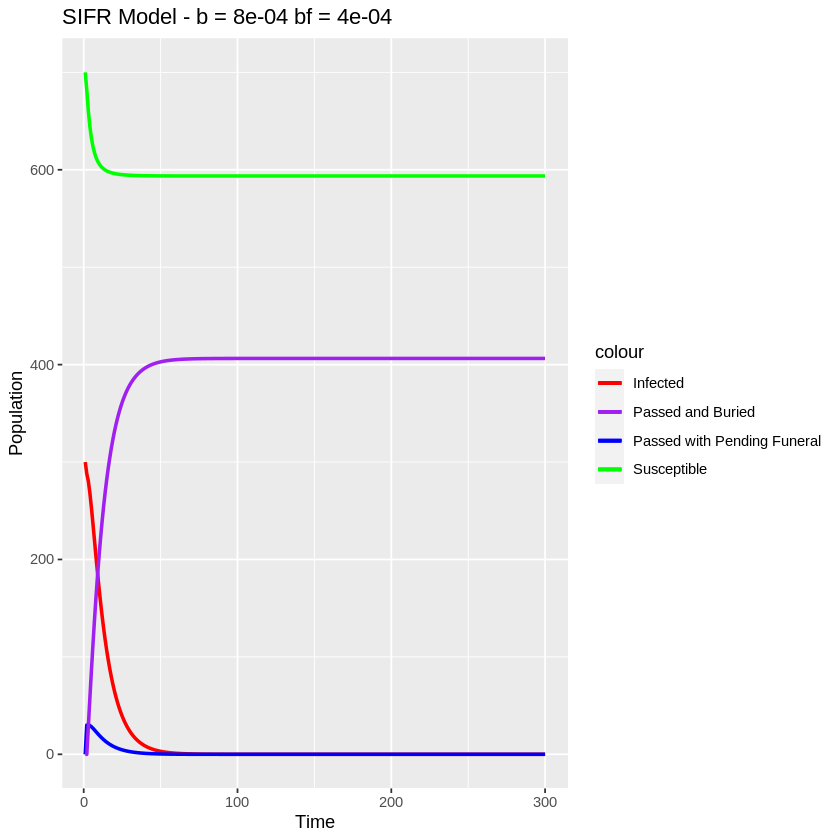

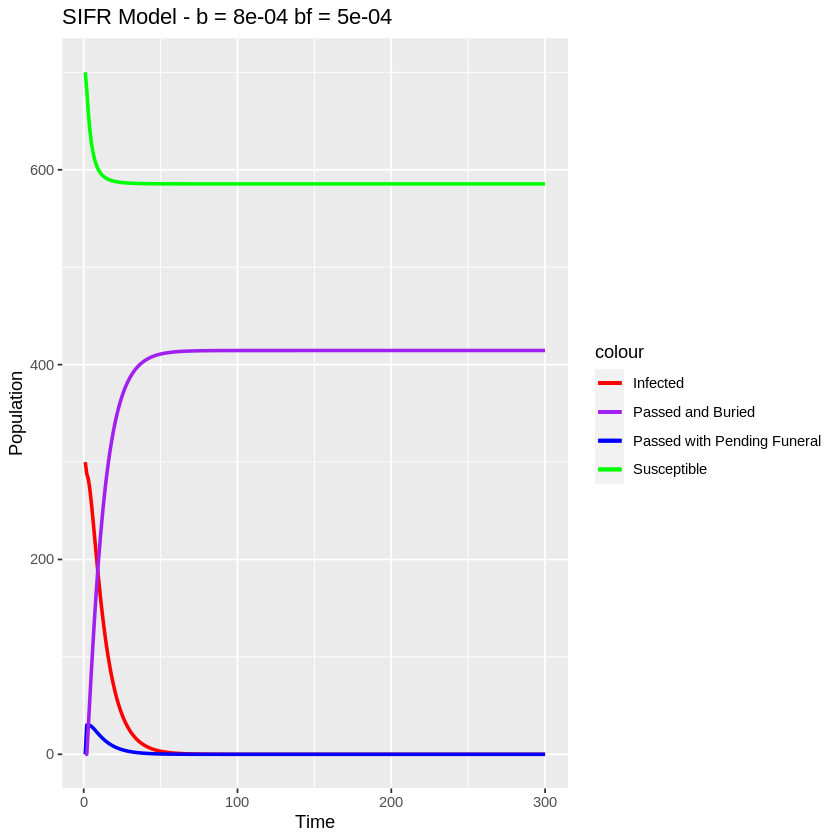

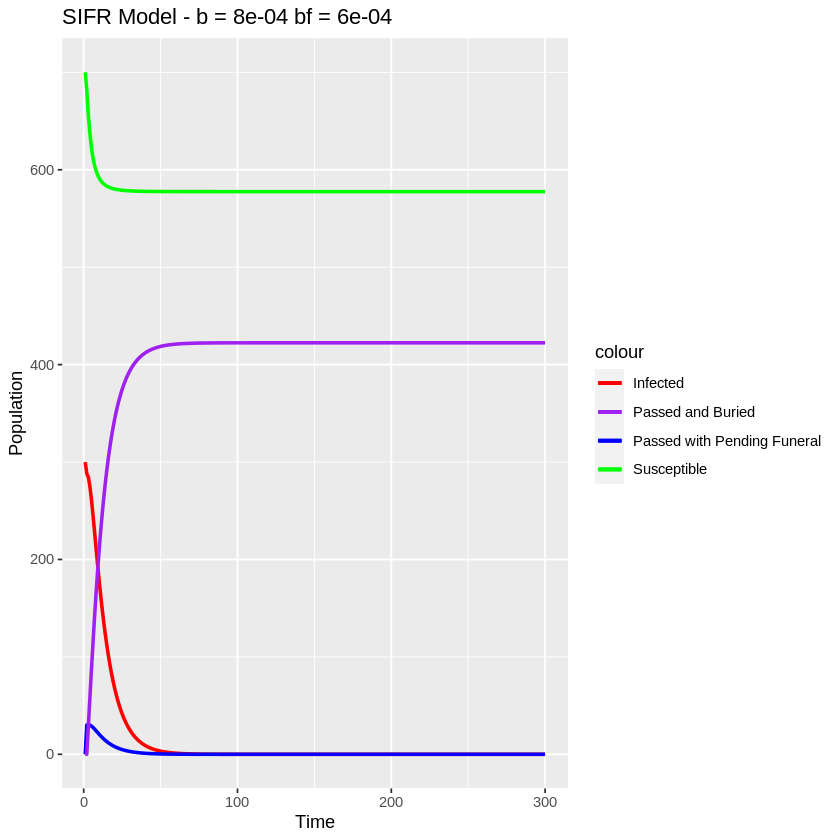

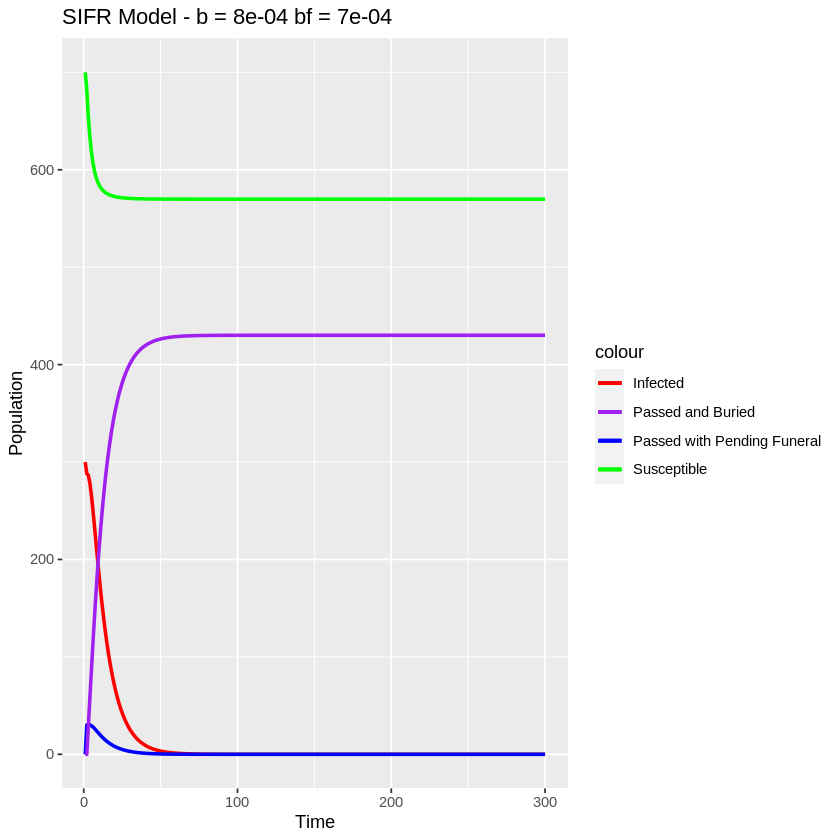

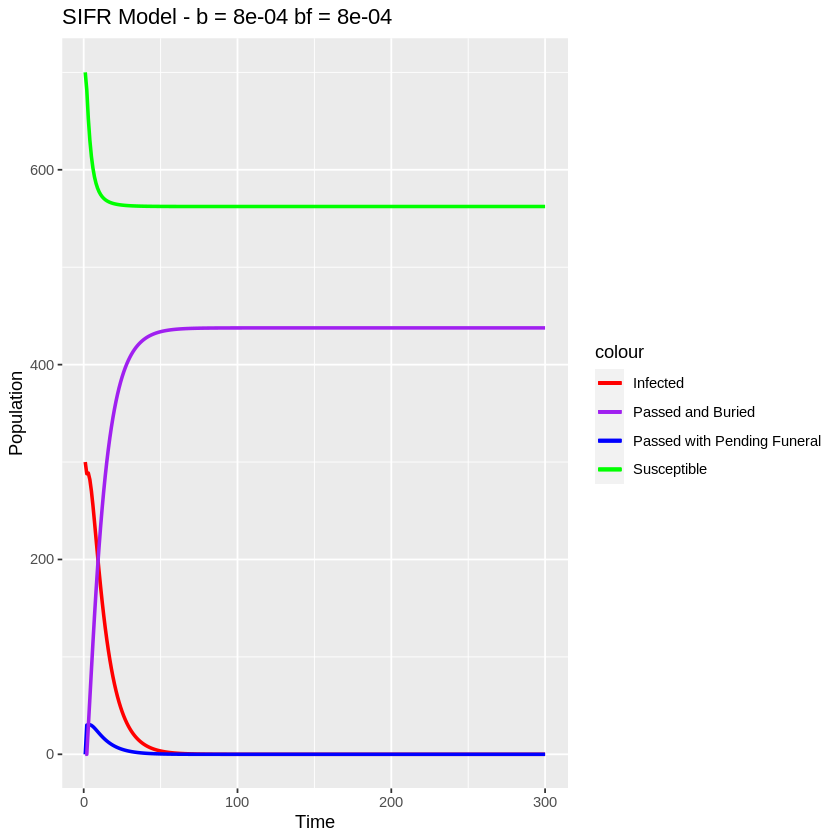

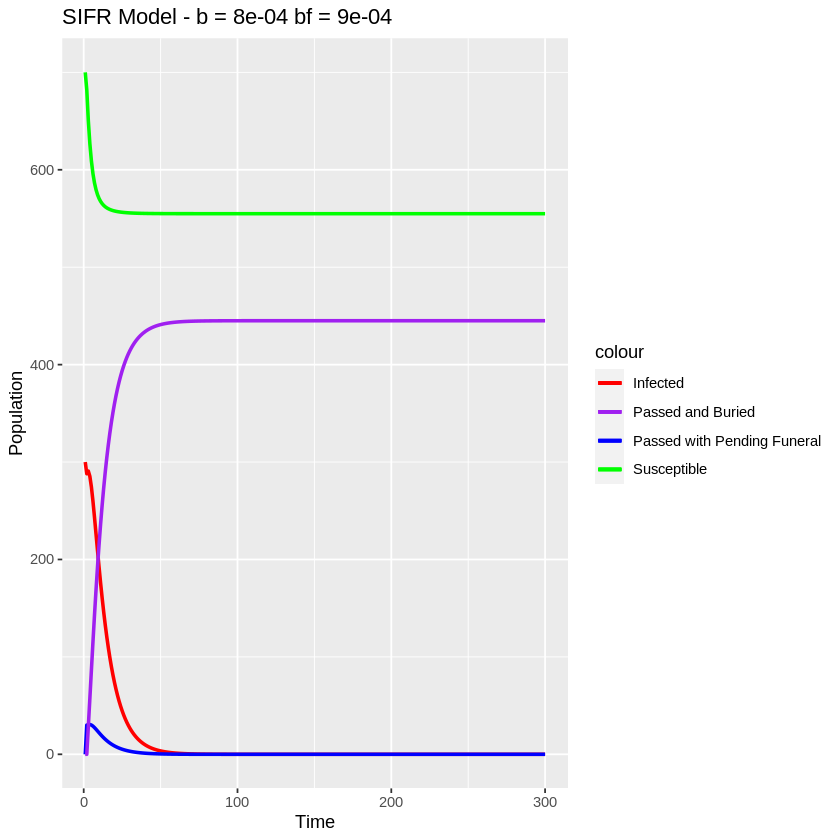

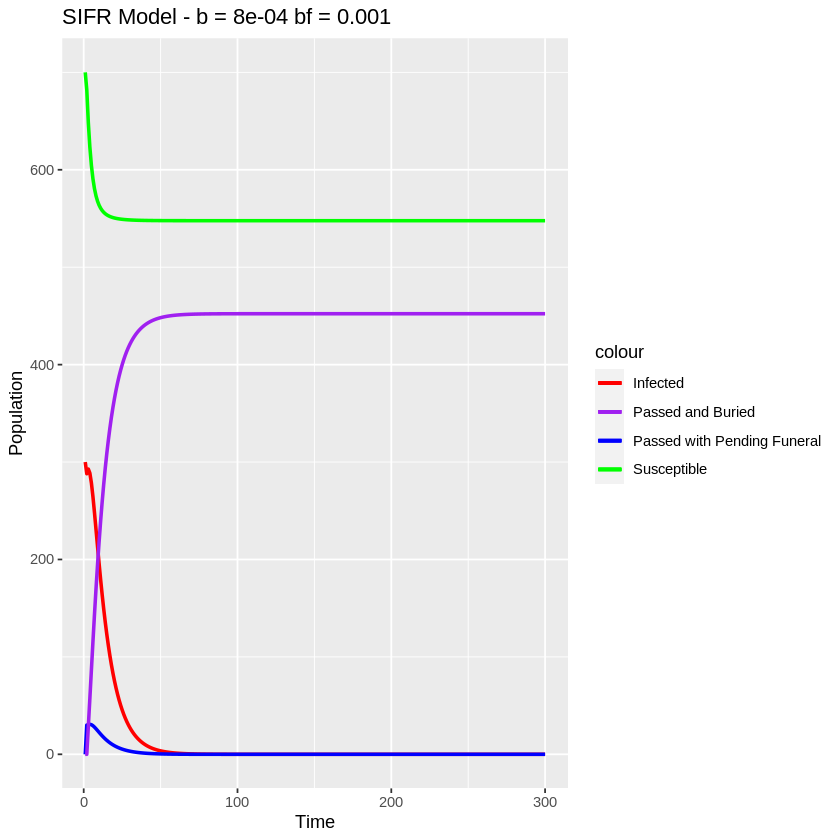

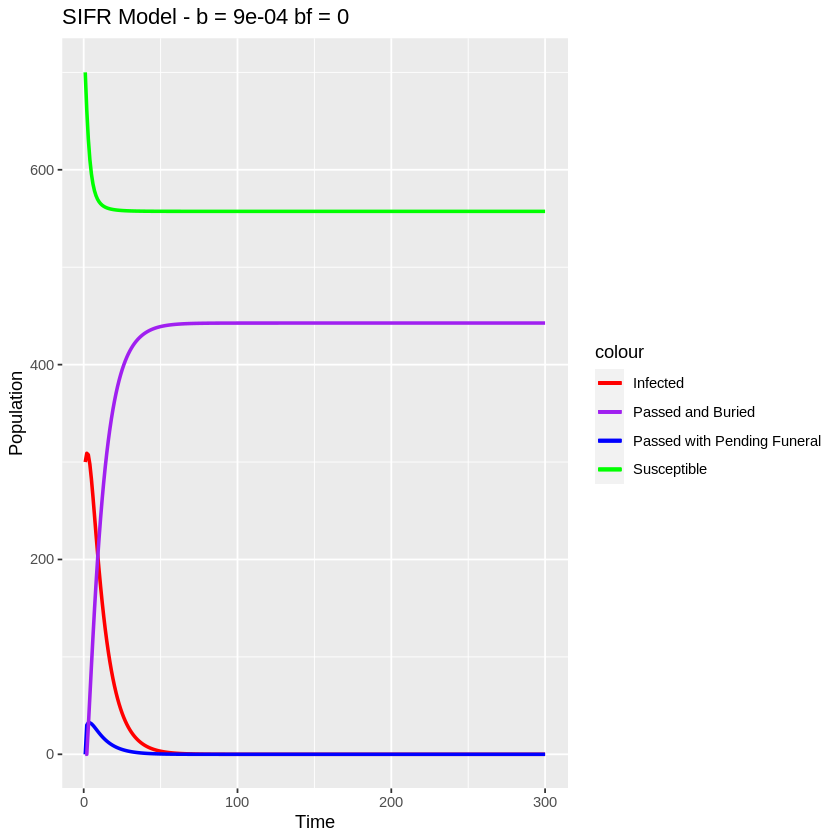

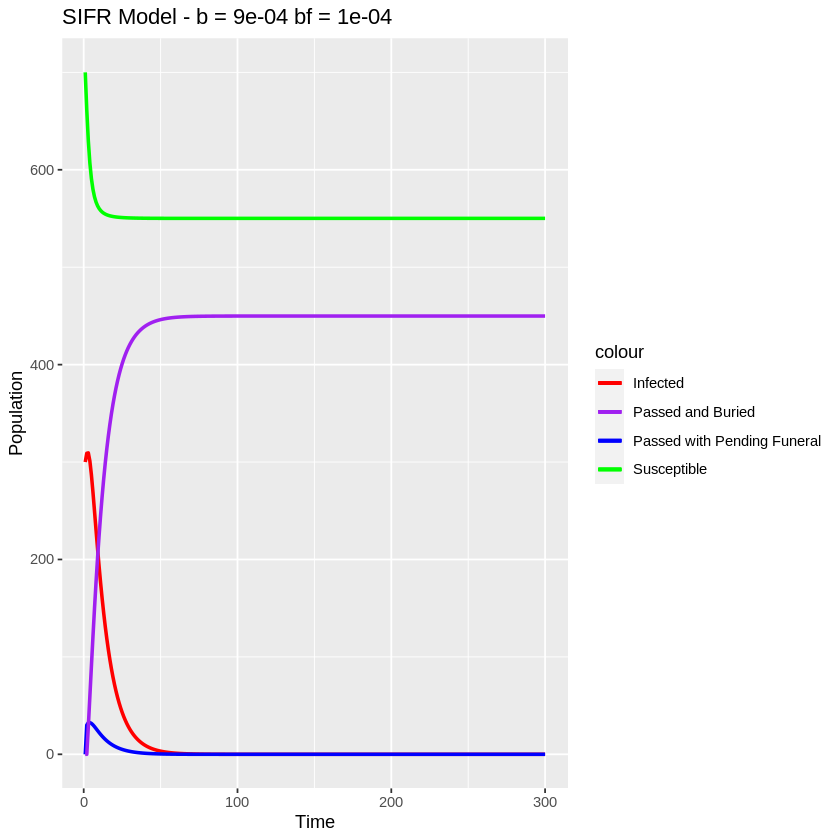

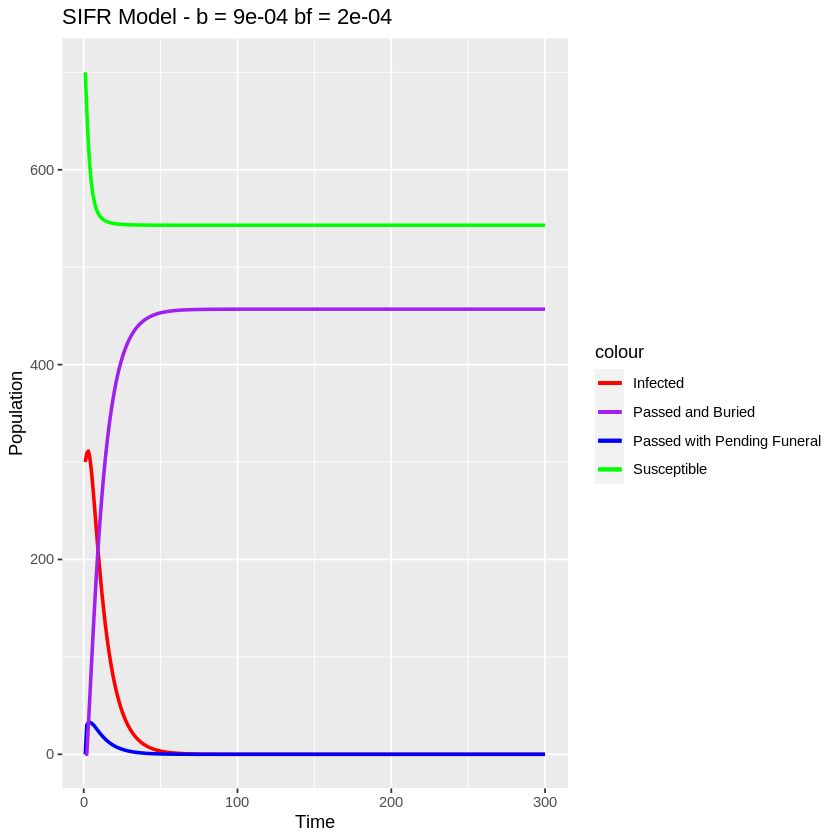

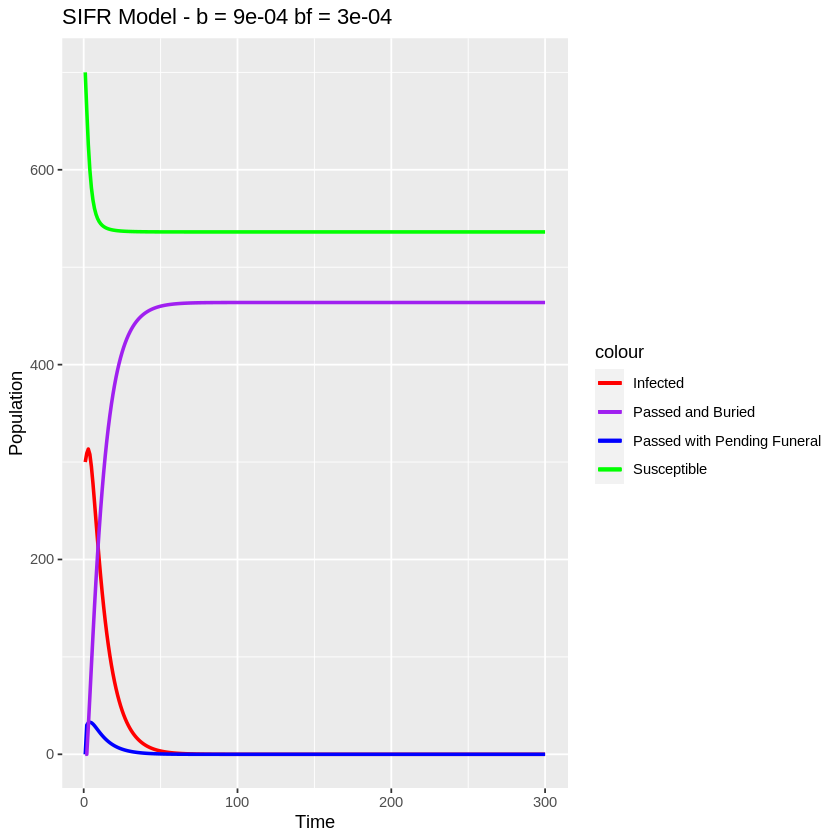

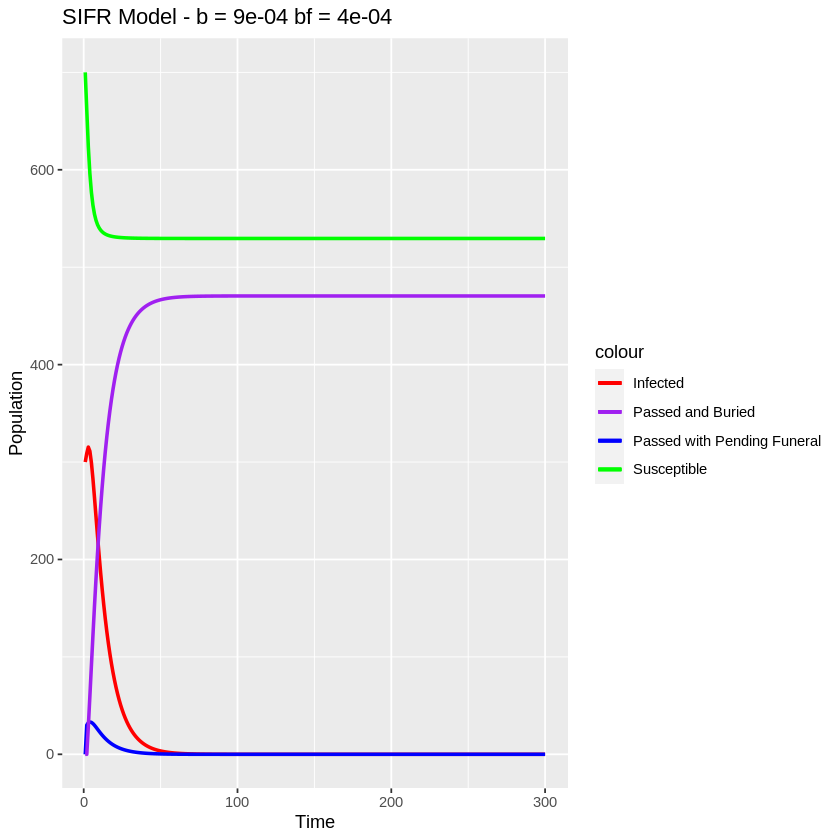

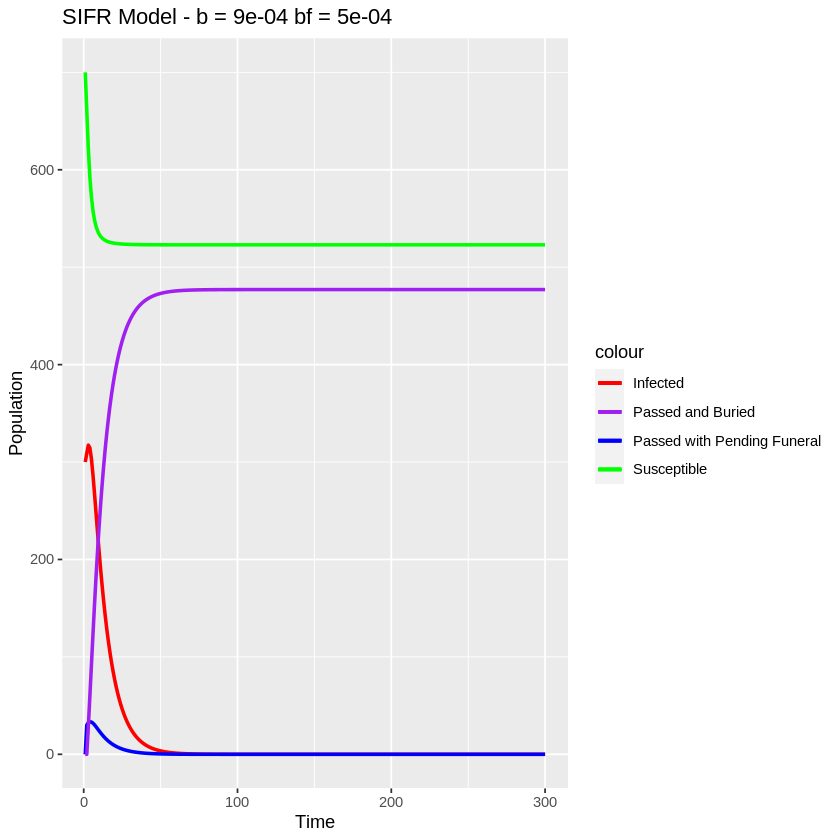

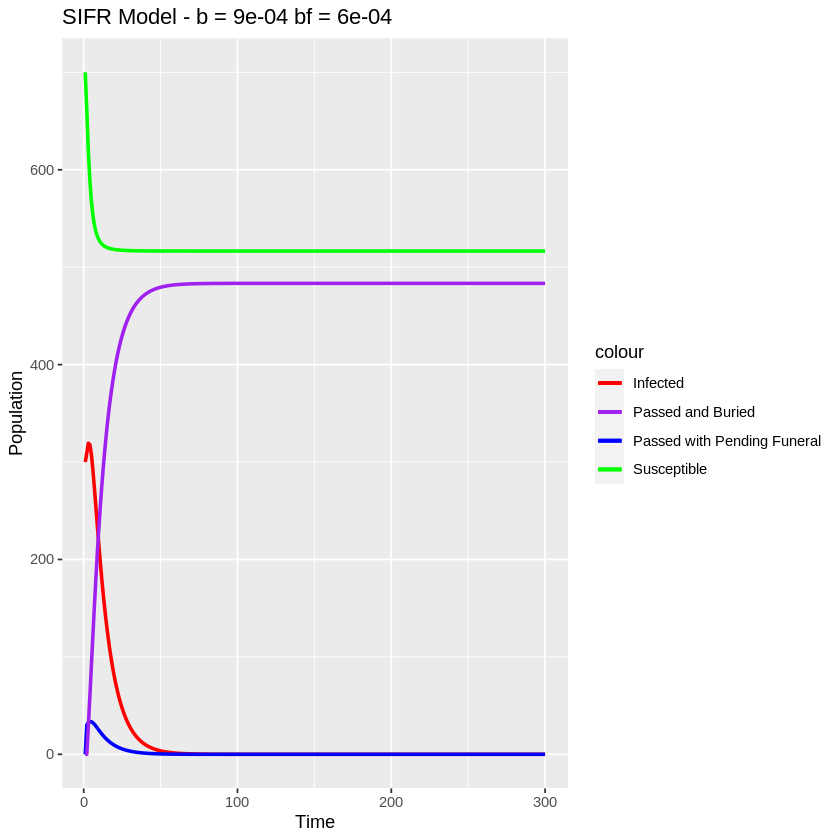

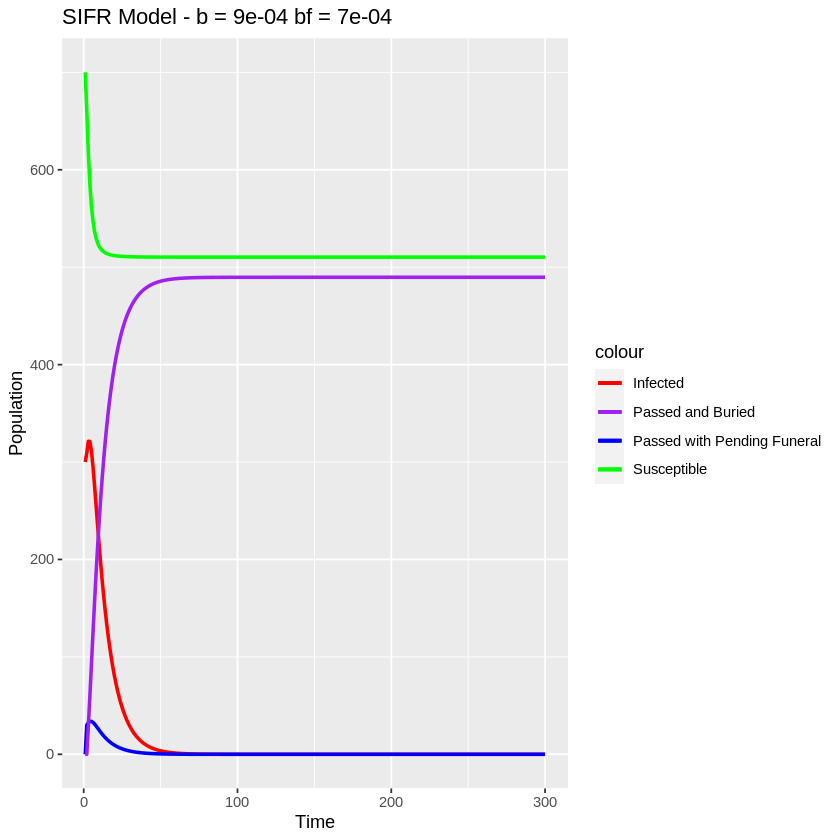

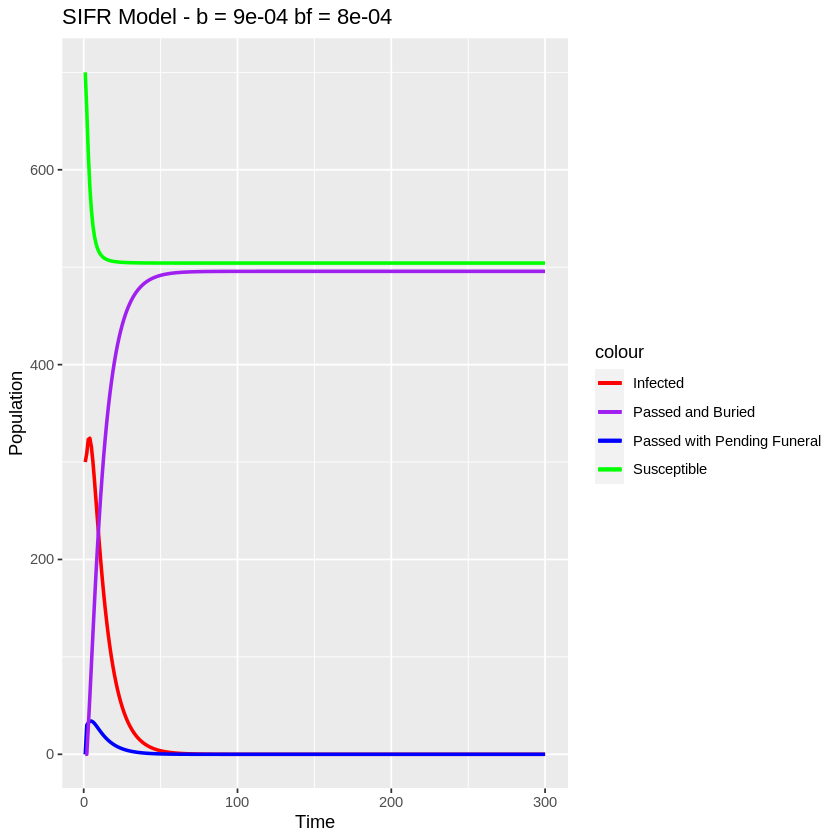

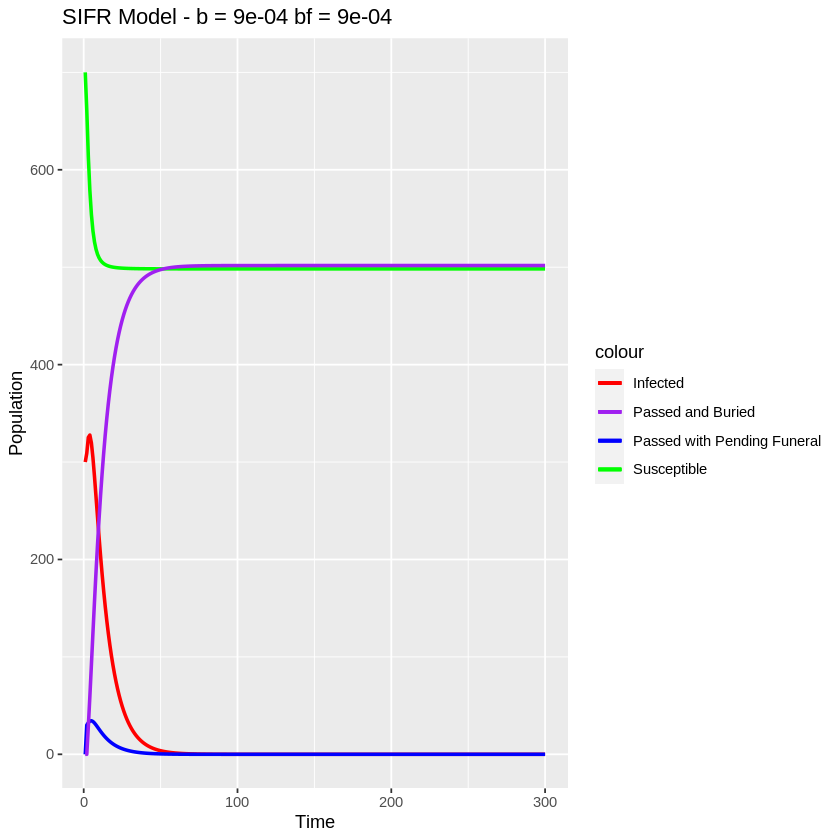

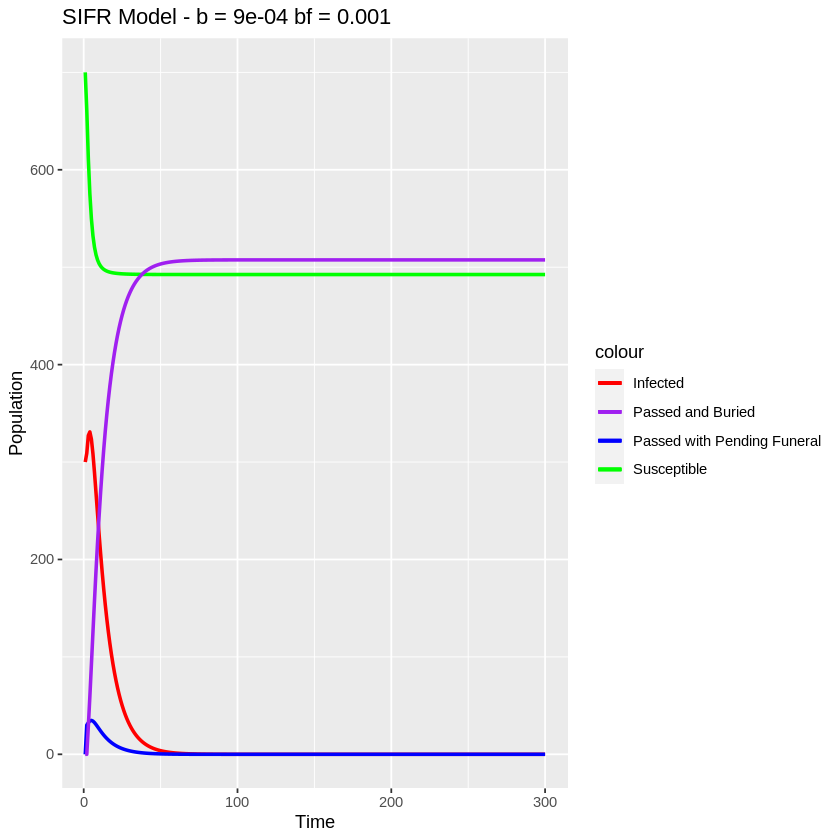

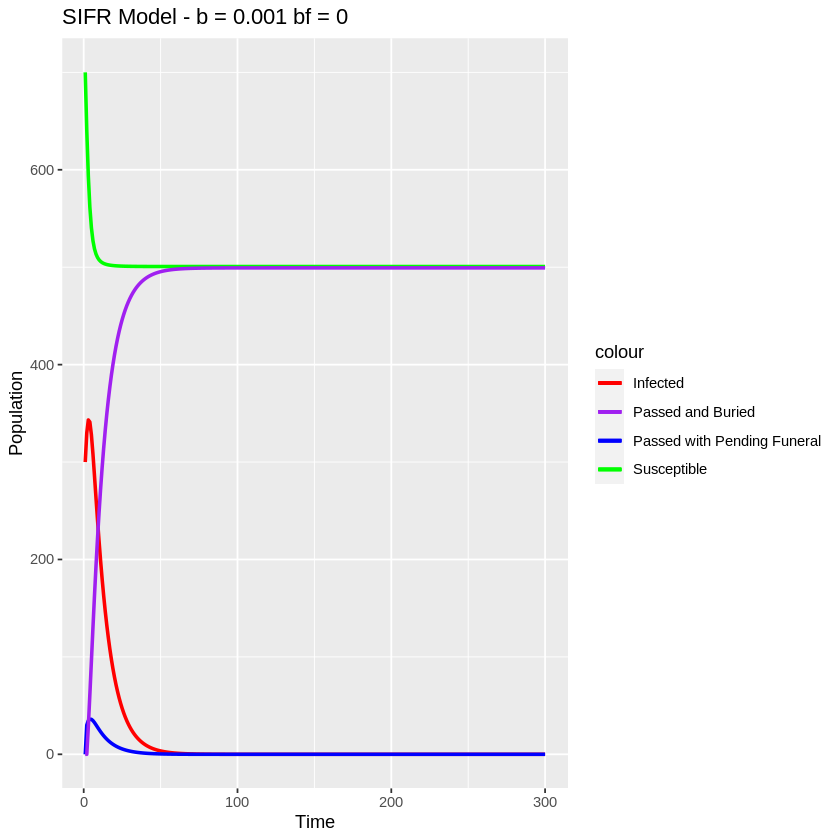

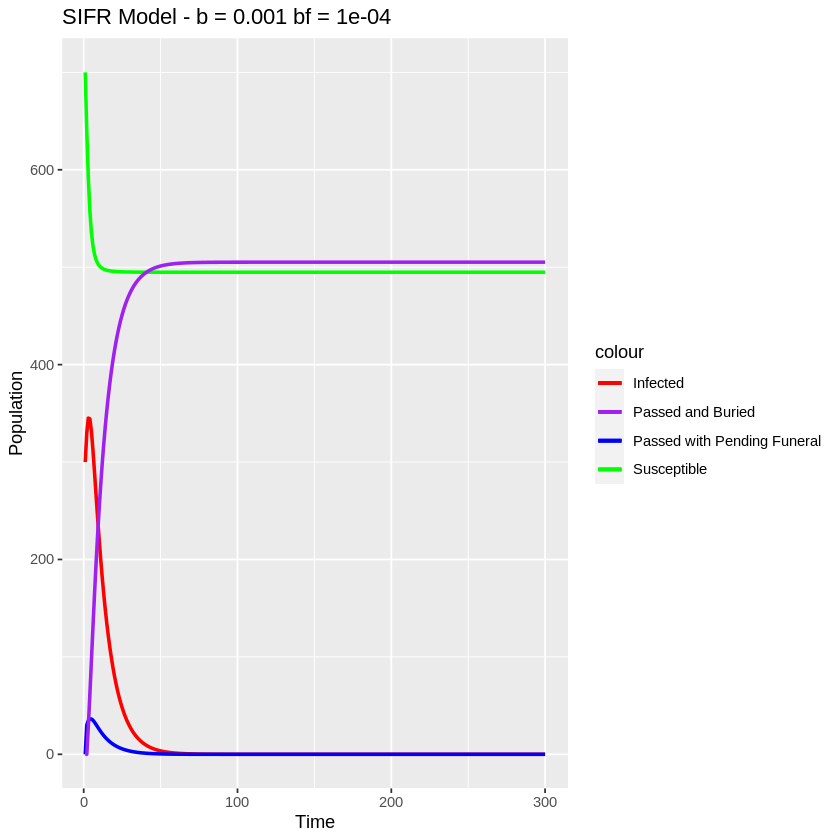

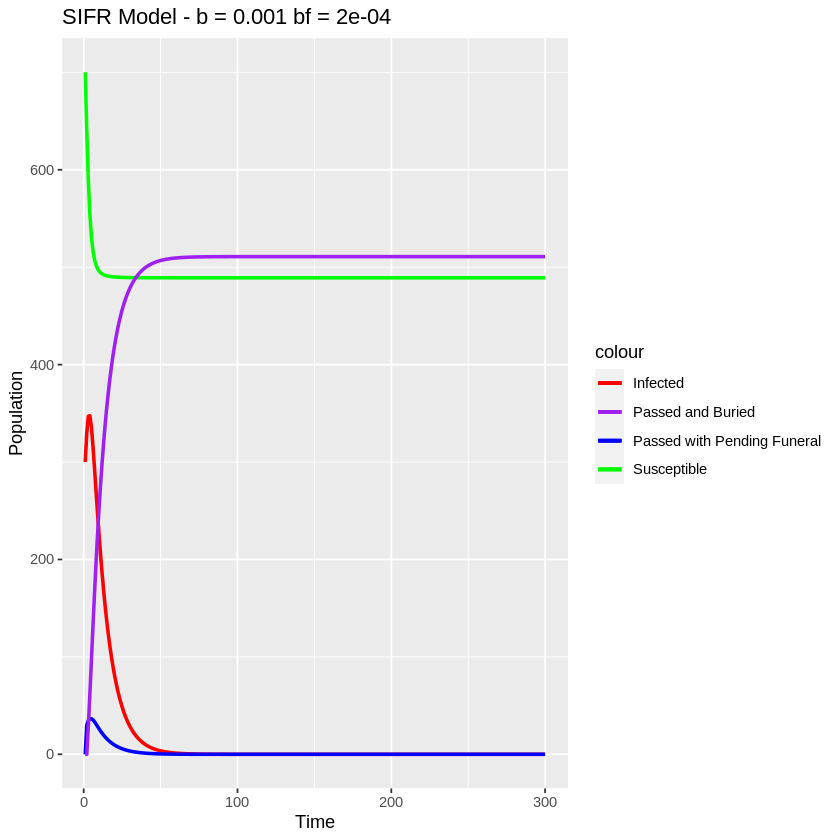

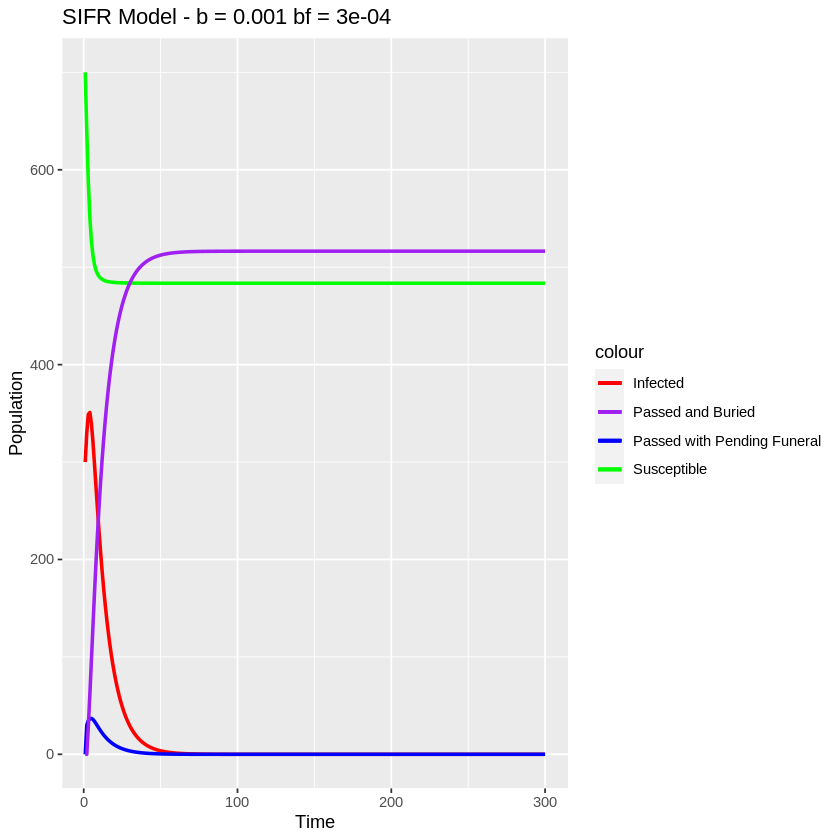

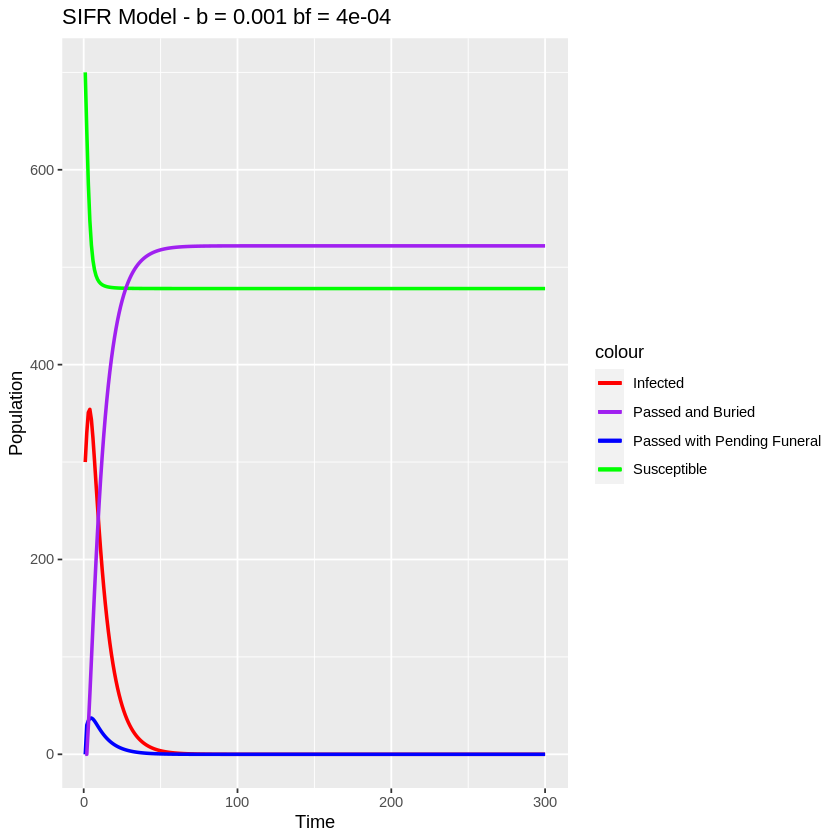

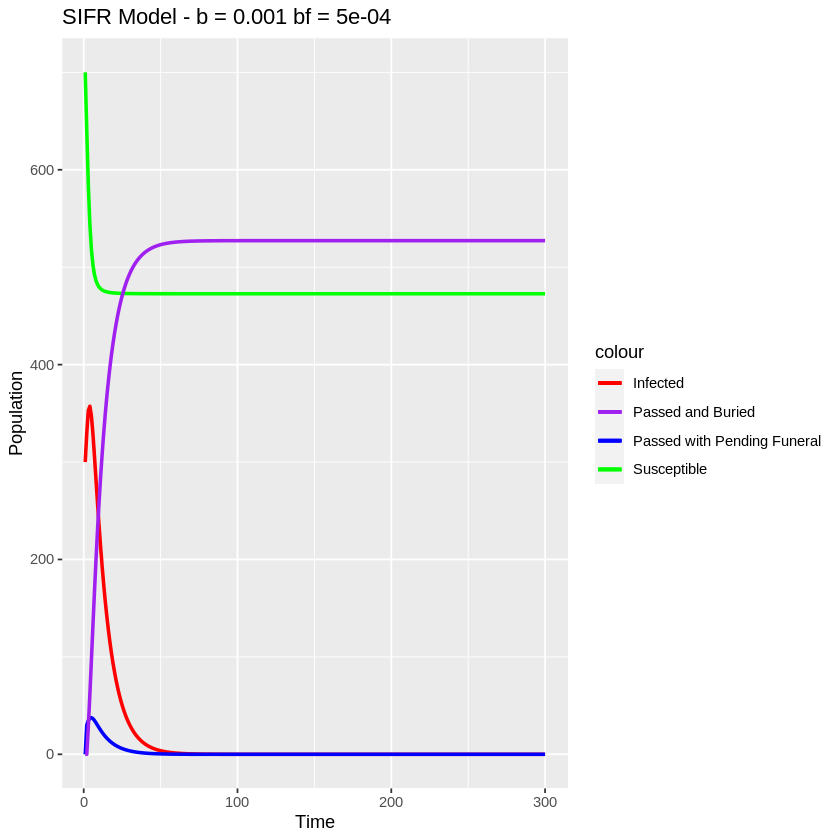

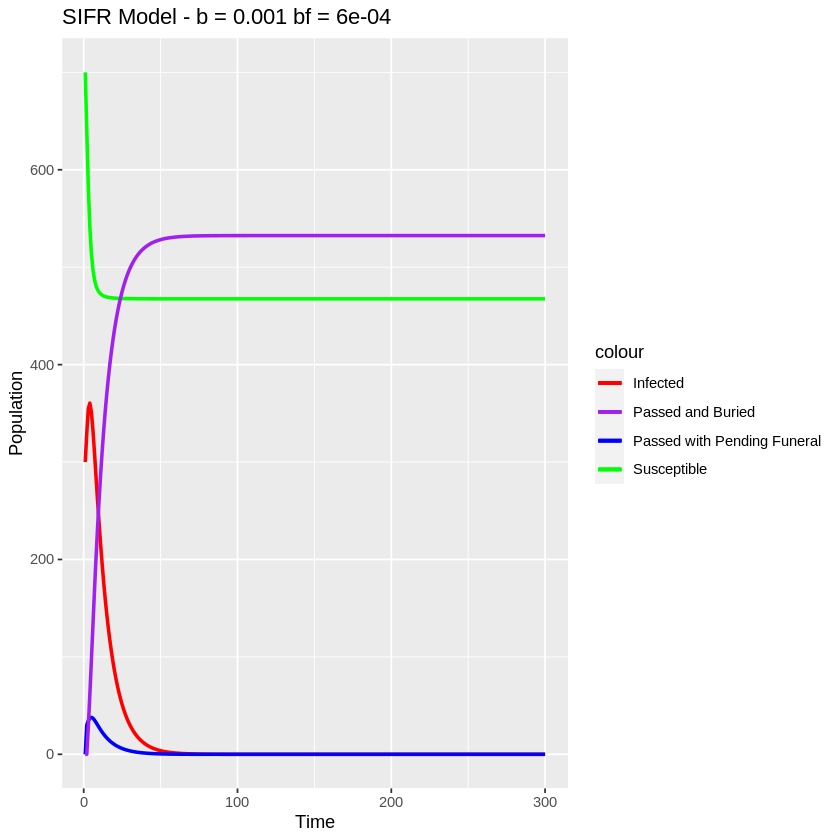

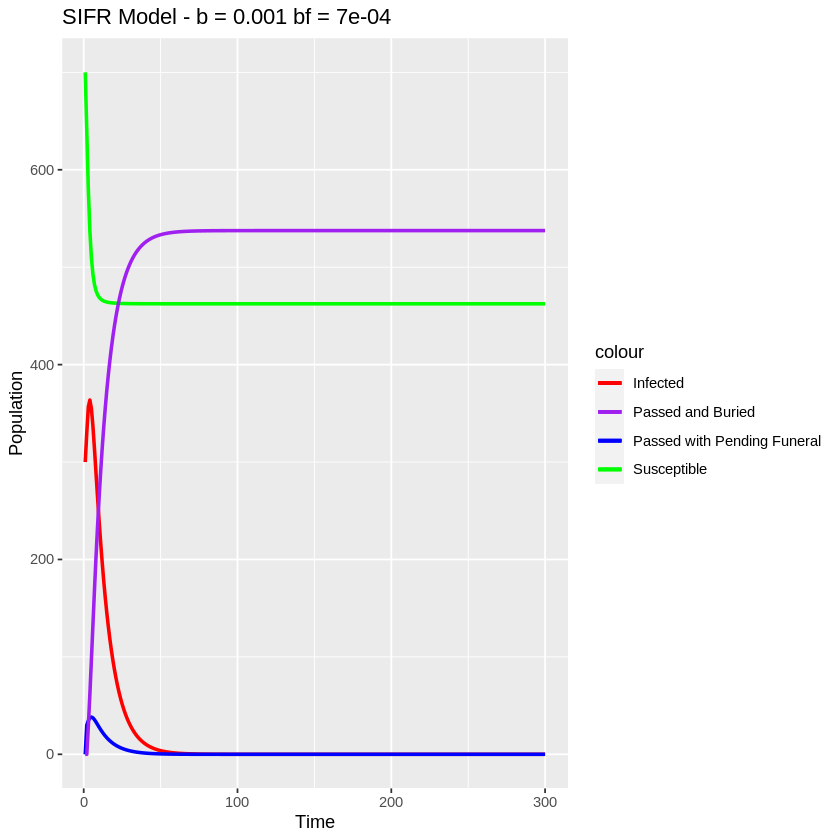

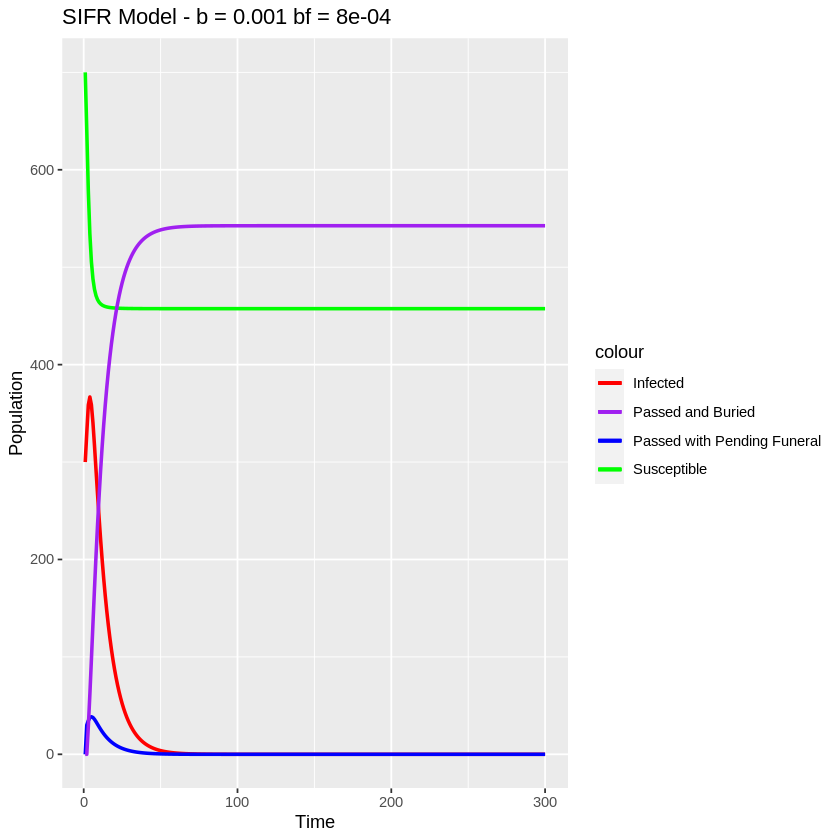

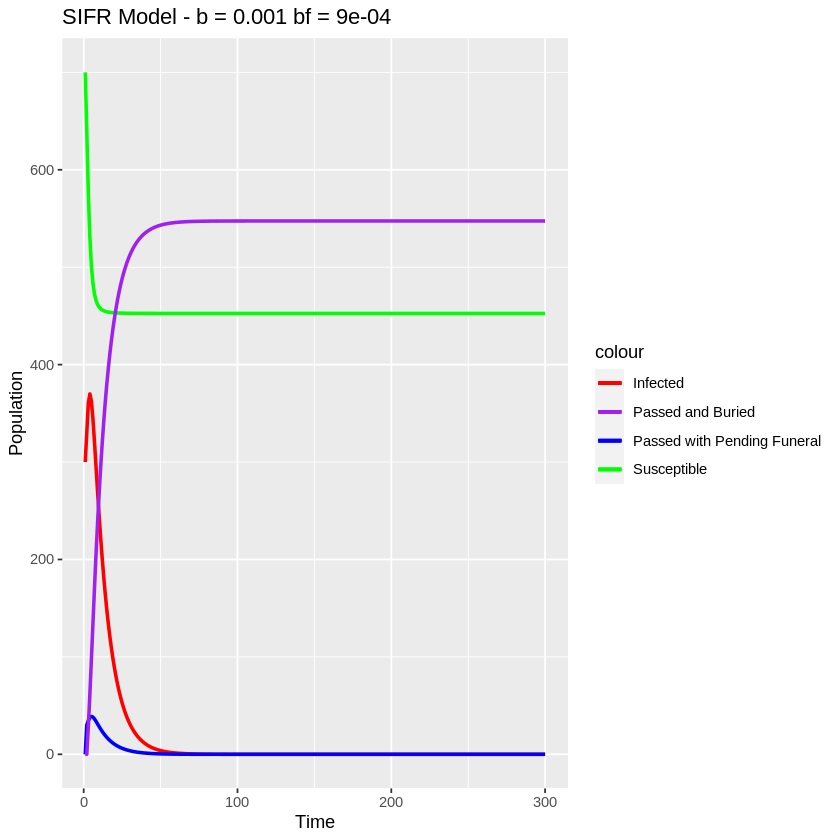

           b    bf      Infected
  [1,] 0e+00 0e+00 3.112137e-117
  [2,] 0e+00 1e-04 2.643829e-109
  [3,] 0e+00 2e-04 1.158563e-102
  [4,] 0e+00 3e-04  6.400274e-97
  [5,] 0e+00 4e-04  7.576419e-92
  [6,] 0e+00 5e-04  2.709547e-87
  [7,] 0e+00 6e-04  3.708403e-83
  [8,] 0e+00 7e-04  2.303152e-79
  [9,] 0e+00 8e-04  7.371072e-76
 [10,] 0e+00 9e-04  1.340344e-72
 [11,] 0e+00 1e-03  1.495202e-69
 [12,] 1e-04 0e+00  8.446048e-90
 [13,] 1e-04 1e-04  1.257489e-84
 [14,] 1e-04 2e-04  4.844995e-80
 [15,] 1e-04 3e-04  6.497233e-76
 [16,] 1e-04 4e-04  3.721700e-72
 [17,] 1e-04 5e-04  1.055881e-68
 [18,] 1e-04 6e-04  1.657547e-65
 [19,] 1e-04 7e-04  1.567933e-62
 [20,] 1e-04 8e-04  9.557789e-60
 [21,] 1e-04 9e-04  3.962305e-57
 [22,] 1e-04 1e-03  1.167254e-54
 [23,] 2e-04 0e+00  1.257026e-67
 [24,] 2e-04 1e-04  4.976529e-64
 [25,] 2e-04 2e-04  9.807104e-61
 [26,] 2e-04 3e-04  1.077608e-57
 [27,] 2e-04 4e-04  7.196796e-55
 [28,] 2e-04 5e-04  3.124333e-52
 [29,] 2e-04 6e-04  9.300730e-50
 [30,] 2e-

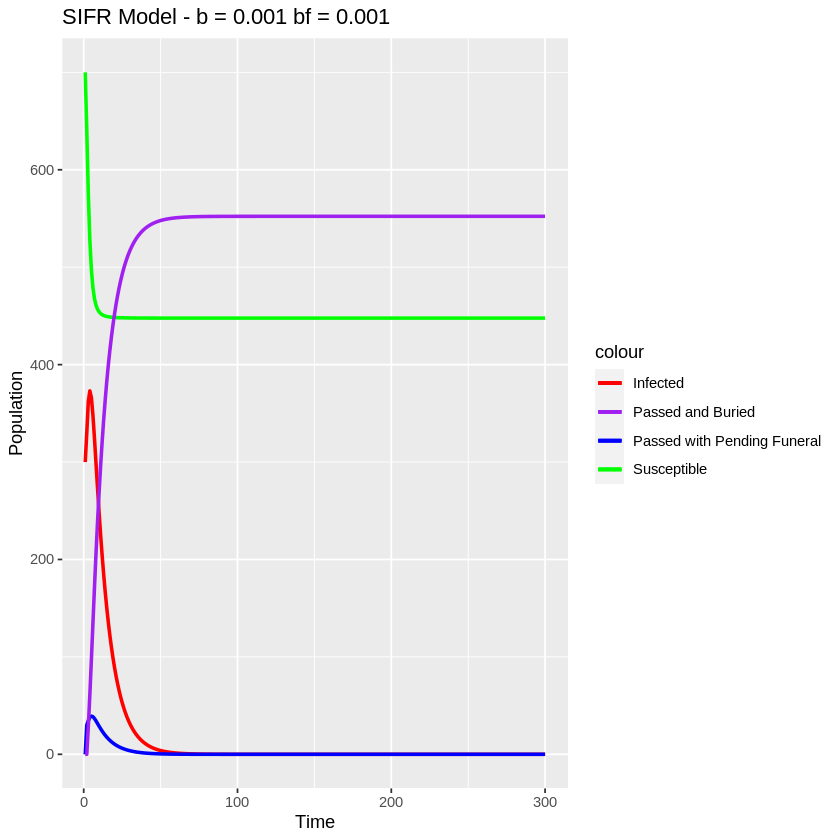

In [ ]:

####FINAL CODE FOR BASE MODEL ANALYSIS######

library(ggplot2)

b_values <- seq(0, 0.001, by = 0.0001)   # range of infection transmission rates
bf_values <- seq(0, 0.001, by = 0.0001)  # range of funeral transmission rates
g <- 0.1
m <- 0.5
si <- 0.95
t_vals <- seq(300)

initial_S <- 700
initial_I <- 300
initial_Fu <- 0
initial_R <- 0

results_matrix <- matrix(NA, nrow = length(b_values) * length(bf_values), ncol = 3)
colnames(results_matrix) <- c("b", "bf", "Infected")

result_index <- 1

for (b in b_values) {
  for (bf in bf_values) {
    S <- rep(NA, length(t_vals))
    I <- rep(NA, length(t_vals))
    Fu <- rep(NA, length(t_vals))
    R <- rep(NA, length(t_vals))

    S[1] <- initial_S
    I[1] <- initial_I
    Fu[1] <- initial_Fu
    R[1] <- initial_R

    for (i in 1:(length(t_vals) - 1)) {
      S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*Fu[i] + m*(S[i] + I[i]) - m*S[i]
      I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*Fu[i] - g*I[i] - m*I[i]
      Fu[i + 1] <- Fu[i] + g*I[i] - si*Fu[i]
      R[i + 1] <- R[i] + si*Fu[i]
    }

    results_matrix[result_index, ] <- c(b, bf, I[length(t_vals)])
    result_index <- result_index + 1

    soln <- data.frame(time = t_vals, Susceptible = S, Infected = I, Funeral = Fu, Recovered = R)

    p <- ggplot(soln, aes(x = time)) +
      geom_line(aes(y = Susceptible, colour = "Susceptible"), lwd = 1) +
      geom_line(aes(y = Infected, colour = "Infected"), lwd = 1) +
      geom_line(aes(y = Funeral, colour = "Passed with Pending Funeral"), lwd = 1) +
      geom_line(aes(y = Recovered, colour = "Passed and Buried"), lwd = 1) +
      labs(x = "Time", y = "Population", title = paste("SIFR Model - b =", b, "bf =", bf)) +
      scale_colour_manual(values = c("Susceptible" = "green", "Infected" = "red",
                                     "Passed with Pending Funeral" = "blue",
                                     "Passed and Buried" = "purple"))

    print(p)
  }
}

print(results_matrix)





In [ ]:
b_values <- seq(0, 0.001, by = 0.0001)   # range of infection transmission rates
bf_values <- seq(0, 0.001, by = 0.0001)  # range of funeral transmission rates
bh_values <- seq(0, 0.0001, by = 0.00001)  # range of hospital transmission rates
g <- 0.1
m <- 0.5
s <- 0.95
d <- 0.7
t <- 0.6
gh <- 0.5
rh <- 0.5

t_vals <- seq(300)

initial_S <- 700
initial_I <- 300
initial_F1 <- 0
initial_R <- 0
initial_E <- 0
initial_H <- 0


results_matrix <- matrix(NA, nrow = length(b_values) * length(bf_values) * length(bh_values), ncol = 4)
colnames(results_matrix) <- c("b", "bf", "bh", "Infected")

result_index <- 1


for (b in b_values) {
  for (bf in bf_values) {
    for (bf in bh_values) {
    S <- rep(NA, length(t_vals))
    I <- rep(NA, length(t_vals))
    F1 <- rep(NA, length(t_vals))
    R <- rep(NA, length(t_vals))
    E <- rep(NA, length(t_vals))
    H <- rep(NA, length(t_vals))
    S[1] <- initial_S
    I[1] <- initial_I
    F1[1] <- initial_F1
    R[1] <- initial_R
    E[1] <- initial_E
    H[1] <- initial_H

      for (i in 1:(length(t_vals) - 1)) {
        S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
        H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
        E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
        R[i + 1] <- R[i] + s*F1[i]
        I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
        F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
      }


      results_matrix[result_index, ] <- c(b, bf, bh, I[length(t_vals)])
      result_index <- result_index + 1

      soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R, hos=H, exp=E)
      colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
                   "Passed and Buried" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")

      p <-   ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
        geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
        geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
        geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
        geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
        geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1)
      labs(x = "Time", y = "Number of People", title = "SIRF Model",
           colour = "Legend") +
        scale_colour_manual(values = colours)

      print(p)
    }
  }
}

In [ ]:
t_vals <- seq(0, 40)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 800 # inital susceptible
I[1] <- 200 # initial infected
F1[1] <- 0
R[1] <- 0
N <- 1000 # population size
b = 0.001
bf = 0.001
for (m in seq(0.05, 0.95, by = 0.05)) {
    for (g in seq(0.05, 0.95, by = 0.05)){
        for (s in seq(0.05, 0.95, by = 0.05)){
          S <- rep(NA, length(t_vals))
          I <- rep(NA, length(t_vals))
          F1 <- rep(NA, length(t_vals))
          R <- rep(NA, length(t_vals))
          S[1] <- 800 # initial susceptible
          I[1] <- 200 # initial infected
          F1[1] <- 0
          R[1] <- 0
          for (i in 1:(length(t_vals) - 1)) {
            S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N - m*S[i]
            I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
            F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
            R[i + 1] <- R[i] + s*F1[i]
          }
        }
      }
  if (is.nan(S[40]) == FALSE) { # if the 20th entry of S in not NaN, print sigma
    print(m)
    print(g)
    print(s)
  }
}

library(ggplot2)

t_vals <- seq(40)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 500 # initial susceptible
I[1] <- 100 # initial infected
F1[1] <- 0
R[1] <- 0
b <- 0.001 # beta
g <- 0.05 #gamma
bf <- 0.001 # beta_f
m <- 0.95 # mu
s <- 0.95 # sigma
N <- 600 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N - m*S[i]
  I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
  R[i + 1] <- R[i] + s*F1[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Passed and Buried" = "purple")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SIRF Model",
       colour = "Legend") +
  scale_colour_manual(values = colours)


t_vals <- seq(1000)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
b <- 0.001 # beta: increasing above 0.001 causes instability
g <- 0.1 #gamma
bf <- 0.00002 # beta_f: increasing above 0.001 causes instability
m <- 0.5 # mu
s <- 0.95 # sigma
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] + m*N(S[i] + I[i]) - m*S[i]
  I[i + 1] <- I[i] + b*S[i]*I[i] + bf*S[i]*F1[i] - g*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] - s*F1[i]
  R[i + 1] <- R[i] + s*F1[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, bur=R)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Passed and Buried" = "purple")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SIRF Model",
       colour = "Legend") +
  scale_colour_manual(values = colours)


In [ ]:
#SHERIF MODEL WITH MATRIX

library(ggplot2)
# Parameter ranges
b_values <- seq(0, 0.001, by = 0.0001)
bf_values <- seq(0, 0.001, by = 0.0001)
bh_values <- seq(0, 0.001, by = 0.0001)

t_vals <- seq(300)

results_matrix <- matrix(NA, nrow = length(b_values) * length(bf_values) * length(bh_values), ncol = 4)
colnames(results_matrix) <- c("b", "bf", "bh", "Infected")

result_index <- 1

for (b in b_values) {
  for (bf in bf_values) {
    for (bh in bh_values) {
      S <- rep(NA, length(t_vals))
      I <- rep(NA, length(t_vals))
      F1 <- rep(NA, length(t_vals))
      R <- rep(NA, length(t_vals))
      E <- rep(NA, length(t_vals))
      H <- rep(NA, length(t_vals))
      S[1] <- 700 # initial susceptible
      I[1] <- 300 # initial infected
      F1[1] <- 0
      R[1] <- 0
      E[1] <- 0
      H[1] <- 0
      beta <- 0.003 # beta
      gamma <- 0.05 # gamma
      beta_f <- 0.0002 # beta_f
      mu <- 0.05 # mu
      sigma <- 0.4 # sigma
      beta_h <- 0.0005 # beta_h
      delta <- 0.4
      gamma_h <- 0.6
      theta <- 0.5
      rho_h <- 0.3
      N <- 1000 # population size

      for (i in 1:(length(t_vals) - 1)) {
        S[i + 1] <- S[i] - beta*S[i]*I[i] - bf*S[i]*F1[i] + bh*S[i]*H[i] + mu*(S[i] + I[i]) - mu*S[i]
        H[i + 1] <- H[i] + theta*I[i] - gamma_h*H[i] - rho_h*H[i] - mu*H[i]
        E[i + 1] <- E[i] + beta*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - delta*E[i] - mu*E[i]
        R[i + 1] <- R[i] + sigma*F1[i]
        I[i + 1] <- I[i] + beta*S[i]*I[i] + bf*S[i]*F1[i] - gamma*I[i] - mu*I[i]
        F1[i + 1] <- F1[i] + gamma*I[i] - sigma*F1[i]
      }

      results_matrix[result_index, ] <- c(b, bf, bh, I[length(t_vals)])
      result_index <- result_index + 1

      soln <- data.frame(time = t_vals, sus = S, inf = I, fun = F1, bur = R, hos = H, exp = E)

      p = ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = bur, colour = "Passed and Buried"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model", colour = "Legend") +
  scale_colour_manual(values = colours)

  print(p)

    }
  }
}

#print(results_matrix)





ERROR: [1m[33mError[39m in `palette()`:[22m
[1m[22m[33m![39m Insufficient values in manual scale. 6 needed but only 1 provided.


            b    bf    bh      Infected
   [1,] 0.001 0.001 0.001  1.231546e-08
   [2,] 0.001 0.001 0.002  8.635029e-09
   [3,] 0.001 0.001 0.003  6.181861e-09
   [4,] 0.001 0.001 0.004  4.502808e-09
   [5,] 0.001 0.001 0.005  3.318083e-09
   [6,] 0.001 0.001 0.006  2.448269e-09
   [7,] 0.001 0.001 0.007  1.770195e-09
   [8,] 0.001 0.001 0.008  1.189181e-09
   [9,] 0.001 0.001 0.009  6.205189e-10
  [10,] 0.001 0.001 0.010 -2.087502e-11
  [11,] 0.001 0.002 0.001  6.725617e-17
  [12,] 0.001 0.002 0.002  4.848166e-17
  [13,] 0.001 0.002 0.003  3.558599e-17
  [14,] 0.001 0.002 0.004  2.652081e-17
  [15,] 0.001 0.002 0.005  1.994863e-17
  [16,] 0.001 0.002 0.006  1.496243e-17
  [17,] 0.001 0.002 0.007  1.089954e-17
  [18,] 0.001 0.002 0.008  7.211917e-18
  [19,] 0.001 0.002 0.009  3.374776e-18
  [20,] 0.001 0.002 0.010 -1.148272e-18
  [21,] 0.001 0.003 0.001  6.889832e-24
  [22,] 0.001 0.003 0.002  5.140369e-24
  [23,] 0.001 0.003 0.003  3.893905e-24
  [24,] 0.001 0.003 0.004  2.985340e-24


Warning message:
“Removed 179 row(s) containing missing values (geom_path).”
Warning message:
“Removed 178 row(s) containing missing values (geom_path).”
Warning message:
“Removed 177 row(s) containing missing values (geom_path).”
Warning message:
“Removed 176 row(s) containing missing values (geom_path).”
Warning message:
“Removed 177 row(s) containing missing values (geom_path).”
Warning message:
“Removed 179 row(s) containing missing values (geom_path).”


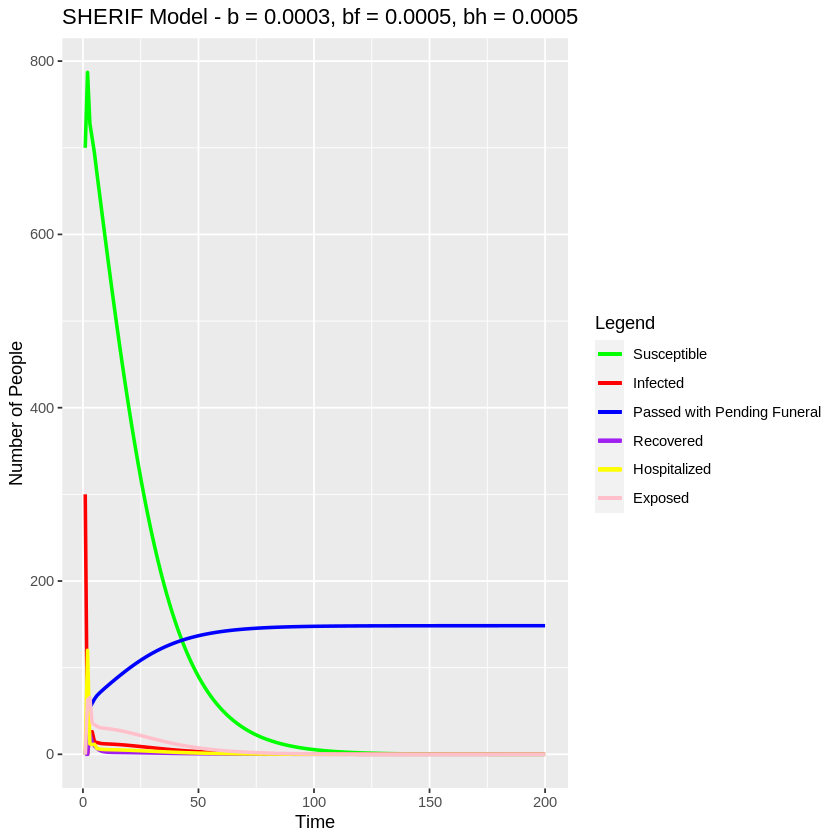

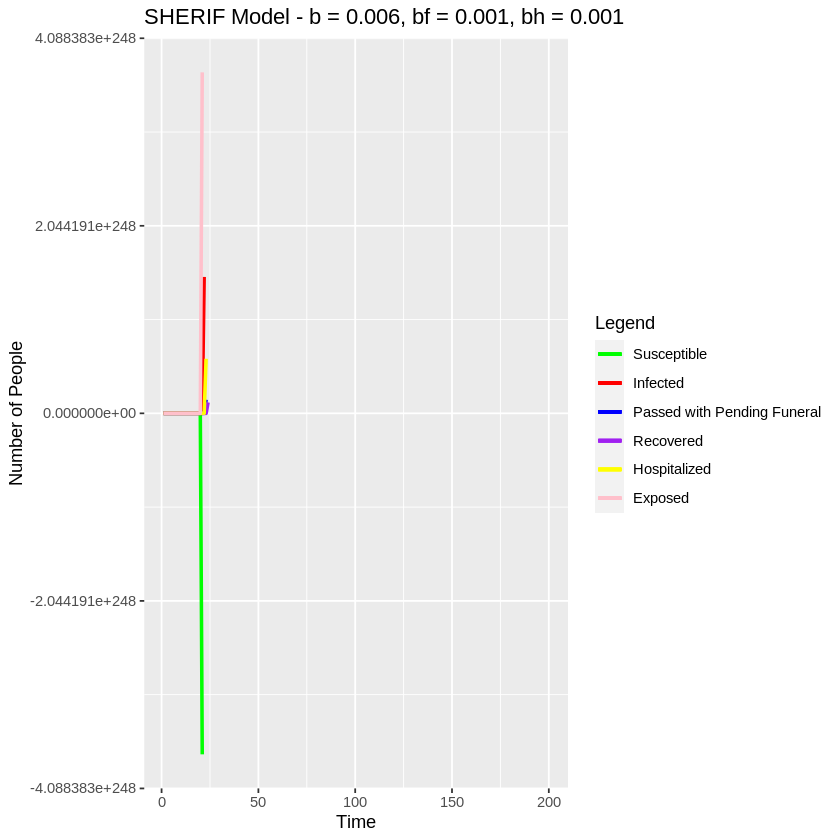

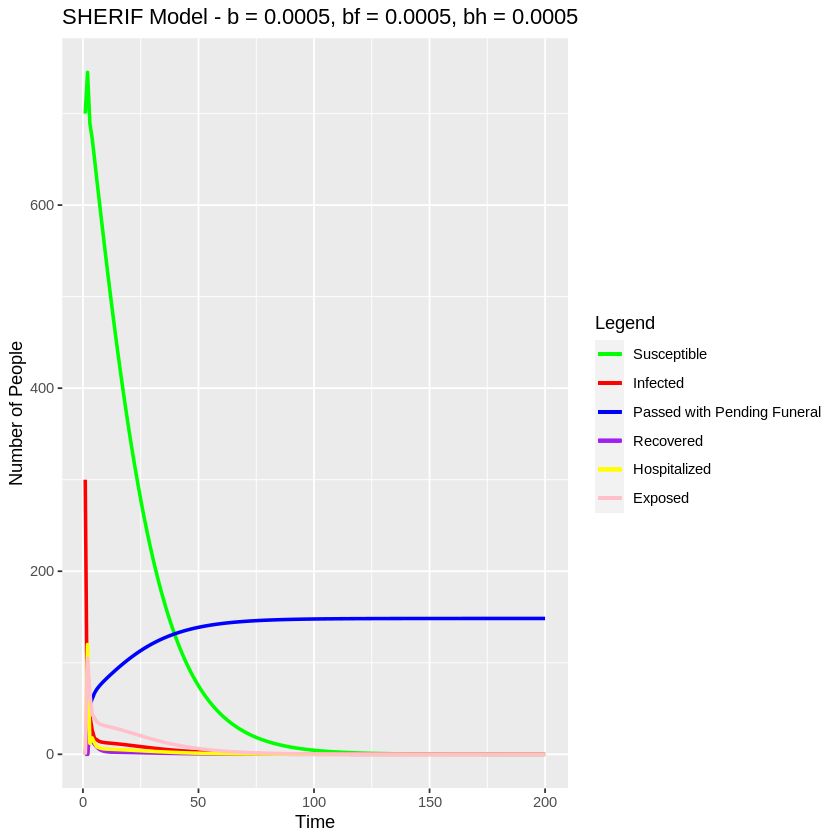

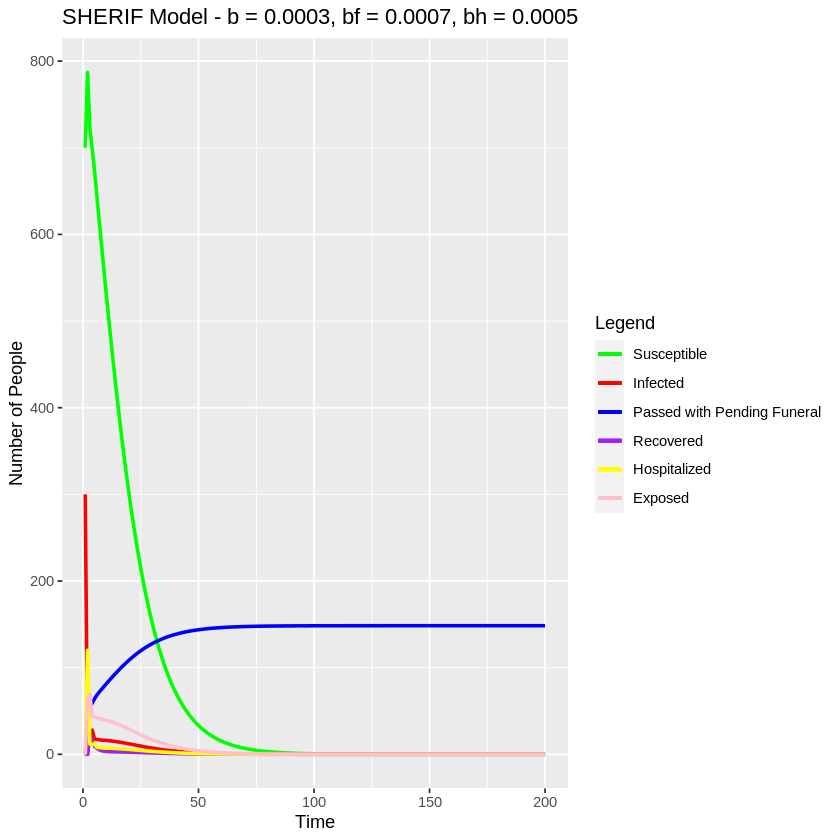

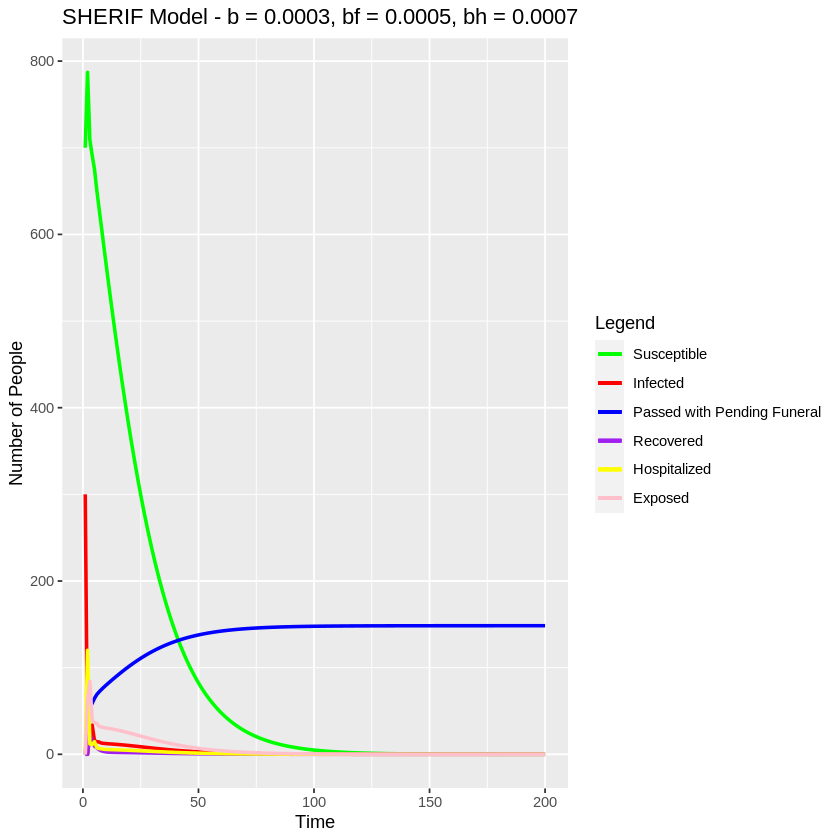

In [ ]:

## WORKING SHERIF
# testing different values of betas
b_values <- seq(0.001, 0.01, by = 0.001)   # range of infection transmission rates
bf_values <- seq(0.001, 0.01, by = 0.001)  # range of funeral transmission rates
bh_values <- seq(0.001, 0.01, by = 0.001)  # range of hospital transmission rates
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2

t_vals <- seq(200)

initial_S <- 700
initial_I <- 300
initial_F1 <- 0
initial_R <- 0
initial_E <- 0
initial_H <- 0


results_matrix <- matrix(NA, nrow = length(b_values) * length(bf_values) * length(bh_values), ncol = 4)
colnames(results_matrix) <- c("b", "bf", "bh", "Infected")

result_index <- 1


for (b in b_values) {
  for (bf in bf_values) {
    for (bh in bh_values) {
      S <- rep(NA, length(t_vals))
      I <- rep(NA, length(t_vals))
      F1 <- rep(NA, length(t_vals))
      R <- rep(NA, length(t_vals))
      E <- rep(NA, length(t_vals))
      H <- rep(NA, length(t_vals))
      S[1] <- initial_S
      I[1] <- initial_I
      F1[1] <- initial_F1
      R[1] <- initial_R
      E[1] <- initial_E
      H[1] <- initial_H

      for (i in 1:(length(t_vals) - 1)) {
        S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
        H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
        E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
        R[i + 1] <- R[i] + rh*H[i] - m*R[i]
        I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
        F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
      }


      results_matrix[result_index, ] <- c(b, bf, bh, I[length(t_vals)])
      result_index <- result_index + 1
    }
  }
}

print(results_matrix)

library(ggplot2)

# to demonstrate b<0.0006, bf<0.001, bh < 0.001
# First figure in results
# Reference figure
t_vals <- seq(200)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.0003 # beta (if bh = 0.0005, bf = 0.001, b stable when <0.0036)
bf <- 0.0005 # beta_f (if bh = 0.0005, b = 0.001, bf will go negative if >0.0166)
bh <- 0.0005 #beta_h (if b = 0.001, and bf = 0.001, bh is stable less than 0.00056)
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
  H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
  E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
  R[i + 1] <- R[i] + rh*H[i] - m*R[i]
  I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, rec=R, hos=H, exp=E)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Recovered" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = rec, colour = "Recovered"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model - b = 0.0003, bf = 0.0005, bh = 0.0005",
     colour = "Legend") +
  scale_colour_manual(values = colours)


# to demonstrate instability
# Second figure in results
t_vals <- seq(200)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.006 # beta (if bh = 0.0005, bf = 0.001, b stable when <0.0036)
bf <- 0.001 # beta_f (if bh = 0.0005, b = 0.001, bf will go negative if >0.0166)
bh <- 0.001 #beta_h (if b = 0.001, and bf = 0.001, bh is stable less than 0.00056)
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
  H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
  E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
  R[i + 1] <- R[i] + rh*H[i] - m*R[i]
  I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, rec=R, hos=H, exp=E)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Recovered" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = rec, colour = "Recovered"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model - b = 0.006, bf = 0.001, bh = 0.001",
       colour = "Legend") +
  scale_colour_manual(values = colours)

# Third figure in results
# if b is larger, eqm takes longer to reach
# sus eqm decrease, r eqm increases
t_vals <- seq(200)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.0005 # beta (if bh = 0.0005, bf = 0.001, b stable when <0.0036)
bf <- 0.0005 # beta_f (if bh = 0.0005, b = 0.001, bf will go negative if >0.0166)
bh <- 0.0005 #beta_h (if b = 0.001, and bf = 0.001, bh is stable less than 0.00056)
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
  H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
  E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
  R[i + 1] <- R[i] + rh*H[i] - m*R[i]
  I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, rec=R, hos=H, exp=E)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Recovered" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = rec, colour = "Recovered"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model - b = 0.0005, bf = 0.0005, bh = 0.0005",
       colour = "Legend") +
  scale_colour_manual(values = colours)


# Fourth figure in results
# if bf is larger, eqm takes same amount of time to reach
# sus eqm decrease, r eqm increase slightly
t_vals <- seq(200)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.0003 # beta (if bh = 0.0005, bf = 0.001, b stable when <0.0036)
bf <- 0.0007 # beta_f (if bh = 0.0005, b = 0.001, bf will go negative if >0.0166)
bh <- 0.0005 #beta_h (if b = 0.001, and bf = 0.001, bh is stable less than 0.00056)
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
  H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
  E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
  R[i + 1] <- R[i] + rh*H[i] - m*R[i]
  I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, rec=R, hos=H, exp=E)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Recovered" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = rec, colour = "Recovered"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model - b = 0.0003, bf = 0.0007, bh = 0.0005",
       colour = "Legend") +
  scale_colour_manual(values = colours)



# Fifth figure in results
# if bh is larger, eqm takes same amount of time to reach
# sus eqm increase, r eqm increases slightly
t_vals <- seq(200)
S <- rep(NA, length(t_vals))
I <- rep(NA, length(t_vals))
F1 <- rep(NA, length(t_vals))
R <- rep(NA, length(t_vals))
E <- rep(NA, length(t_vals))
H <- rep(NA, length(t_vals))
S[1] <- 700 # initial susceptible
I[1] <- 300 # initial infected
F1[1] <- 0
R[1] <- 0
E[1] <- 0
H[1] <- 0
b <- 0.0003 # beta (if bh = 0.0005, bf = 0.001, b stable when <0.0036)
bf <- 0.0005 # beta_f (if bh = 0.0005, b = 0.001, bf will go negative if >0.0166)
bh <- 0.0007 #beta_h (if b = 0.001, and bf = 0.001, bh is stable less than 0.00056)
g <- 0.1
m <- 0.5
d <- 0.4
t <- 0.4
gh <- 0.2
rh <- 0.2
N <- 1000 # population size

for (i in 1:(length(t_vals) - 1)) {
  S[i + 1] <- S[i] - b*S[i]*I[i] - bf*S[i]*F1[i] - bh*S[i]*H[i] + m*(S[i] + I[i]) - m*S[i]
  H[i + 1] <- H[i] + t*I[i] -gh*H[i] - rh*H[i] - m*H[i]
  E[i + 1] <- E[i] + b*S[i]*I[i] + bf*S[i]*F1[i] + bh*S[i]*H[i] - d*E[i] - m*E[i]
  R[i + 1] <- R[i] + rh*H[i] - m*R[i]
  I[i + 1] <- I[i] + d*E[i] - g*I[i] - t*I[i] - m*I[i]
  F1[i + 1] <- F1[i] + g*I[i] + gh*H[i]
}

soln <- data.frame(time = t_vals, sus = S, inf = I, fun=F1, rec=R, hos=H, exp=E)
colours <- c("Susceptible" = "green", "Infected" = "red", "Passed with Pending Funeral" = "blue",
             "Recovered" = "purple", "Hospitalized" = "yellow", "Exposed" = "pink")
ggplot(soln) + geom_line(mapping = aes(x = time, y = sus, colour = "Susceptible"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = inf, colour = "Infected"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = fun, colour = "Passed with Pending Funeral"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = rec, colour = "Recovered"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = hos, colour = "Hospitalized"), lwd = 1) +
  geom_line(mapping = aes(x = time, y = exp, colour = "Exposed"), lwd = 1) +
  labs(x = "Time", y = "Number of People", title = "SHERIF Model - b = 0.0003, bf = 0.0005, bh = 0.0007",
       colour = "Legend") +
  scale_colour_manual(values = colours)

